In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!rm ~/.cache/matplotlib -rf

Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 한글폰트 설정
mpl.rc("font",family = "NanumGothic")
mpl.rc("axes", unicode_minus = False)

# DATA LOAD

In [ ]:
import os
os.chdir("/content/drive/MyDrive/BigData/early_project")

In [ ]:
df = pd.read_csv("kurly.csv")

# EDA1

In [ ]:
# 팔레트 설정

import matplotlib.colors as mcolors
# 시작 색상
start_color = mcolors.hex2color("#6A0096")  # RGB 형태로 변환

# 팔레트 생성을 위한 함수
def create_gradient(start_color, n=7):
    palette = [start_color]
    for i in range(1, n):
        new_color = (
            start_color[0] + (1 - start_color[0]) / n * i,
            start_color[1] + (1 - start_color[1]) / n * i,
            start_color[2] + (1 - start_color[2]) / n * i,
        )
        palette.append(new_color)
    return palette

# 7개의 보라색 팔레트 생성
purple_palette = create_gradient(start_color, n=7)

## 성별 비율

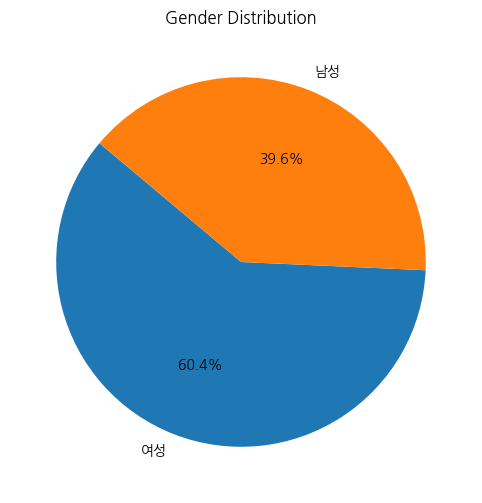

In [ ]:
gender_counts = df['Gender'].value_counts(normalize=True)

# 파이 차트로 성별 비율 그리기
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')  # 그래프 제목 설정
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['DeliveryDT'] = pd.to_datetime(df['DeliveryDT'])
df['OrderDT'] = pd.to_datetime(df['OrderDT'])

df['Date_Delivery'] = pd.to_datetime(df['DeliveryDT'].dt.strftime('%Y-%m-%d')) # 도착날짜 연-월-일 형식으로 추가
df['Delivery_diff_Order'] = df['Date_Delivery'] - df['Date'] # 도착날짜 - 주문날짜(days)
df[['OrderDT', 'DeliveryDT', 'Delivery_diff_Order']].head()

,OrderDT,DeliveryDT,Delivery_diff_Order
0,2021-12-03 20:59:27,2021-12-04 03:26:00,1 days
1,2021-12-03 20:59:27,2021-12-04 03:26:00,1 days
2,2021-12-03 20:59:27,2021-12-04 03:26:00,1 days
3,2021-12-03 20:59:27,2021-12-04 03:26:00,1 days
4,2021-12-03 20:59:27,2021-12-04 03:26:00,1 days


In [ ]:
grouped_data = df.groupby('WeekdayName')['Delay_YN'].value_counts(normalize=True).rename("percentage").reset_index()
grouped_data.sort_values(by=['percentage'])

,WeekdayName,Delay_YN,percentage
1,Friday,1,0.032652
5,Saturday,1,0.036901
11,Tuesday,1,0.040210
9,Thursday,1,0.041846
7,Sunday,1,0.042190
3,Monday,1,0.043234
13,Wednesday,1,0.043486
12,Wednesday,0,0.956514
2,Monday,0,0.956766
6,Sunday,0,0.957810


|   |월|화|수|목|금|토|
|---|---|---|---|---|---|---|
|배송지연율(%)|4.32|4.02|4.34|4.18|3.26|3.69|

- 금요일의 배송지연율이 낮다(약 3.26%)
- 평균(4.1%) 대비 79% 수준
- 수요일(4.34%) 대비 75% 수준
- 원인??


In [ ]:
# 요일별 매출
weekday_q = df.groupby('WeekdayName')['idOrder'].count().reset_index()
weekday_q

,WeekdayName,idOrder
0,Friday,126732
1,Monday,143335
2,Saturday,9539
3,Sunday,219884
4,Thursday,177005
5,Tuesday,158020
6,Wednesday,184196


<ipython-input-35-81c52bf7f857>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_q, x='WeekdayName', y='idOrder',


<Axes: xlabel='WeekdayName', ylabel='idOrder'>

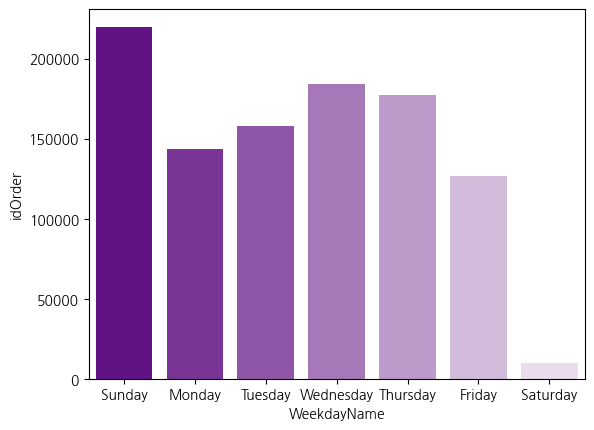

In [ ]:
sns.barplot(data=weekday_q, x='WeekdayName', y='idOrder',
             order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], palette=purple_palette)

-  도착 전 날 매출과는 크게 관련 없음을 확인

<ipython-input-36-370459131185>:3: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.barplot(x="WeekdayName", y="percentage", hue="Delay_YN", data=grouped_data, palette=purple_palette)


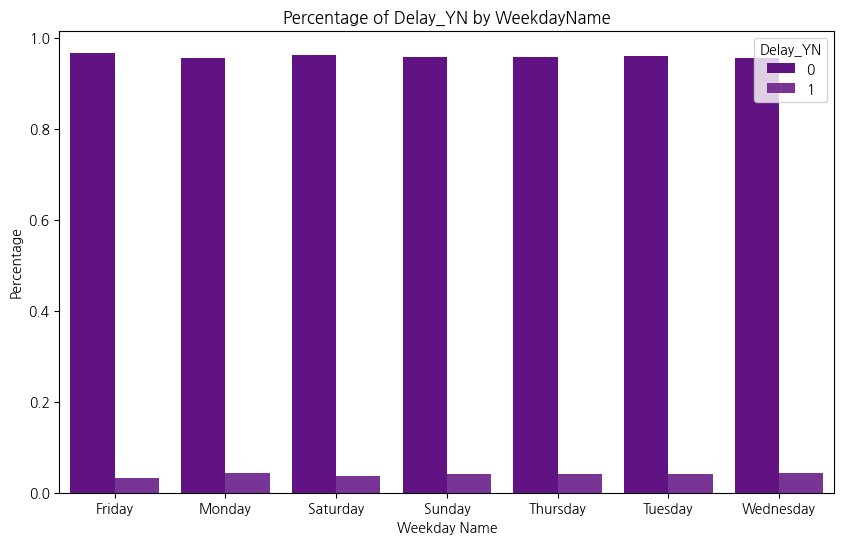

In [ ]:
# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x="WeekdayName", y="percentage", hue="Delay_YN", data=grouped_data, palette=purple_palette)
plt.title("Percentage of Delay_YN by WeekdayName")
plt.ylabel("Percentage")
plt.xlabel("Weekday Name")

plt.show()

## 주문시간별 배송지연율

In [ ]:
Hour_delay = df.groupby('Hour')['Delay_YN'].mean().reset_index()
Hour_delay.head()

,Hour,Delay_YN
0,0,0.036010
1,1,0.033152
2,2,0.024434
3,3,0.048292
4,4,0.034146


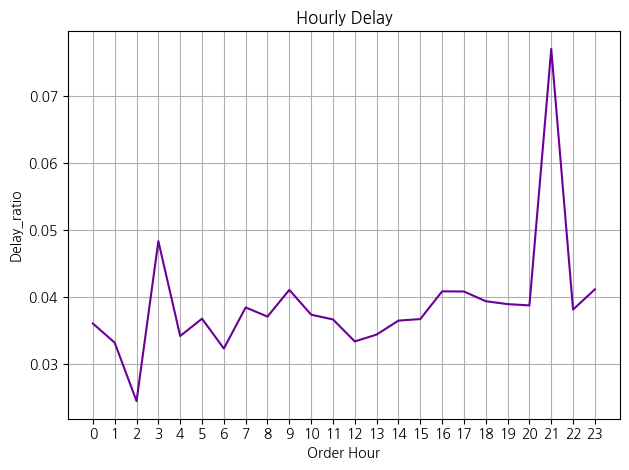

In [ ]:
# 그래프 그리기
plt.plot(Hour_delay['Hour'], Hour_delay['Delay_YN'], color='#6A0096', linestyle='-')
# 그래프 제목과 축 레이블
plt.title('Hourly Delay')
plt.xlabel('Order Hour')
plt.ylabel('Delay_ratio')
# 그래프 보여주기
plt.grid(True)
plt.xticks(range(24))  # x축 눈금을 시간대로 설정
plt.tight_layout()
plt.show()

- 21~22시 주문할 경우 배송지연율이 약 7.7 %로 타 시간대보다 매우 높음
- 원인 파악 필요

<ipython-input-39-593d3dad1519>:5: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.countplot(data = kurly_order_21, x = 'Delivery_Hour', hue = 'Delivery_Hour', palette=purple_palette)


Text(0.5, 1.0, '21~22시 주문시 도착시간')

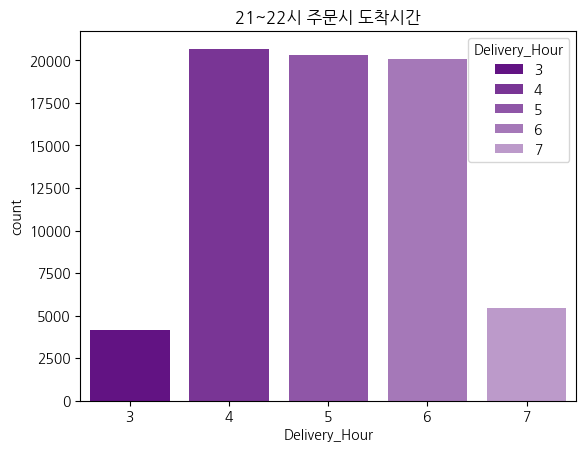

In [ ]:
# Delivery_hour 추가
df['Delivery_Hour'] = df['DeliveryDT'].dt.hour

kurly_order_21 = df[df['Hour']==21]
sns.countplot(data = kurly_order_21, x = 'Delivery_Hour', hue = 'Delivery_Hour', palette=purple_palette)
plt.title("21~22시 주문시 도착시간")

<ipython-input-40-40c37459bb91>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = kurly_order_21, x = 'Delivery_diff_Order', palette=purple_palette)
<ipython-input-40-40c37459bb91>:2: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.countplot(data = kurly_order_21, x = 'Delivery_diff_Order', palette=purple_palette)


Text(0.5, 1.0, '21~22시 주문시 도착까지 걸리는 일 수')

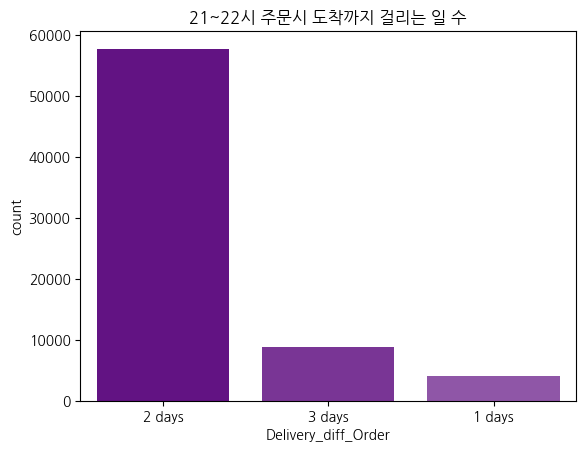

In [ ]:
kurly_order_21 = df[df['Hour']==21]
sns.countplot(data = kurly_order_21, x = 'Delivery_diff_Order', palette=purple_palette)
plt.title("21~22시 주문시 도착까지 걸리는 일 수")

In [ ]:
# 21시 ~ 22시 주문시 도착까지 걸리는 일 수 비율
kurly_order_21['Delivery_diff_Order'].value_counts(normalize = True)

2 days    0.817115
3 days    0.125233
1 days    0.057652
Name: Delivery_diff_Order, dtype: float64

<ipython-input-42-7a856102bd43>:2: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.countplot(data = kurly_order_21[kurly_order_21['Delivery_diff_Order']=='2 days'], x = 'Delivery_Hour', hue='Delivery_Hour', palette=purple_palette)


Text(0.5, 1.0, '21~22시 주문하여 배송에 2일 걸린 경우의 배송 수')

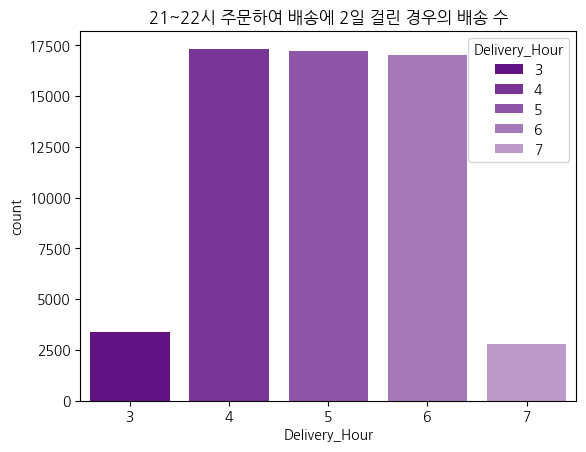

In [ ]:
# 21~22시 주문하여 배송에 2일 걸린 경우의 배송지연율 plot
sns.countplot(data = kurly_order_21[kurly_order_21['Delivery_diff_Order']=='2 days'], x = 'Delivery_Hour', hue='Delivery_Hour', palette=purple_palette)
plt.title("21~22시 주문하여 배송에 2일 걸린 경우의 배송 수")

In [ ]:
# 21~22시 주문하여 배송에 2일 걸린 경우의 배송지연율
kurly_order_21[kurly_order_21['Delivery_diff_Order']=='2 days']['Delivery_Hour'].value_counts(normalize=True)

4    0.300087
5    0.298494
6    0.294842
3    0.058421
7    0.048156
Name: Delivery_Hour, dtype: float64

<ipython-input-44-57822132880f>:2: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.countplot(data = kurly_order_21[kurly_order_21['Delivery_diff_Order']=='1 days'], x = 'Delivery_Hour', hue='Delivery_Hour', palette=purple_palette)


Text(0.5, 1.0, '21~22시 주문하여 배송에 1일 걸린 경우의 배송 수')

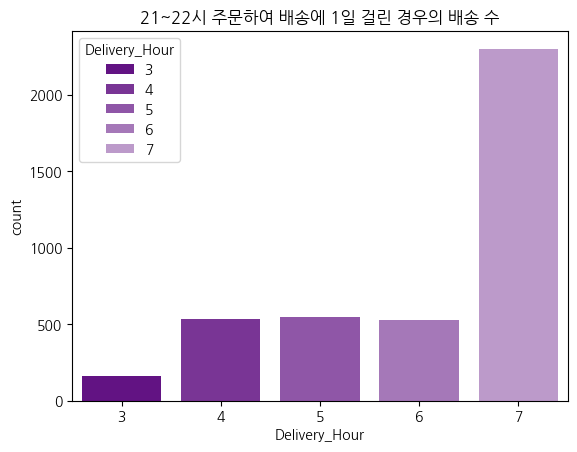

In [ ]:
# 21~22시 주문하여 배송에 1일 걸린 경우의 배송지연율(약 4000개 데이터) plot
sns.countplot(data = kurly_order_21[kurly_order_21['Delivery_diff_Order']=='1 days'], x = 'Delivery_Hour', hue='Delivery_Hour', palette=purple_palette)
plt.title("21~22시 주문하여 배송에 1일 걸린 경우의 배송 수")

In [ ]:
# 21~22시 주문하여 배송에 1일 걸린 경우의 배송지연율(약 4000개 데이터)
kurly_order_21[kurly_order_21['Delivery_diff_Order']=='1 days']['Delivery_Hour'].value_counts(normalize=True)

7    0.565015
5    0.133955
4    0.131011
6    0.129784
3    0.040236
Name: Delivery_Hour, dtype: float64

 - 21시~22시에 주문한 경우
     - 배송에 2일이 걸릴 때 배송지연율은 약 4.8%
     - 배송에 1일이 걸릴 때 배송지연율은 약 57%
 - 21시~22시에 주문하여 바로 다음 날 배송을 하려할 때 배송 지연이 굉장히 많다.

<ipython-input-46-851bcb9eea0f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = kurly_order_after22, x = 'Delivery_diff_Order', palette=purple_palette)
<ipython-input-46-851bcb9eea0f>:3: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(data = kurly_order_after22, x = 'Delivery_diff_Order', palette=purple_palette)


Text(0.5, 1.0, '22시 이후 주문시 도착까지 걸리는 일 수')

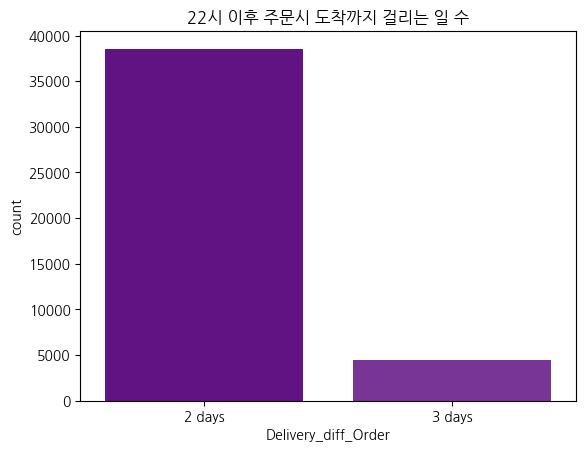

In [ ]:
# 22시 이후 주문 중 바로 다음날 배송해준 건수
kurly_order_after22 = df[df['Hour']==22 | 23]
sns.countplot(data = kurly_order_after22, x = 'Delivery_diff_Order', palette=purple_palette)
plt.title("22시 이후 주문시 도착까지 걸리는 일 수")

- 22시 이후 주문한 경우 모두 배송 시간 2일 이상

- 정리
    1. 21시 ~ 22시에 주문한 경우 배송지연율 높음(약 7.7%)
    2. 포컬리는 21시 전 주문 건만 익일새벽배송이 원칙
    3. 21시 ~ 22시에 주문한 것 중 익일새벽배송이 존재(약 5.8%)
    4. 21시 ~ 22시에 주문한 것이 익일새벽배송일 때 배송지연율이 높음(약 57%)
    5. 21시 이후 주문에 대하여 익일새벽배송을 하려고 할 때의 프로세스 개선 필요

In [ ]:
df['DeliveryHM'] = df['DeliveryDT'].apply(lambda x: x.strftime('%H:%M'))

In [ ]:
delivery_time = df.groupby('DeliveryHM')['idOrder'].count().reset_index()

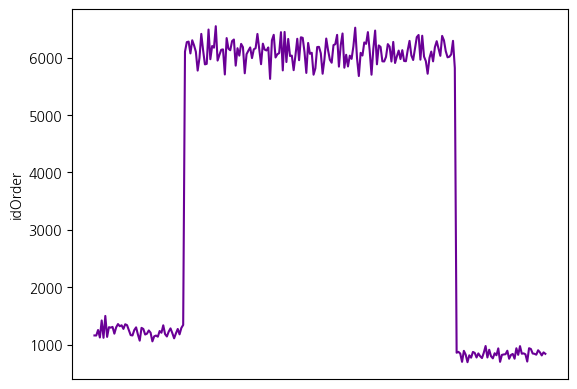

In [ ]:
sns.lineplot(data = delivery_time, x = 'DeliveryHM', y='idOrder', color='#6A0096')
plt.gca().axes.xaxis.set_visible(False)

## 연도별 신규고객

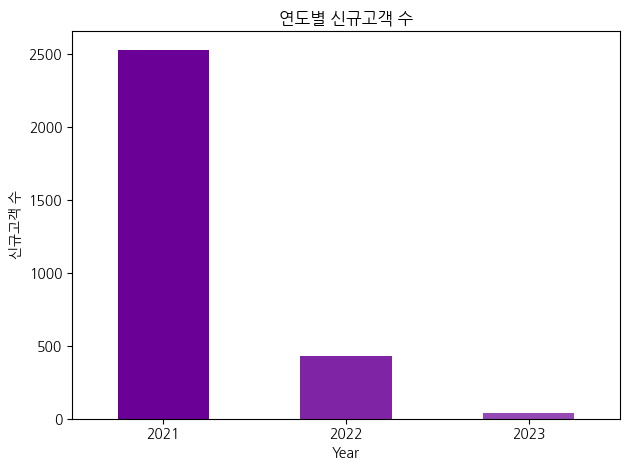

In [ ]:
first_order = df[['idUser','OrderDT','Year']].sort_values(['idUser','OrderDT'])
first_order.drop_duplicates('idUser', inplace = True)
# Year 별로 idUser의 수를 계산
user_count_by_year = first_order.groupby('Year')['idUser'].count()
# 그래프 그리기
user_count_by_year.plot(kind='bar', color=purple_palette)
plt.title('연도별 신규고객 수')
plt.xlabel('Year')
plt.ylabel('신규고객 수')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
user_count_by_year

Year
2021    2532
2022     431
2023      37
Name: idUser, dtype: int64

In [ ]:
###신규고객 감소율
user_count_by_year = pd.DataFrame(user_count_by_year)
user_count_by_year.rename(columns={'idUser': 'Value'}, inplace=True)
# 이전 연도 값
previous_year_value = user_count_by_year['Value'].shift(1)
# 감소율 계산
decrease_rate = ((previous_year_value - user_count_by_year['Value']) / previous_year_value) * 100
# 결과 출력
decrease_rate.dropna(inplace=True)  # 첫 번째 행은 비교할 이전 연도 값이 없으므로 삭제
print(decrease_rate)

Year
2022    82.977883
2023    91.415313
Name: Value, dtype: float64


In [ ]:
# 마지막 주문 시간 확인

LastOrder = df.groupby("idUser")['OrderDT'].max().reset_index()
LastOrder

,idUser,OrderDT
0,U10001,2023-12-27 08:25:54
1,U10002,2023-12-06 10:16:48
2,U10003,2023-12-23 21:09:58
3,U10004,2023-12-05 20:24:04
4,U10005,2023-11-20 12:40:36
...,...,...
2995,U12996,2023-12-29 18:56:12
2996,U12997,2023-12-26 20:27:53
2997,U12998,2023-11-27 19:51:55
2998,U12999,2023-12-27 10:22:26


## 이탈고객 수

In [ ]:
## 이탈고객수 (최근 100일간 주문을 하지 않은 고객)
last_order = df[['idUser','OrderDT','Year','Month','Day']].sort_values(['idUser','OrderDT'])
last_order.drop_duplicates('idUser', inplace = True, keep = 'last')
# 100일전 2023년 9월 22일 기준
last_order[last_order['OrderDT'] < '2023-09-22']

,idUser,OrderDT,Year,Month,Day
52768,U10157,2023-08-23 09:02:16,2023,8,23
102567,U10301,2023-09-19 20:23:01,2023,9,19
171339,U10508,2023-09-20 11:24:49,2023,9,20
176393,U10525,2023-09-18 16:35:40,2023,9,18
289902,U10860,2023-06-21 21:46:29,2023,6,21
477577,U11411,2023-08-23 09:54:47,2023,8,23
547426,U11614,2023-08-24 20:54:41,2023,8,24
578575,U11703,2023-09-18 22:31:00,2023,9,18
825667,U12432,2023-09-06 06:27:14,2023,9,6
855709,U12524,2023-09-04 20:05:16,2023,9,4


- 최근 100일간 주문하지 않은 고객 (이탈고객): 12명

In [ ]:
# 대분류별 매출
df.groupby("ItemLargeName")['Price'].sum()

ItemLargeName
가공식품    6659692330
생수        58514340
신선식품    8657357160
음료       284289100
Name: Price, dtype: int64

In [ ]:
#  한 주문에 두 개 이상의 종류를 산 주문만
df.groupby('idOrder').filter(lambda x: x['ItemCode'].nunique() > 1)

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Delay_YN,ItemLargeCode,ItemLargeName,ItemMiddleCode,...,Hour,CleanedItemName,TimeBetweenOrders,Combined,Weekday,WeekdayName,Date_Delivery,Delivery_diff_Order,Delivery_Hour,DeliveryHM
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00,0,L1,가공식품,M12,...,20,이츠웰 후르츠칵테일 과일통조림 3k 슬라이스,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12-04,1 days,3,03:26
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00,0,L1,가공식품,M15,...,20,베지가든 수제교자만두 매콤한 김치맛 720g 360gx2개입,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12-04,1 days,3,03:26
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00,0,L1,가공식품,M23,...,20,매일유업 매일 상하치즈 피자용 모짜렐라 슈레드치즈 200gx5봉,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12-04,1 days,3,03:26
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00,0,L4,신선식품,M12,...,20,계양구 배달 싱싱한 방울토마토 750g 작전 과일나라,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12-04,1 days,3,03:26
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00,0,L4,신선식품,M17,...,20,낙지호롱 900g 20 25개 낙지꼬치구이 냉동낙지 양념소스70gx1팩 제공,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12-04,1 days,3,03:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018706,U13000,U13000-O2023-1020,2023-04-11 08:54:48,L1-M21-S0540-1079,19680,2023-04-12 04:36:00,0,L1,가공식품,M21,...,8,동원 양반 전복죽 288g x 10,13 days 16:28:47,"2030s, 여성",1,Tuesday,2023-04-12,1 days,4,04:36
1018707,U13000,U13000-O2023-1020,2023-04-11 08:54:48,L4-M12-S0330-1011,18890,2023-04-12 04:36:00,0,L4,신선식품,M12,...,8,국산 냉동 블루베리 1kg,13 days 16:28:47,"2030s, 여성",1,Tuesday,2023-04-12,1 days,4,04:36
1018708,U13000,U13000-O2023-1020,2023-04-11 08:54:48,L4-M22-S0020-1032,13160,2023-04-12 04:36:00,0,L4,신선식품,M22,...,8,산지직송 진품인증받은 맛있는 해남 호박고구마 특상 3kg 1000179916,13 days 16:28:47,"2030s, 여성",1,Tuesday,2023-04-12,1 days,4,04:36
1018709,U13000,U13000-O2023-1020,2023-04-11 08:54:48,L4-M22-S0670-1011,17770,2023-04-12 04:36:00,0,L4,신선식품,M22,...,8,프레시팜 노랑 파프리카 특품 3kg 내외,13 days 16:28:47,"2030s, 여성",1,Tuesday,2023-04-12,1 days,4,04:36


## 대분류별 판매량 & 매출 그래프

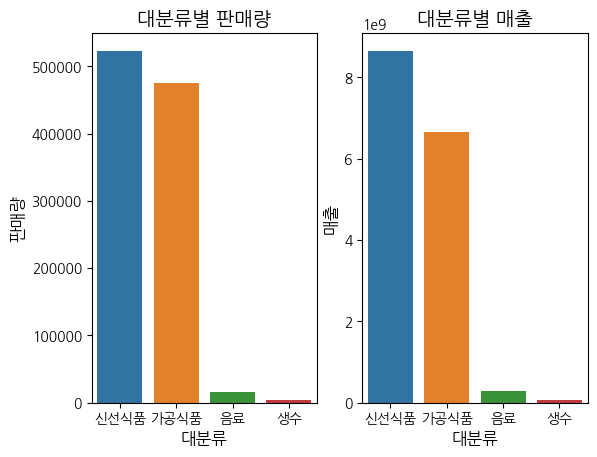

In [ ]:
## 대분류별 판매량 그래프
# 대분류별 판매량
Q_Large = order_user_item.groupby("ItemLargeName")['ItemCode'].count()

# 'Q_Large'를 데이터프레임으로 변환하고 'ItemLargeName'과 'Count' 열 이름을 지정
Q_Large_df = Q_Large.reset_index(name='Count')

# 'Count'를 기준으로 내림차순 정렬
Q_Large_sorted = Q_Large_df.sort_values(by='Count', ascending=False)

# Seaborn으로 내림차순 정렬된 바 차트 시각화
plt.subplot(121)
sns.barplot(y='Count', x='ItemLargeName', data=Q_Large_sorted, hue='ItemLargeName')

# 그래프 제목 설정
plt.title('대분류별 판매량', fontsize=14)

# x, y축 라벨 설정
plt.xlabel('대분류', fontsize=12)
plt.ylabel('판매량', fontsize=12)

# 그래프 표시
# plt.show()

## 대분류별 매출 그래프
# ItemLargeName별로 Price의 합계를 계산
price_sum_by_large = order_user_item.groupby('ItemLargeName')['Price'].sum().reset_index()

# 지정된 ItemLargeName 순서
ordered_categories = ['신선식품', '가공식품', '음료', '생수']

# 'ItemLargeName' 열을 Categorical 타입으로 변환하고 지정된 순서를 적용
price_sum_by_large['ItemLargeName'] = pd.Categorical(price_sum_by_large['ItemLargeName'], categories=ordered_categories, ordered=True)

# 정렬된 데이터를 바탕으로 그래프를 그림
plt.subplot(122)
#plt.figure(figsize=(10, 6))
sns.barplot(x='ItemLargeName', y='Price', data=price_sum_by_large, hue='ItemLargeName')

# 그래프 제목 및 축 라벨 설정
plt.title('대분류별 매출', fontsize=14)
plt.xlabel('대분류', fontsize=12)
plt.ylabel('매출', fontsize=12)


plt.show()

## 중분류별 판매량 & 매출 그래프

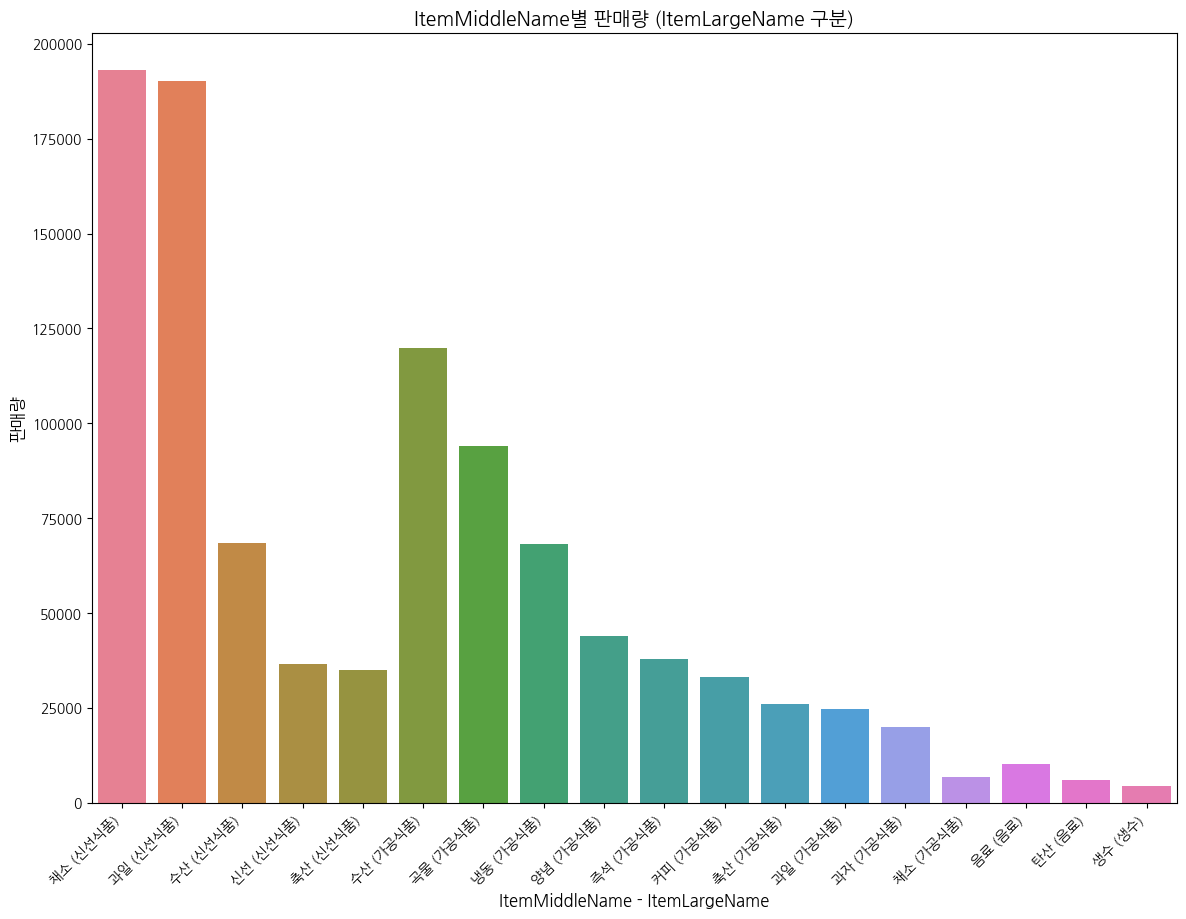

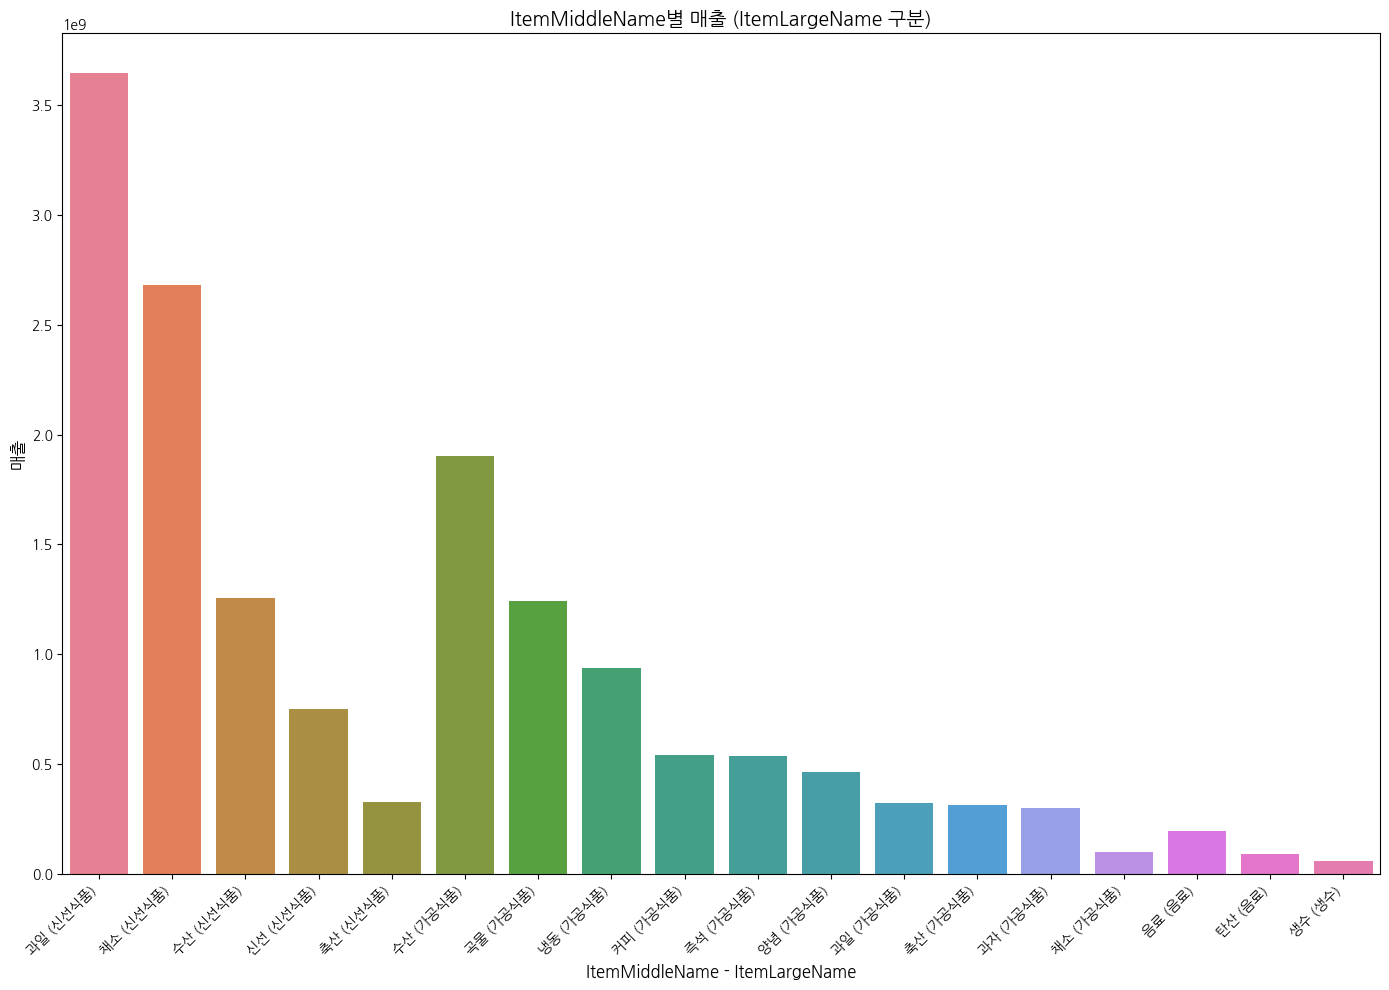

In [ ]:
## 중분류별 판매량 그래프
# ItemLargeName과 ItemMiddleName별로 판매량(각 ItemCode의 개수)을 집계
sales_counts = order_user_item.groupby(['ItemLargeName', 'ItemMiddleName'])['ItemCode'].count().reset_index(name='SalesCount')

# 지정된 ItemLargeName 순서
ordered_categories = ['신선식품', '가공식품', '음료', '생수']

# 'ItemLargeName' 열을 Categorical 타입으로 변환하고 지정된 순서를 적용
sales_counts['ItemLargeName'] = pd.Categorical(sales_counts['ItemLargeName'], categories=ordered_categories, ordered=True)

# 'ItemMiddleName'과 'ItemLargeName'을 결합하여 이중축 라벨 생성
sales_counts['DualAxisLabel'] = sales_counts['ItemMiddleName'] + " (" + sales_counts['ItemLargeName'].astype(str) + ")"

# ItemLargeName 순서에 따라 정렬하고, 동일 ItemLargeName 내에서는 판매량으로 내림차순 정렬
sales_counts_sorted = sales_counts.sort_values(by=['ItemLargeName', 'SalesCount'], ascending=[True, False])

# Seaborn을 이용해 한 그래프 안에 판매량 바 차트 그리기
plt.figure(figsize=(14, 10))
barplot = sns.barplot(x='DualAxisLabel', y='SalesCount', data=sales_counts_sorted, hue='DualAxisLabel')

# x축 라벨 회전 및 폰트 사이즈 조정
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)

# x, y축 및 타이틀 라벨 설정
plt.xlabel('ItemMiddleName - ItemLargeName', fontsize=12)
plt.ylabel('판매량', fontsize=12)
plt.title('ItemMiddleName별 판매량 (ItemLargeName 구분)', fontsize=14)


## 중분류별 매출 그래프
# ItemLargeName과 ItemMiddleName별로 판매량(각 ItemCode의 개수)을 집계
price_sums = order_user_item.groupby(['ItemLargeName', 'ItemMiddleName'])['Price'].sum().reset_index(name='TotalPrice')

# 지정된 ItemLargeName 순서
ordered_categories = ['신선식품', '가공식품', '음료', '생수']

# 'ItemLargeName' 열을 Categorical 타입으로 변환하고 지정된 순서를 적용
price_sums['ItemLargeName'] = pd.Categorical(price_sums['ItemLargeName'], categories=ordered_categories, ordered=True)

# 'ItemMiddleName'과 'ItemLargeName'을 결합하여 이중축 라벨 생성
price_sums['DualAxisLabel'] = price_sums['ItemMiddleName'] + " (" + price_sums['ItemLargeName'].astype(str) + ")"

# ItemLargeName 순서에 따라 정렬하고, 동일 ItemLargeName 내에서는 판매량으로 내림차순 정렬
price_sums_sorted = price_sums.sort_values(by=['ItemLargeName', 'TotalPrice'], ascending=[True, False])

# Seaborn을 이용해 한 그래프 안에 판매량 바 차트 그리기
plt.figure(figsize=(14, 10))
barplot = sns.barplot(x='DualAxisLabel', y='TotalPrice', data=price_sums_sorted, hue='DualAxisLabel')

# x축 라벨 회전 및 폰트 사이즈 조정
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)

# x, y축 및 타이틀 라벨 설정
plt.xlabel('ItemMiddleName - ItemLargeName', fontsize=12)
plt.ylabel('매출', fontsize=12)
plt.title('ItemMiddleName별 매출 (ItemLargeName 구분)', fontsize=14)



# 그래프 표시
plt.tight_layout()
plt.show()

## 소분류별 판매량 & 매출 그래프

<Figure size 500x600 with 0 Axes>

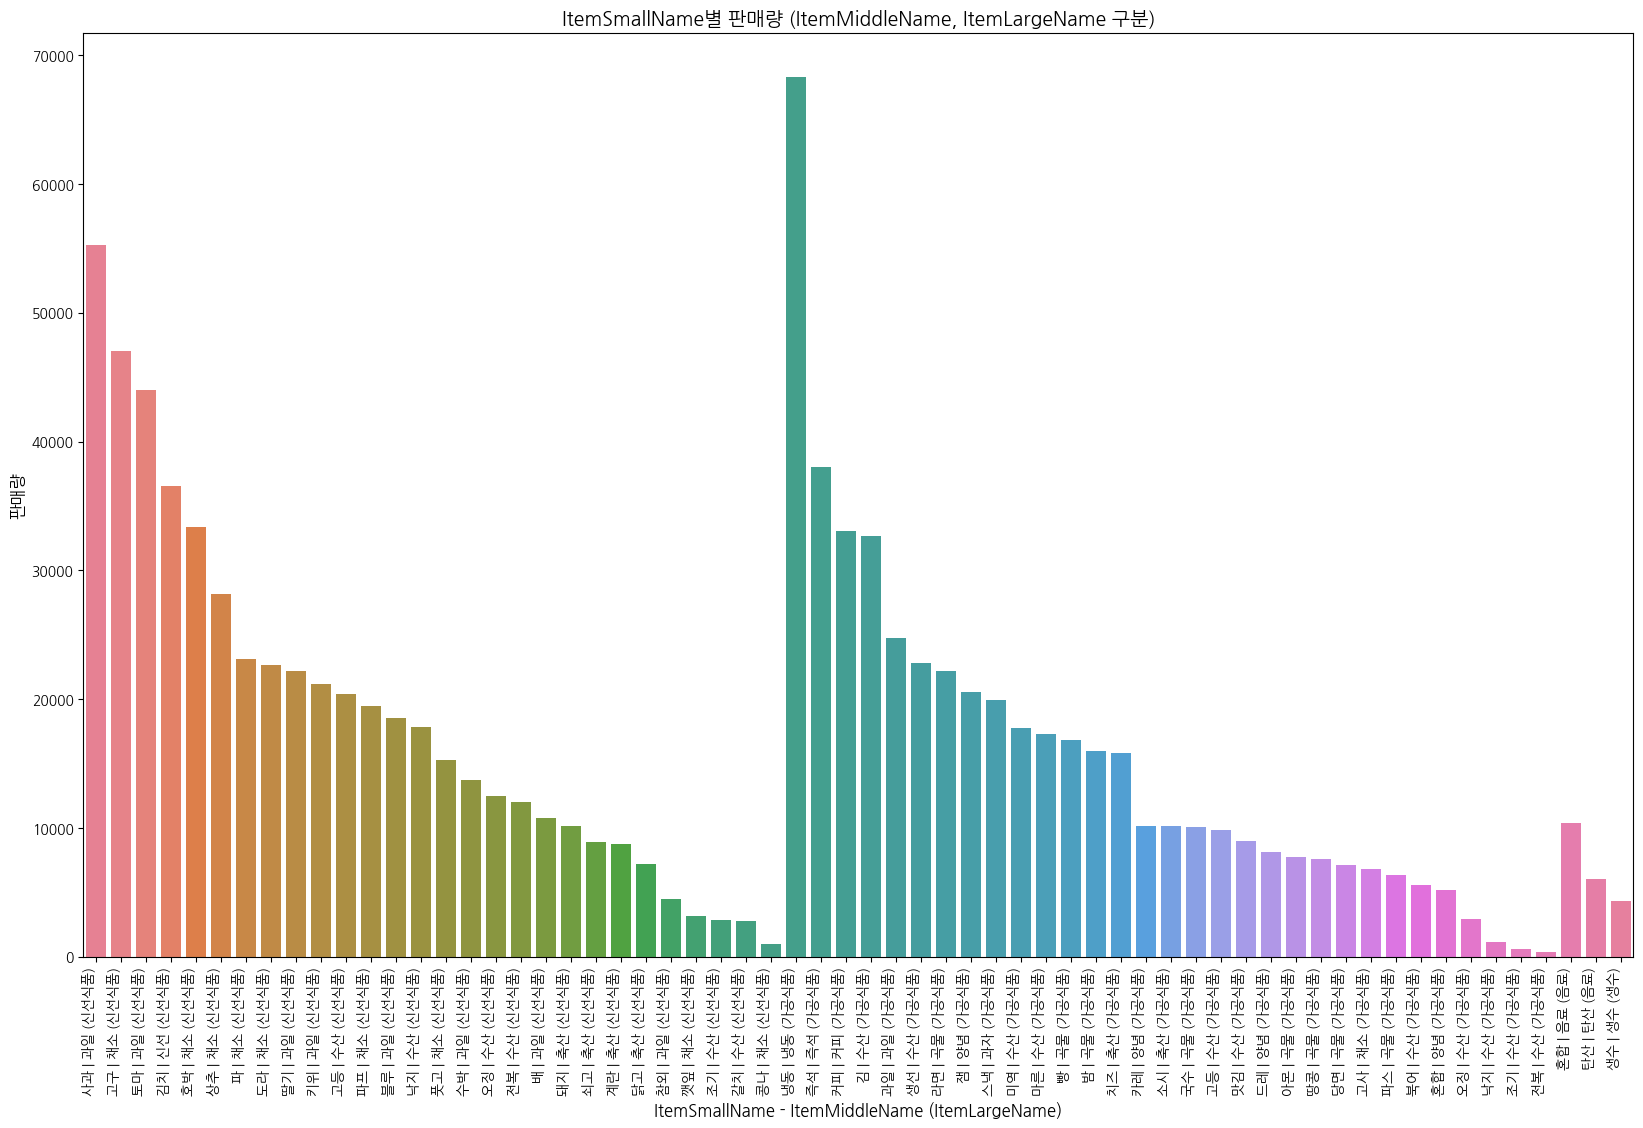

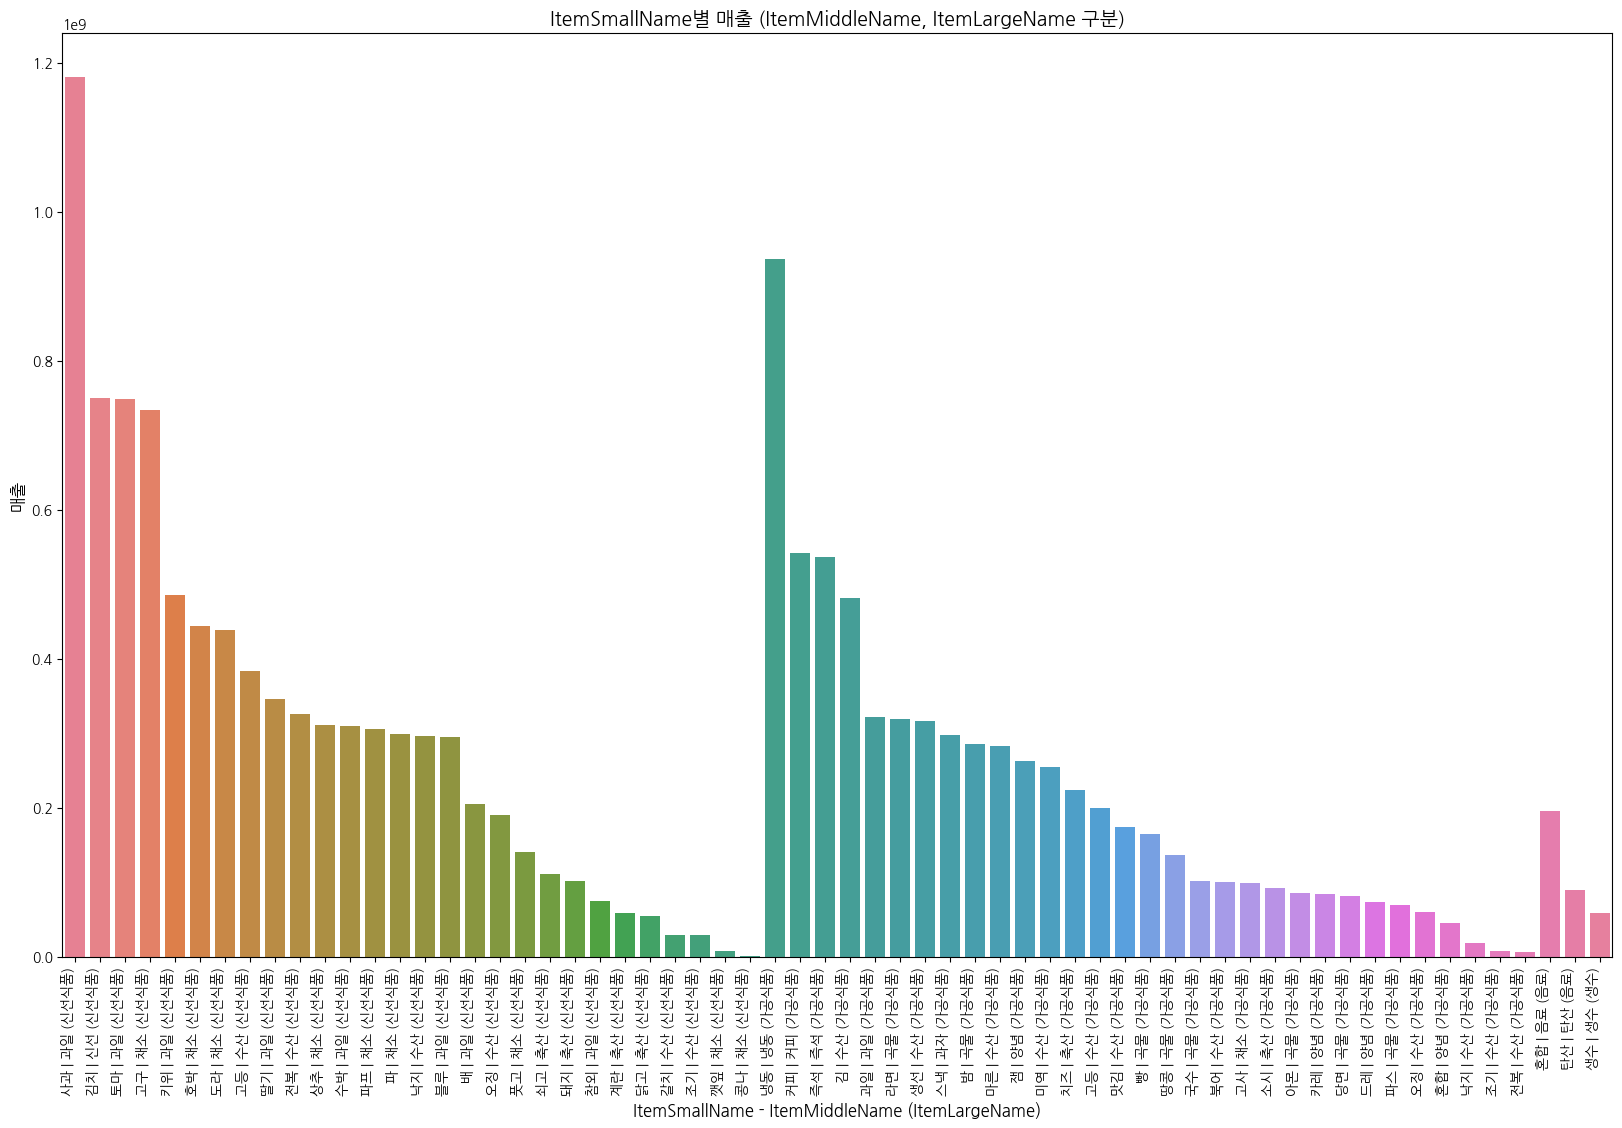

In [ ]:
plt.figure(figsize=(5, 6))

## 소분류별 판매량 그래프
# ItemSmallName, ItemMiddleName, ItemLargeName별로 판매량(각 ItemCode의 개수)을 집계
sales_counts = order_user_item.groupby(['ItemLargeName', 'ItemMiddleName', 'ItemSmallName'])['ItemCode'].count().reset_index(name='SalesCount')

# 지정된 ItemLargeName 순서
ordered_categories = ['신선식품', '가공식품', '음료', '생수']

# 'ItemLargeName' 열을 Categorical 타입으로 변환하고 지정된 순서를 적용
sales_counts['ItemLargeName'] = pd.Categorical(sales_counts['ItemLargeName'], categories=ordered_categories, ordered=True)

# 'ItemSmallName', 'ItemMiddleName', 'ItemLargeName'을 결합하여 삼중축 라벨 생성
sales_counts['TripleAxisLabel'] = sales_counts['ItemSmallName'] + " | " + sales_counts['ItemMiddleName'] + " (" + sales_counts['ItemLargeName'].astype(str) + ")"

# ItemLargeName 순서에 따라 정렬하고, 동일 ItemLargeName 내에서는 판매량으로 내림차순 정렬
sales_counts_sorted = sales_counts.sort_values(by=['ItemLargeName', 'SalesCount'], ascending=[True, False])

# Seaborn을 이용해 한 그래프 안에 판매량 바 차트 그리기

plt.figure(figsize=(20, 12))
barplot = sns.barplot(x='TripleAxisLabel', y='SalesCount', data=sales_counts_sorted, hue='TripleAxisLabel')

# x축 라벨 회전 및 폰트 사이즈 조정
plt.xticks(rotation=90, ha="right", fontsize=10)
plt.yticks(fontsize=10)

# x, y축 및 타이틀 라벨 설정
plt.xlabel('ItemSmallName - ItemMiddleName (ItemLargeName)', fontsize=12)
plt.ylabel('판매량', fontsize=12)
plt.title('ItemSmallName별 판매량 (ItemMiddleName, ItemLargeName 구분)', fontsize=14)

## 소분류별 매출 그래프
# ItemLargeName, ItemMiddleName, ItemSmallName별로 Price의 합계를 계산
price_sums = order_user_item.groupby(['ItemLargeName', 'ItemMiddleName', 'ItemSmallName'])['Price'].sum().reset_index(name='TotalPrice')

# 지정된 ItemLargeName 순서
ordered_categories = ['신선식품', '가공식품', '음료', '생수']

# 'ItemLargeName' 열을 Categorical 타입으로 변환하고 지정된 순서를 적용
price_sums['ItemLargeName'] = pd.Categorical(price_sums['ItemLargeName'], categories=ordered_categories, ordered=True)

# 'ItemSmallName', 'ItemMiddleName', 'ItemLargeName'을 결합하여 삼중축 라벨 생성
price_sums['TripleAxisLabel'] = price_sums['ItemSmallName'] + " | " + price_sums['ItemMiddleName'] + " (" + price_sums['ItemLargeName'].astype(str) + ")"

# ItemLargeName 순서에 따라 정렬하고, 동일 ItemLargeName 내에서는 TotalPrice로 내림차순 정렬
price_sums_sorted = price_sums.sort_values(by=['ItemLargeName', 'TotalPrice'], ascending=[True, False])

# Seaborn을 이용해 한 그래프 안에 TotalPrice 바 차트 그리기

plt.figure(figsize=(20, 12))
barplot = sns.barplot(x='TripleAxisLabel', y='TotalPrice', data=price_sums_sorted, hue='TripleAxisLabel')

# x축 라벨 회전 및 폰트 사이즈 조정
plt.xticks(rotation=90, ha="right", fontsize=10)
plt.yticks(fontsize=10)

# x, y축 및 타이틀 라벨 설정
plt.xlabel('ItemSmallName - ItemMiddleName (ItemLargeName)', fontsize=12)
plt.ylabel('매출', fontsize=12)
plt.title('ItemSmallName별 매출 (ItemMiddleName, ItemLargeName 구분)', fontsize=14)

# 출력
plt.show()

## 주문

### 주문 ID 별로 아이템 코드가 2개 이상인 것들

In [ ]:
# idOrder와 ItemCode로 그룹화
grouped = order_user_item.groupby(['idOrder', 'ItemCode']).size()

# 크기가 1보다 큰 그룹을 필터링하여 해당하는 'idOrder'와 'ItemCode'의 조합을 찾음
duplicates = grouped[grouped > 1].reset_index()[['idOrder', 'ItemCode']]

# 위에서 찾은 'idOrder'와 'ItemCode'의 조합을 가진 원본 데이터에서 해당하는 행들만 추출
filtered_orders = pd.merge(df, duplicates, on=['idOrder', 'ItemCode'])

# 결과 확인
print(filtered_orders)

Empty DataFrame
Columns: [idUser, idOrder, OrderDT, ItemCode, Price, DeliveryDT, Delay_YN, ItemLargeCode, ItemLargeName, ItemMiddleCode, ItemMiddleName, ItemSmallCode, ItemSmallName, ItemName, Gender, Age, FamilyCount, MemberYN, AgeGroup, Date, Year, Month, Day, Hour, CleanedItemName, TimeBetweenOrders, Combined, Weekday, WeekdayName, Date_Delivery, Delivery_diff_Order, Delivery_Hour, DeliveryHM]
Index: []

[0 rows x 33 columns]


-  주문ID별 상품은 1개씩만 주문

### 요일 별 주문건

In [ ]:
df['WeekdayName'].value_counts()

Sunday       219884
Wednesday    184196
Thursday     177005
Tuesday      158020
Monday       143335
Friday       126732
Saturday       9539
Name: WeekdayName, dtype: int64

### 요일 별 매출

In [ ]:
df.groupby('WeekdayName').sum('Price')['Price'].sort_values(ascending=False)

WeekdayName
Sunday       3383571800
Wednesday    2830247340
Thursday     2710340010
Tuesday      2435473670
Monday       2201699720
Friday       1951091130
Saturday      147429260
Name: Price, dtype: int64

### 월 별 매출

In [ ]:
df.groupby('Month').sum('Price')['Price'].sort_values(ascending=False)

Month
5     1368496220
8     1365558970
3     1347944970
10    1324311430
1     1322494810
12    1310880120
7     1309385280
11    1302418580
6     1294815980
4     1279067320
9     1264803990
2     1169675260
Name: Price, dtype: int64

### 일자 별 매출

In [ ]:
df.groupby('Day').sum('Price')['Price'].sort_values(ascending=False)

Day
1     587252260
8     573358730
15    568412910
22    555238630
25    548702660
5     547159280
18    539657740
12    539406740
19    533202740
4     529374470
11    528245240
26    526838000
28    519243930
21    516880330
14    506710960
13    506207730
20    503473420
6     499311050
7     496932030
27    495780800
2     494051450
17    486830170
29    485647810
23    484844520
24    476890290
9     472461130
16    471677110
10    466891610
3     463480320
30    438119780
31    297569090
Name: Price, dtype: int64

### 시간 별 매출

In [ ]:
df.groupby('Hour').sum('Price')['Price'].sort_values(ascending=False)

Hour
20    1916680510
18    1465828250
19    1453890120
17    1099052870
21    1087115770
16     981520880
11     661798620
22     660532590
23     660392910
12     657548020
10     657367190
7      657300330
8      654168710
15     653205590
9      650547220
14     648488950
13     645351820
0       93951760
1       87490440
6       55309570
5       54829670
4       54246970
3       52748970
2       50485200
Name: Price, dtype: int64

### 나이대 별 매출

In [ ]:
df.groupby('AgeGroup').sum('Price')['Price'].sort_values(ascending=False)

AgeGroup
2030s    10939192740
4060s     4720660190
Name: Price, dtype: int64

## 새벽배송이 안되는 주문시간 찾기

In [ ]:
# OrderDT와 DeliveryDT의 차이가 2일 이상인 항목 찾기

# OrderDT와 DeliveryDT를 datetime 타입으로 변환
order_user_item['OrderDT'] = pd.to_datetime(order_user_item['OrderDT'], format='%d%b%Y:%H:%M:%S')
order_user_item['DeliveryDT'] = pd.to_datetime(order_user_item['DeliveryDT'], format='%d%b%Y:%H:%M:%S')

# OrderDT와 DeliveryDT의 차이를 계산 (날짜 차이이므로 timedelta 객체로 반환됨)
date_diff = (order_user_item['DeliveryDT'] - order_user_item['OrderDT']).dt.days

print(date_diff.value_counts())

# 차이가 -2 이상인 항목의 인덱스 찾기
target_indexes = date_diff[date_diff >= 2].index

# 해당 조건에 맞는 인덱스의 OrderDT 출력
target_order_dt_exact = order_user_item.loc[target_indexes, 'OrderDT']

# unique한 값만 추출하고, 시간을 기준으로 오름차순 정렬
unique_target_order_dt_exact = target_order_dt_exact.drop_duplicates().sort_values()

unique_target_order_dt_exact

0    833140
1    167761
2     17810
dtype: int64


818614   2021-01-01 21:03:49
109933   2021-01-01 21:04:08
456866   2021-01-01 21:13:39
693627   2021-01-01 21:15:35
161034   2021-01-01 21:22:11
                 ...        
948795   2023-12-29 23:18:51
998327   2023-12-29 23:36:59
150723   2023-12-29 23:51:48
13685    2023-12-29 23:52:18
357795   2023-12-30 00:51:35
Name: OrderDT, Length: 3014, dtype: datetime64[ns]

-  9시 이후인 경우, 새벽배송이 이뤄지지 않을 가능성이 높음

## 적게 시킨 주문id + 멤버십 가입 유무

In [ ]:
order_price_sum = order_user_item.groupby('idOrder')['Price'].sum().reset_index()

# orders와 users 데이터를 결합하기 전에, IDUser를 기준으로 users 데이터를 orders 데이터에 매핑
orders_df_merged = pd.merge(order_user_item[['idOrder', 'idUser']], users[['idUser', 'MemberYN']], on='idUser', how='left')

# 중복 제거를 위해 IDOrder와 MemberYN만 남기고 중복 제거
orders_df_merged_unique = orders_df_merged.drop_duplicates(subset=['idOrder'])

# IDOrder별 Price 합계와 MemberYN 정보를 결합
order_price_sum_with_membership = pd.merge(order_price_sum, orders_df_merged_unique[['idOrder', 'MemberYN']], on='idOrder', how='left')

# Price 합계 기준으로 내림차순 정렬하고 상위 5개 선택
top_5_orders_with_membership = order_price_sum_with_membership.sort_values(by='Price', ascending=False).tail(10)

top_5_orders_with_membership

,idOrder,Price,MemberYN
121666,U12064-O2021-1011,1560,Y
57150,U10974-O2021-1015,1530,Y
56655,U10966-O2021-1022,1420,Y
18765,U10319-O2021-1004,1420,Y
154428,U12623-O2021-1007,1410,Y
87813,U11491-O2021-1017,1300,Y
168951,U12866-O2021-1014,1240,Y
21643,U10367-O2021-1001,1240,N
122067,U12070-O2021-1005,1160,Y
85395,U11450-O2021-1021,1150,N


-  적게 시킨 고객의 경우 멤버십에 가입되어있는 경우가 많음
    -  적은 금액을 시켜도 배송은 가능

## 고객 조합 별 판매량 TOP 10 (2030 + 성별 + 가족 구성원)

In [ ]:
grouped = df.groupby(['AgeGroup', 'Gender', 'FamilyCount', 'ItemSmallName']).size().reset_index(name='Count')
top_10_per_combination = grouped.sort_values(by=['AgeGroup', 'Gender', 'FamilyCount', 'Count'], ascending=[True, True, True, False])
top_10_per_combination = top_10_per_combination.groupby(['AgeGroup', 'Gender', 'FamilyCount']).head(10)

# 조합 컬럼 생성
top_10_per_combination['Combination'] = top_10_per_combination['AgeGroup'] + "_" + top_10_per_combination['Gender'] + "_" + top_10_per_combination['FamilyCount'].astype(str)

# 피벗 테이블 생성
pivot = top_10_per_combination.pivot_table(index='ItemSmallName', columns='Combination', values='Count', fill_value=0)

pivot

Combination,2030s_남성_0,2030s_남성_1,2030s_남성_2,2030s_남성_3,2030s_여성_0,2030s_여성_1,2030s_여성_2,2030s_여성_3,4060s_남성_0,4060s_남성_1,4060s_남성_2,4060s_남성_3,4060s_여성_0,4060s_여성_1,4060s_여성_2,4060s_여성_3
ItemSmallName,,,,,,,,,,,,,,,,
고구,2986,4732,4950,1589,2739,4338,7118,4443,604,1355,1722,848,937,2005,4152,2520
고등,1898,3032,3031,1014,1806,2956,4522,2884,380,911,1067,553,629,1297,2646,1597
김,2043,3254,3417,1147,1932,3121,4859,3135,445,968,1132,602,640,1377,2852,1742
김치,2416,3618,3880,1241,2225,3451,5316,3390,467,1090,1235,661,797,1521,3275,1957
냉동,4297,6821,7073,2316,4132,6497,10243,6419,885,2016,2454,1237,1295,2889,6126,3623
사과,3592,5412,5691,1845,3349,5190,8286,5201,714,1657,1949,1078,1124,2278,4910,2969
즉석,2436,3920,3867,1232,2265,3673,5692,3478,477,1133,1395,679,807,1660,3313,1968
커피,2087,3273,3383,1116,1954,3190,4980,3143,431,984,1117,628,629,1430,2959,1769
토마,2790,4343,4439,1437,2683,4273,6689,4156,585,1388,1466,823,893,1770,3921,2368


## 상품별 가격에 따른 판매량 & 월별 상품 개수

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns

import zipfile
import io

import warnings

# 오류 경고 무시하기
warnings.filterwarnings(action='ignore')

In [ ]:
matplotlib.rc("font",family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False)

In [ ]:
on_items = pd.read_csv("on_items.csv")
df = pd.read_csv("kurly.csv")

### 상품별 가격에 따른 판매량

In [ ]:
# on_items 'ItemCode', 'PriceYear', 'PriceMax' 열만 선택
on_items_filtered = on_items[['ItemCode', 'PriceYear', 'PriceMax']]

# kurly 데이터셋과 on_items_filtered를 'ItemCode'와 'Year' ('PriceYear'에 해당)를 기준으로 결합합니다.
merged_data = pd.merge(df, on_items_filtered, left_on=['ItemCode', 'Year'], right_on=['ItemCode', 'PriceYear'])

# 'maxprice - price'를 계산하여 새로운 열에 추가합니다.
df['MaxPriceDiff'] = (merged_data['PriceMax'] - merged_data['Price'])/merged_data['Price']*100

# 결과를 확인합니다.
df.head()

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Delay_YN,ItemLargeCode,ItemLargeName,ItemMiddleCode,...,Year,Month,Day,Hour,CleanedItemName,TimeBetweenOrders,Combined,Weekday,WeekdayName,MaxPriceDiff
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00,0,L1,가공식품,M12,...,2021,12,3,20,이츠웰 후르츠칵테일 과일통조림 3k 슬라이스,3 days 09:06:40,"2030s, 여성",4,Friday,5.108632
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00,0,L1,가공식품,M15,...,2021,12,3,20,베지가든 수제교자만두 매콤한 김치맛 720g 360gx2개입,3 days 09:06:40,"2030s, 여성",4,Friday,3.468208
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00,0,L1,가공식품,M23,...,2021,12,3,20,매일유업 매일 상하치즈 피자용 모짜렐라 슈레드치즈 200gx5봉,3 days 09:06:40,"2030s, 여성",4,Friday,4.985337
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00,0,L4,신선식품,M12,...,2021,12,3,20,계양구 배달 싱싱한 방울토마토 750g 작전 과일나라,3 days 09:06:40,"2030s, 여성",4,Friday,5.294118
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00,0,L4,신선식품,M17,...,2021,12,3,20,낙지호롱 900g 20 25개 낙지꼬치구이 냉동낙지 양념소스70gx1팩 제공,3 days 09:06:40,"2030s, 여성",4,Friday,3.051238


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 정규화 함수 정의: 각 ItemMiddleName 그룹별로 MaxPriceDiff 정규화
def normalize_max_price_diff(group):
    group['Normalized'] = scaler.fit_transform(group[['Price']])
    return group

# fruits_data를 ItemMiddleName으로 그룹화하고 정규화 함수 적용
data_normalized = df.groupby('ItemMiddleName').apply(normalize_max_price_diff)

# 결과 확인을 위한 출력
print(data_normalized[['ItemMiddleName', 'Price', 'Normalized']].head())

  ItemMiddleName  Price  Normalized
0             과일  17030    0.392364
1             냉동   7680    0.163202
2             축산  12420    0.279159
3             과일   6250    0.121577
4             수산  14450    0.331841


In [ ]:
df_plot = data_normalized[['ItemMiddleName', 'Price', 'Normalized']]
df_plot

,ItemMiddleName,Price,Normalized
0,과일,17030,0.392364
1,냉동,7680,0.163202
2,축산,12420,0.279159
3,과일,6250,0.121577
4,수산,14450,0.331841
...,...,...,...
1018706,즉석,19680,0.465691
1018707,과일,18890,0.439086
1018708,채소,13160,0.308236
1018709,채소,17770,0.424709


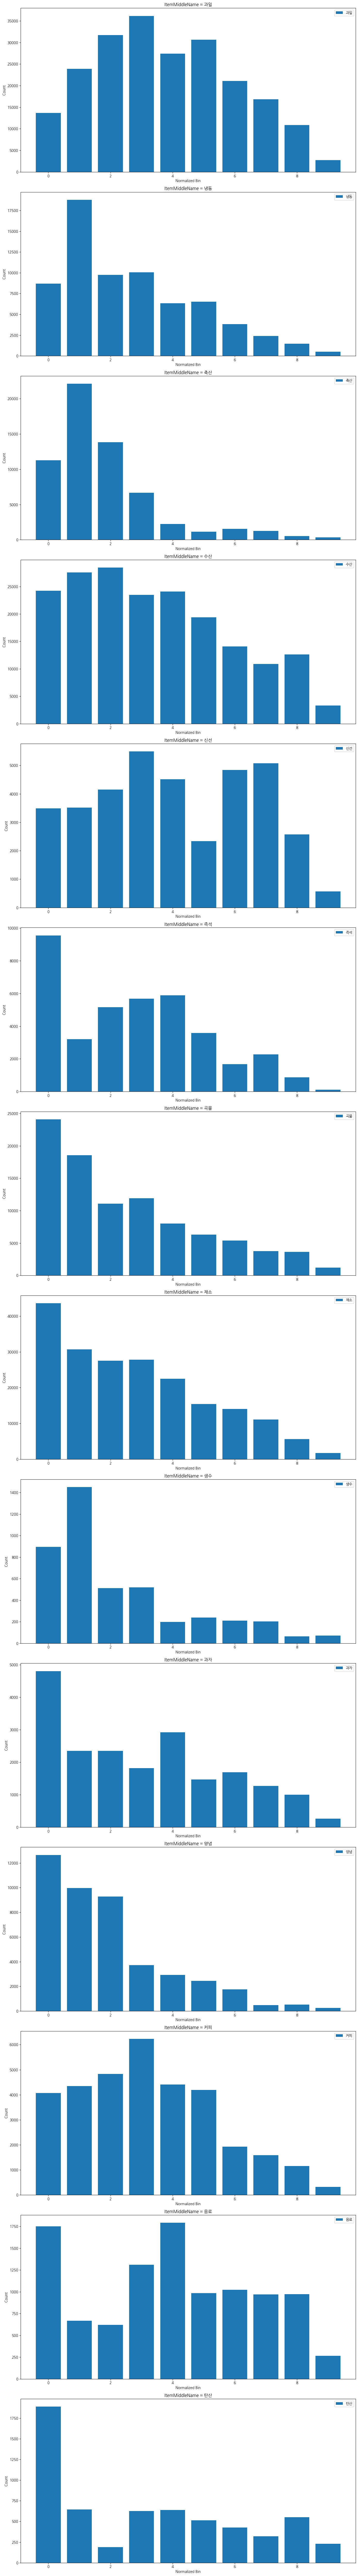

In [ ]:
# Normalized 열을 10개의 구간으로 나누기
df_plot['NormalizedBin'] = pd.cut(df_plot['Normalized'], bins=10, labels=False)

# ItemMiddleName과 NormalizedBin 별로 count 계산
grouped_count = df_plot.groupby(['ItemMiddleName', 'NormalizedBin']).size().reset_index(name='Count')

# 각 ItemMiddleName별로 그래프 그리기
import matplotlib.pyplot as plt

# ItemMiddleName 별로 분리하여 그래프 그리기
item_middle_names = df_plot['ItemMiddleName'].unique()

plt.figure(figsize=(14, 100))
for index, name in enumerate(item_middle_names):
    plt.subplot(len(item_middle_names), 1, index + 1)
    subset = grouped_count[grouped_count['ItemMiddleName'] == name]
    plt.bar(subset['NormalizedBin'], subset['Count'], label=name)
    plt.title(f'ItemMiddleName = {name}')
    plt.xlabel('Normalized Bin')
    plt.ylabel('Count')
    plt.legend()

plt.tight_layout()
plt.show()

### 월별 상품 개수

In [ ]:
df.head()

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Delay_YN,ItemLargeCode,ItemLargeName,ItemMiddleCode,...,Day,Hour,CleanedItemName,TimeBetweenOrders,Combined,Weekday,WeekdayName,MaxPriceDiff,YearMonth,YearMonthStr
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00,0,L1,가공식품,M12,...,3,20,이츠웰 후르츠칵테일 과일통조림 3k 슬라이스,3 days 09:06:40,"2030s, 여성",4,Friday,5.108632,2021-12,2021-12
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00,0,L1,가공식품,M15,...,3,20,베지가든 수제교자만두 매콤한 김치맛 720g 360gx2개입,3 days 09:06:40,"2030s, 여성",4,Friday,3.468208,2021-12,2021-12
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00,0,L1,가공식품,M23,...,3,20,매일유업 매일 상하치즈 피자용 모짜렐라 슈레드치즈 200gx5봉,3 days 09:06:40,"2030s, 여성",4,Friday,4.985337,2021-12,2021-12
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00,0,L4,신선식품,M12,...,3,20,계양구 배달 싱싱한 방울토마토 750g 작전 과일나라,3 days 09:06:40,"2030s, 여성",4,Friday,5.294118,2021-12,2021-12
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00,0,L4,신선식품,M17,...,3,20,낙지호롱 900g 20 25개 낙지꼬치구이 냉동낙지 양념소스70gx1팩 제공,3 days 09:06:40,"2030s, 여성",4,Friday,3.051238,2021-12,2021-12


In [ ]:
df['OrderDT'] = pd.to_datetime(df['OrderDT'])

# 월별 상품 개수를 계산하기 위해, 먼저 각 행의 '년도-월' 정보를 문자열로 변환
df['YearMonthStr'] = df['OrderDT'].dt.strftime('%Y-%m')

# 월별 상품 개수 집계
monthly_product_counts = df.groupby('YearMonthStr')['ItemCode'].nunique().reset_index(name='ProductCount')

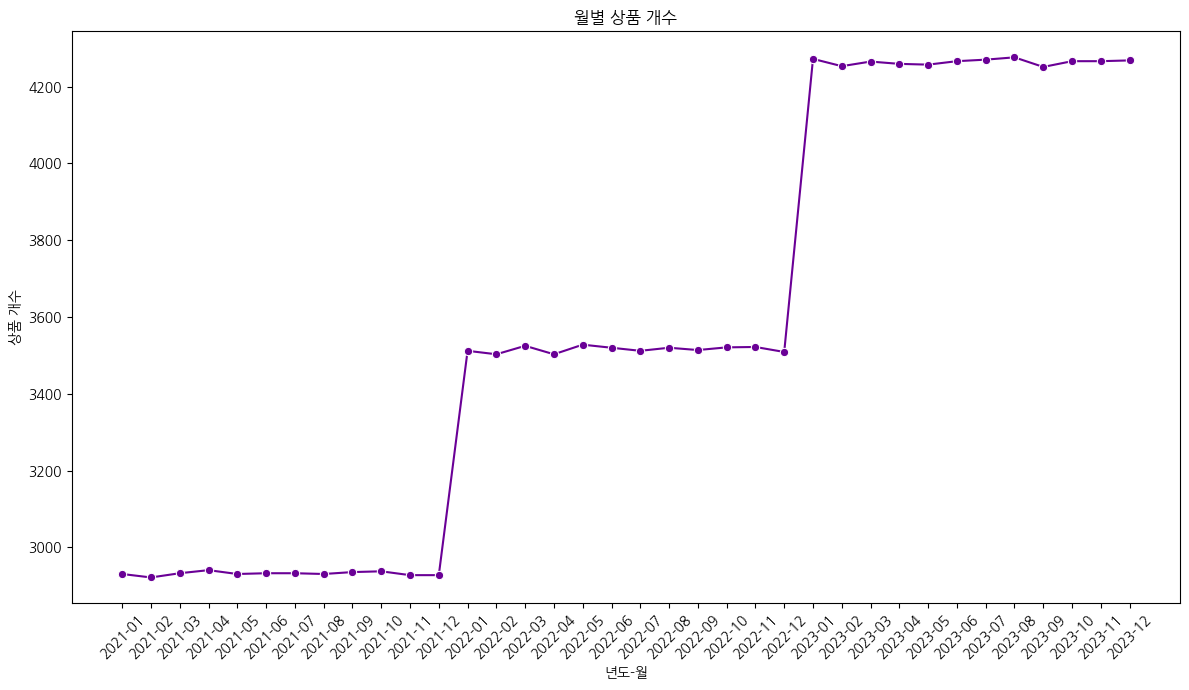

In [ ]:
# 월별 상품 개수 집계
monthly_product_counts = df.groupby('YearMonthStr')['ItemCode'].nunique().reset_index(name='ProductCount')

# seaborn의 lineplot 사용하여 월별 상품 개수 시각화
plt.figure(figsize=(12, 7))
sns.lineplot(data=monthly_product_counts, x='YearMonthStr', y='ProductCount', marker='o',color="6A0096")
plt.title('월별 상품 개수')
plt.xlabel('년도-월')
plt.ylabel('상품 개수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

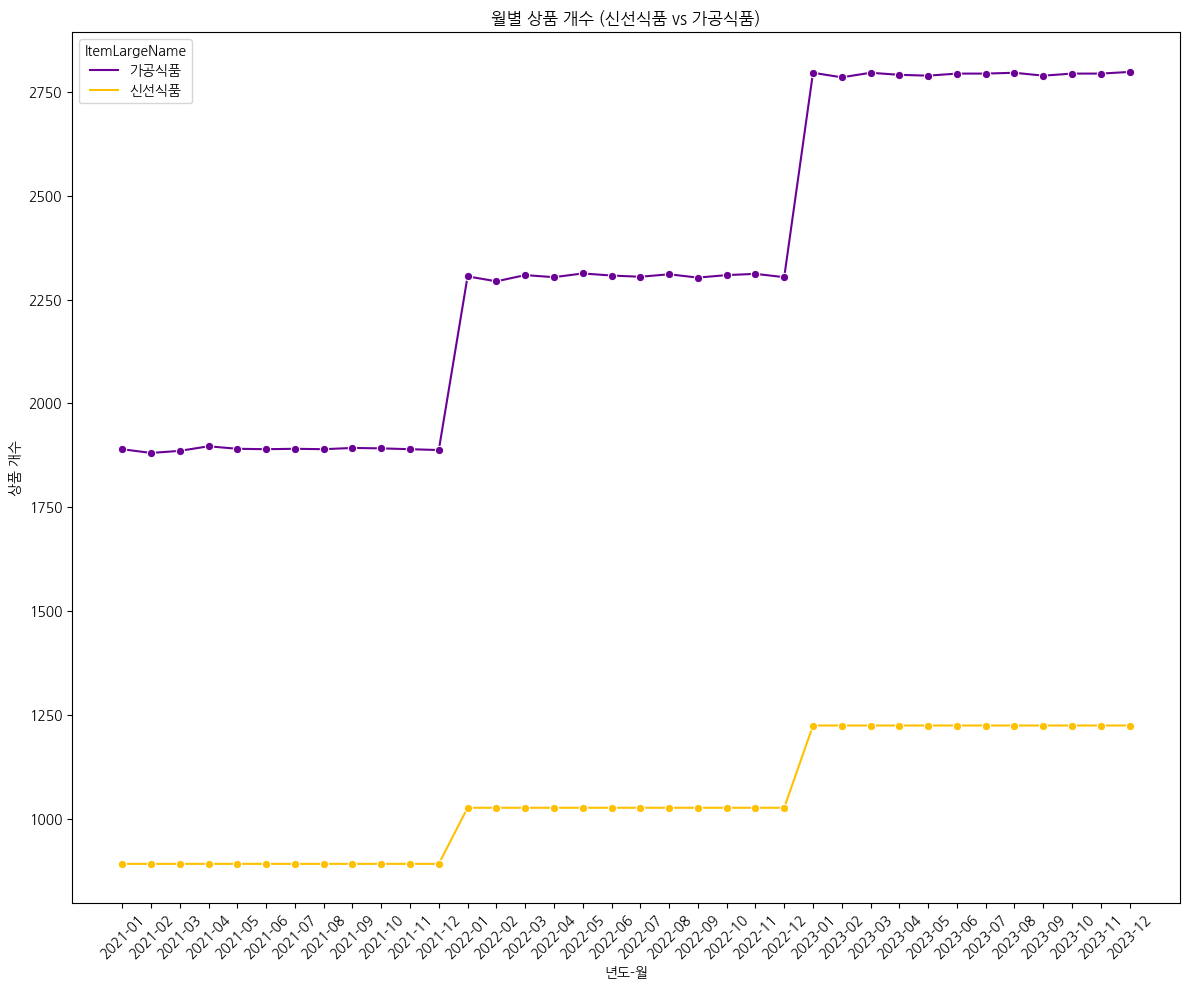

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# 데이터 필터링
filtered_df = df[df['ItemLargeName'].isin(['신선식품', '가공식품'])]

# 데이터 집계
monthly_large_product_counts = filtered_df.groupby(['YearMonthStr', 'ItemLargeName'])['ItemCode'].nunique().reset_index(name='ProductCount')

# 시각화
plt.figure(figsize=(12, 10))
sns.lineplot(data=monthly_large_product_counts, x='YearMonthStr', y='ProductCount', hue='ItemLargeName', marker='o',palette=['#6A0096','#FFC000'])
plt.title('월별 상품 개수 (신선식품 vs 가공식품)')
plt.xlabel('년도-월')
plt.ylabel('상품 개수')
plt.xticks(rotation=45)
plt.legend(title='ItemLargeName')
plt.tight_layout()
plt.show()

# EDA2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns


from sklearn.tree import export_graphviz
import graphviz
from subprocess import call
from IPython.display import Image


from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from datetime import datetime
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_ind

from xgboost import plot_importance

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE

# 팔레트 설정
palette = sns.color_palette('Paired')
colors = sns.color_palette('Pastel1')
sns.set_palette('Pastel1')

In [ ]:
matplotlib.rc("font",family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
on_items = pd.read_csv("/content/drive/MyDrive/on_items.csv")
on_items.head()
on_orders = pd.read_csv("/content/drive/MyDrive/on_orders.csv")
on_orders.head()
on_users = pd.read_csv("/content/drive/MyDrive/on_users.csv",encoding='cp949')
on_users.head()

,idUser,Gender,Age,FamilyCount,MemberYN
0,U10001,여성,26,2,Y
1,U10002,남성,61,2,Y
2,U10003,여성,34,2,Y
3,U10004,남성,26,1,N
4,U10005,여성,33,3,Y


In [ ]:
on_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043272 entries, 0 to 1043271
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   idUser      1043272 non-null  object
 1   idOrder     1043272 non-null  object
 2   OrderDT     1043272 non-null  object
 3   ItemCode    1043272 non-null  object
 4   Price       1043272 non-null  int64 
 5   DeliveryDT  1043272 non-null  object
dtypes: int64(1), object(5)
memory usage: 47.8+ MB


In [ ]:
# Age 열을 기준으로 연령대별로 분류
bins = [19, 29, 39, 49, 59, 69]  # 연령대 경계값
labels = ['20s', '30s', '40s', '50s', '60s']  # 각 연령대에 해당하는 라벨
on_users['AgeGroup'] = pd.cut(on_users['Age'], bins=bins, labels=labels, right=True)
order_user = pd.merge(on_orders, on_users, on='idUser')
order_user.head(10)

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Gender,Age,FamilyCount,MemberYN,AgeGroup
0,U10001,U10001-O2021-1001,03DEC2021:20:59:27,L1-M12-S0070-1113,17030,04DEC2021:03:26:00,여성,26,2,Y,20s
1,U10001,U10001-O2021-1001,03DEC2021:20:59:27,L1-M15-S0140-1247,7680,04DEC2021:03:26:00,여성,26,2,Y,20s
2,U10001,U10001-O2021-1001,03DEC2021:20:59:27,L1-M23-S0580-1047,12420,04DEC2021:03:26:00,여성,26,2,Y,20s
3,U10001,U10001-O2021-1001,03DEC2021:20:59:27,L4-M12-S0640-1010,6250,04DEC2021:03:26:00,여성,26,2,Y,20s
4,U10001,U10001-O2021-1001,03DEC2021:20:59:27,L4-M17-S0130-1018,14450,04DEC2021:03:26:00,여성,26,2,Y,20s
5,U10001,U10001-O2021-1001,03DEC2021:20:59:27,L4-M17-S0530-1021,23350,04DEC2021:03:26:00,여성,26,2,Y,20s
6,U10001,U10001-O2021-1001,03DEC2021:20:59:27,L4-M18-S0110-1012,11720,04DEC2021:03:26:00,여성,26,2,Y,20s
7,U10001,U10001-O2021-1002,07JAN2021:17:08:51,L1-M15-S0140-1323,22520,08JAN2021:06:24:00,여성,26,2,Y,20s
8,U10001,U10001-O2021-1002,07JAN2021:17:08:51,L1-M21-S0540-1082,3780,08JAN2021:06:24:00,여성,26,2,Y,20s
9,U10001,U10001-O2021-1002,07JAN2021:17:08:51,L4-M12-S0350-1036,21630,08JAN2021:06:24:00,여성,26,2,Y,20s


In [ ]:
# OrderDT 열을 datetime 객체로 변환
order_user['OrderDT'] = pd.to_datetime(order_user['OrderDT'], format='%d%b%Y:%H:%M:%S')

# datetime 객체에서 년을 추출하여 새로운 컬럼 Month에 저장
order_user['Year'] = order_user['OrderDT'].dt.year
# datetime 객체에서 월을 추출하여 새로운 컬럼 Month에 저장
order_user['Month'] = order_user['OrderDT'].dt.month
# datetime 객체에서 일을 추출하여 새로운 컬럼 Month에 저장
order_user['Day'] = order_user['OrderDT'].dt.day
# datetime 객체에서 시를 추출하여 새로운 컬럼 Month에 저장
order_user['Hour'] = order_user['OrderDT'].dt.hour
order_user.head()

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Gender,Age,FamilyCount,MemberYN,AgeGroup,Year,Month,Day,Hour
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,04DEC2021:03:26:00,여성,26,2,Y,20s,2021,12,3,20
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,04DEC2021:03:26:00,여성,26,2,Y,20s,2021,12,3,20
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,04DEC2021:03:26:00,여성,26,2,Y,20s,2021,12,3,20
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,04DEC2021:03:26:00,여성,26,2,Y,20s,2021,12,3,20
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,04DEC2021:03:26:00,여성,26,2,Y,20s,2021,12,3,20


In [ ]:
total_data = pd.merge(order_user, on_items, on='ItemCode')
total_data.head(10)

# list of not food --> 시간 오래 걸렸음
not_food = ["냄비", "기계", "디스펜서", "퍼즐", "냉장고", "밀폐용기",
            "액자", "수동 반죽펴기", "채칼", "캔따기", "모자",
            "카지노","용기","케이스","만두통", "바람개비", "레깅스", "수박 나무라고요",
            "스텐 상추바구니 2호 야채 튀김 과일 바스켓 채반",
            "스테인레스 상추바구니 1호 메쉬바구니 소쿠리 채반",
            "스텐 타공상추바구니 2호","수박과도 大 (10개묶음) 0151","양상추 1cm 샌들 슬리퍼  JG6 (7157830)",
            "후르츠커버포켓크로스백(수박)", "양상추 여름 블라우스 JAP60 (7271217)", "양상추 여자 슬랙스 BF33 (7416269)",
            "양상추 여자 여름샌들 JK131 (7162818)", "MT124 A4 참외색 매직터치 두성 180g 10매입 X ( 3세트 )",
            "에이프릴래빗 양상추 스트링 빅포켓 숏야상점퍼 MA0906 (6660376)", "사랑에 빠진 과일토퍼 - 참외",
            "[총알배송] 제오닉 화채 수박통 8L 채반 믹싱볼 샐러드볼 판촉물 답례품 사은",
            "익사이팅 컬러링토이 유화물감 스포츠 스포츠 참외",
            "[하프클럽/한샘]SOK 프레시 여름 사각 수박용기 4L 2P",
            "참외 모형 1P (소)", "양상추키우기 7종", "양상추키우기 7종 채소키우기", "나 채소",
            "초 가을 계절 개성 캐쥬얼 참외 껍질 쿨링 여성", "22511712S3488857739", "타공 상추 바구니 2호 과일채소 씻어 빠른건조 주방",
            "OBSESSION 100g150g200g250g300g Kabura Bullet 금속 지그 헤드 오징어 어시", "나혼자키운다(대파)",
            "밀폐용기 42호 3L 2P세트 수박보관통 과일 대파 냉장고수납 야채 냉동실정리", "양파 대파 감자 마늘 생강 조개 과일망 메시 메쉬 그물망 일자형"
            ]
len(not_food)

# ItemName에 not_food의 값이 포함된 경우 추출
not_food_order_item = total_data[total_data['ItemName'].apply(lambda x: any(item for item in not_food if item in x))]
print(not_food_order_item.shape)
not_food_order_item.head()

# order_item_df 에서 not_food 제거
data = total_data.drop(index = not_food_order_item.index)
data.head()

(60210, 25)


,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Gender,Age,FamilyCount,MemberYN,...,ItemLargeCode,ItemLargeName,ItemMiddleCode,ItemMiddleName,ItemSmallCode,ItemSmallName,ItemName,PriceYear,PriceMin,PriceMax
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,04DEC2021:03:26:00,여성,26,2,Y,...,L1,가공식품,M12,과일,S0070,과일,이츠웰 후르츠칵테일 과일통조림 3K 슬라이스,2021,16880,17900
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,04DEC2021:03:26:00,여성,26,2,Y,...,L1,가공식품,M12,과일,S0070,과일,이츠웰 후르츠칵테일 과일통조림 3K 슬라이스,2022,17580,18650
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,04DEC2021:03:26:00,여성,26,2,Y,...,L1,가공식품,M12,과일,S0070,과일,이츠웰 후르츠칵테일 과일통조림 3K 슬라이스,2023,18310,19630
3,U10047,U10047-O2021-1027,2021-02-02 14:07:24,L1-M12-S0070-1113,17300,03FEB2021:03:17:00,남성,55,0,Y,...,L1,가공식품,M12,과일,S0070,과일,이츠웰 후르츠칵테일 과일통조림 3K 슬라이스,2021,16880,17900
4,U10047,U10047-O2021-1027,2021-02-02 14:07:24,L1-M12-S0070-1113,17300,03FEB2021:03:17:00,남성,55,0,Y,...,L1,가공식품,M12,과일,S0070,과일,이츠웰 후르츠칵테일 과일통조림 3K 슬라이스,2022,17580,18650


In [ ]:
print(len(not_food))

44


In [ ]:
data.shape

(2748146, 25)

<Axes: xlabel='AgeGroup', ylabel='Count'>

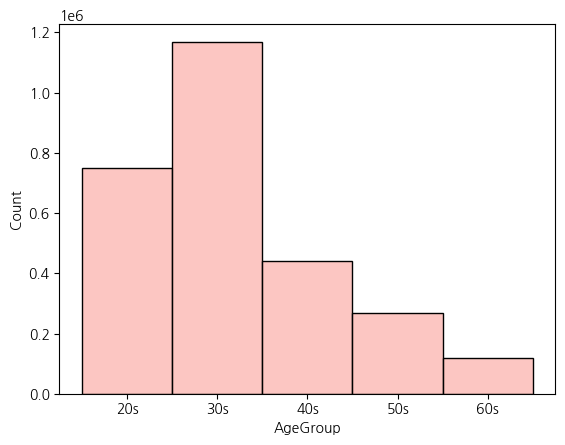

In [ ]:
sns.histplot(data = data, x='AgeGroup')

<Axes: xlabel='MemberYN', ylabel='Count'>

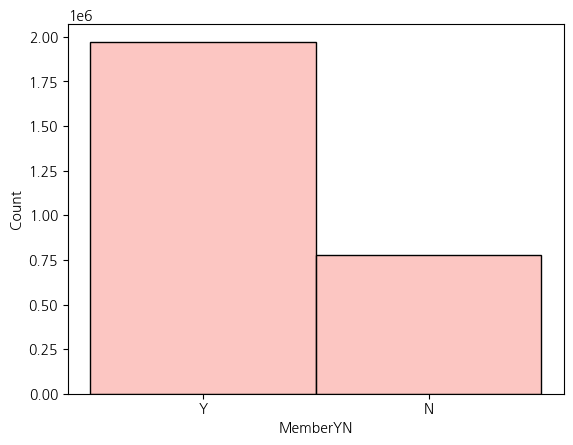

In [ ]:
sns.histplot(data = data, x='MemberYN')

<Axes: xlabel='Gender', ylabel='count'>

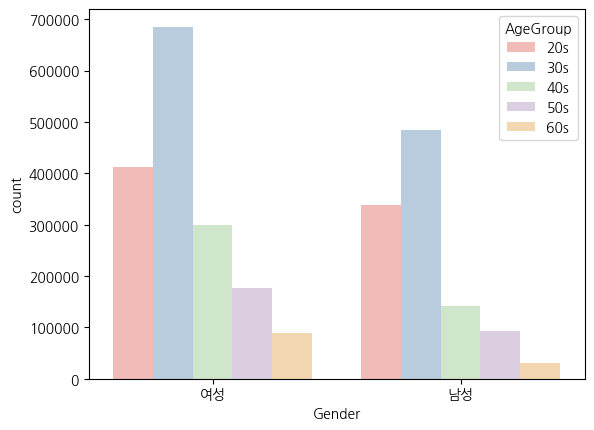

In [ ]:
sns.countplot(data = data, x='Gender', hue = 'AgeGroup')

<Axes: xlabel='Gender', ylabel='count'>

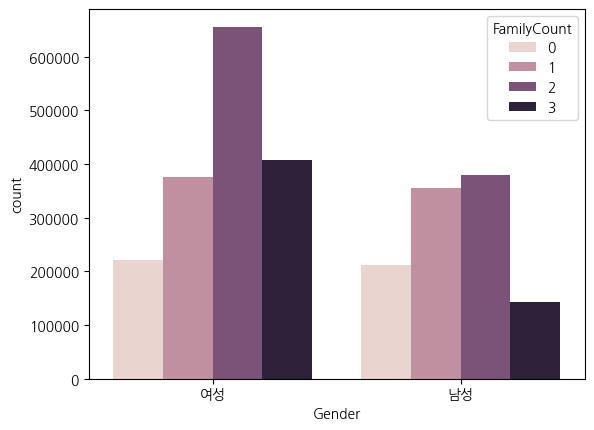

In [ ]:
sns.countplot(data = data, x='Gender', hue = 'FamilㄷyCount')

<Axes: xlabel='AgeGroup', ylabel='count'>

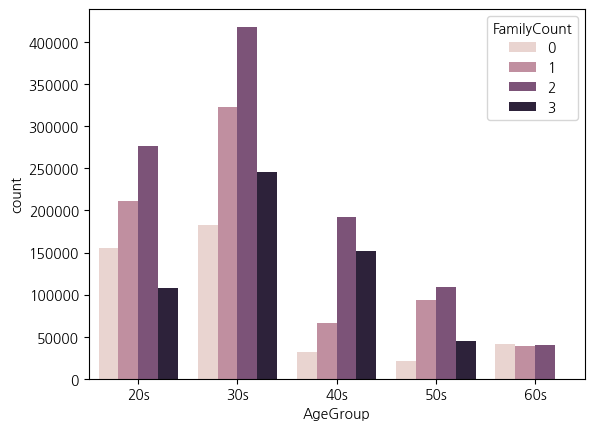

In [ ]:
sns.countplot(data = data, x='AgeGroup', hue = 'FamilyCount')

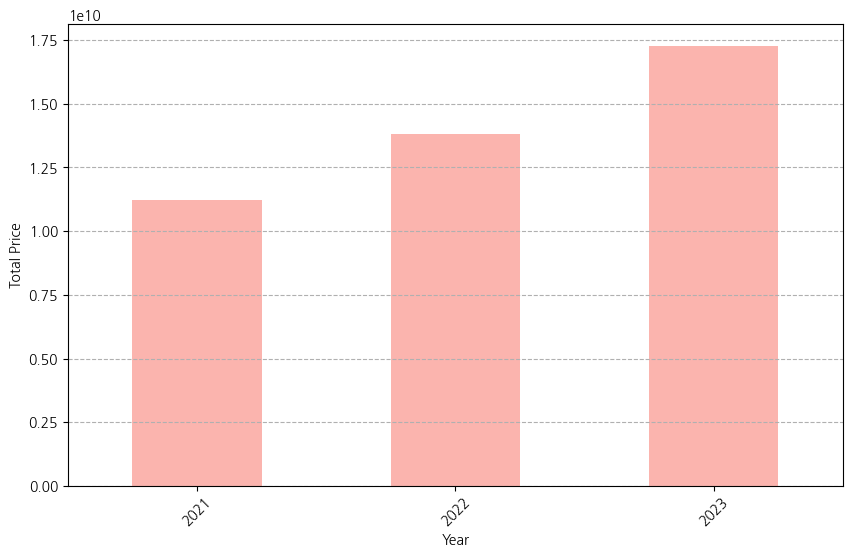

In [ ]:
age_group_price_sum = data.groupby('Year')['Price'].sum()
plt.figure(figsize=(10, 6))
age_group_price_sum.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

<Axes: xlabel='ItemLargeName', ylabel='count'>

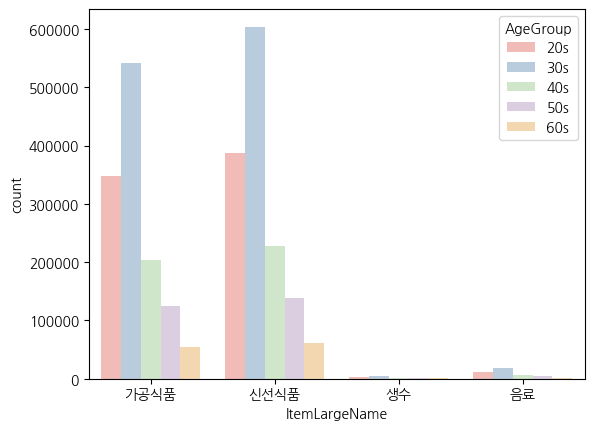

In [ ]:
sns.countplot(data = data, x='ItemLargeName', hue = 'AgeGroup')


<Axes: xlabel='ItemLargeName', ylabel='count'>

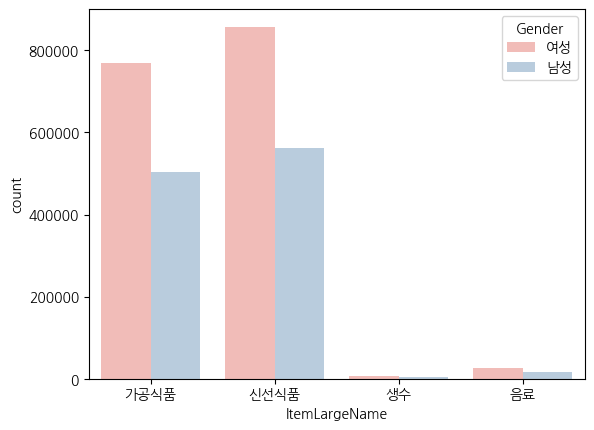

In [ ]:
sns.countplot(data = data, x='ItemLargeName', hue = 'Gender')

<Axes: xlabel='ItemMiddleName', ylabel='count'>

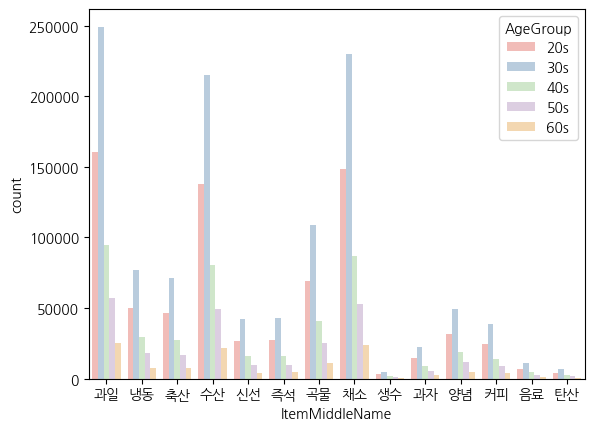

In [ ]:
sns.countplot(data = data, x='ItemMiddleName', hue = 'AgeGroup')

<Axes: xlabel='ItemMiddleName', ylabel='count'>

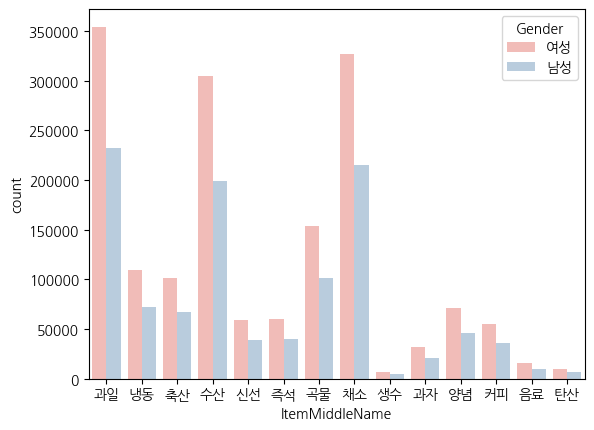

In [ ]:
sns.countplot(data = data, x='ItemMiddleName', hue = 'Gender')

<Axes: xlabel='ItemSmallName', ylabel='count'>

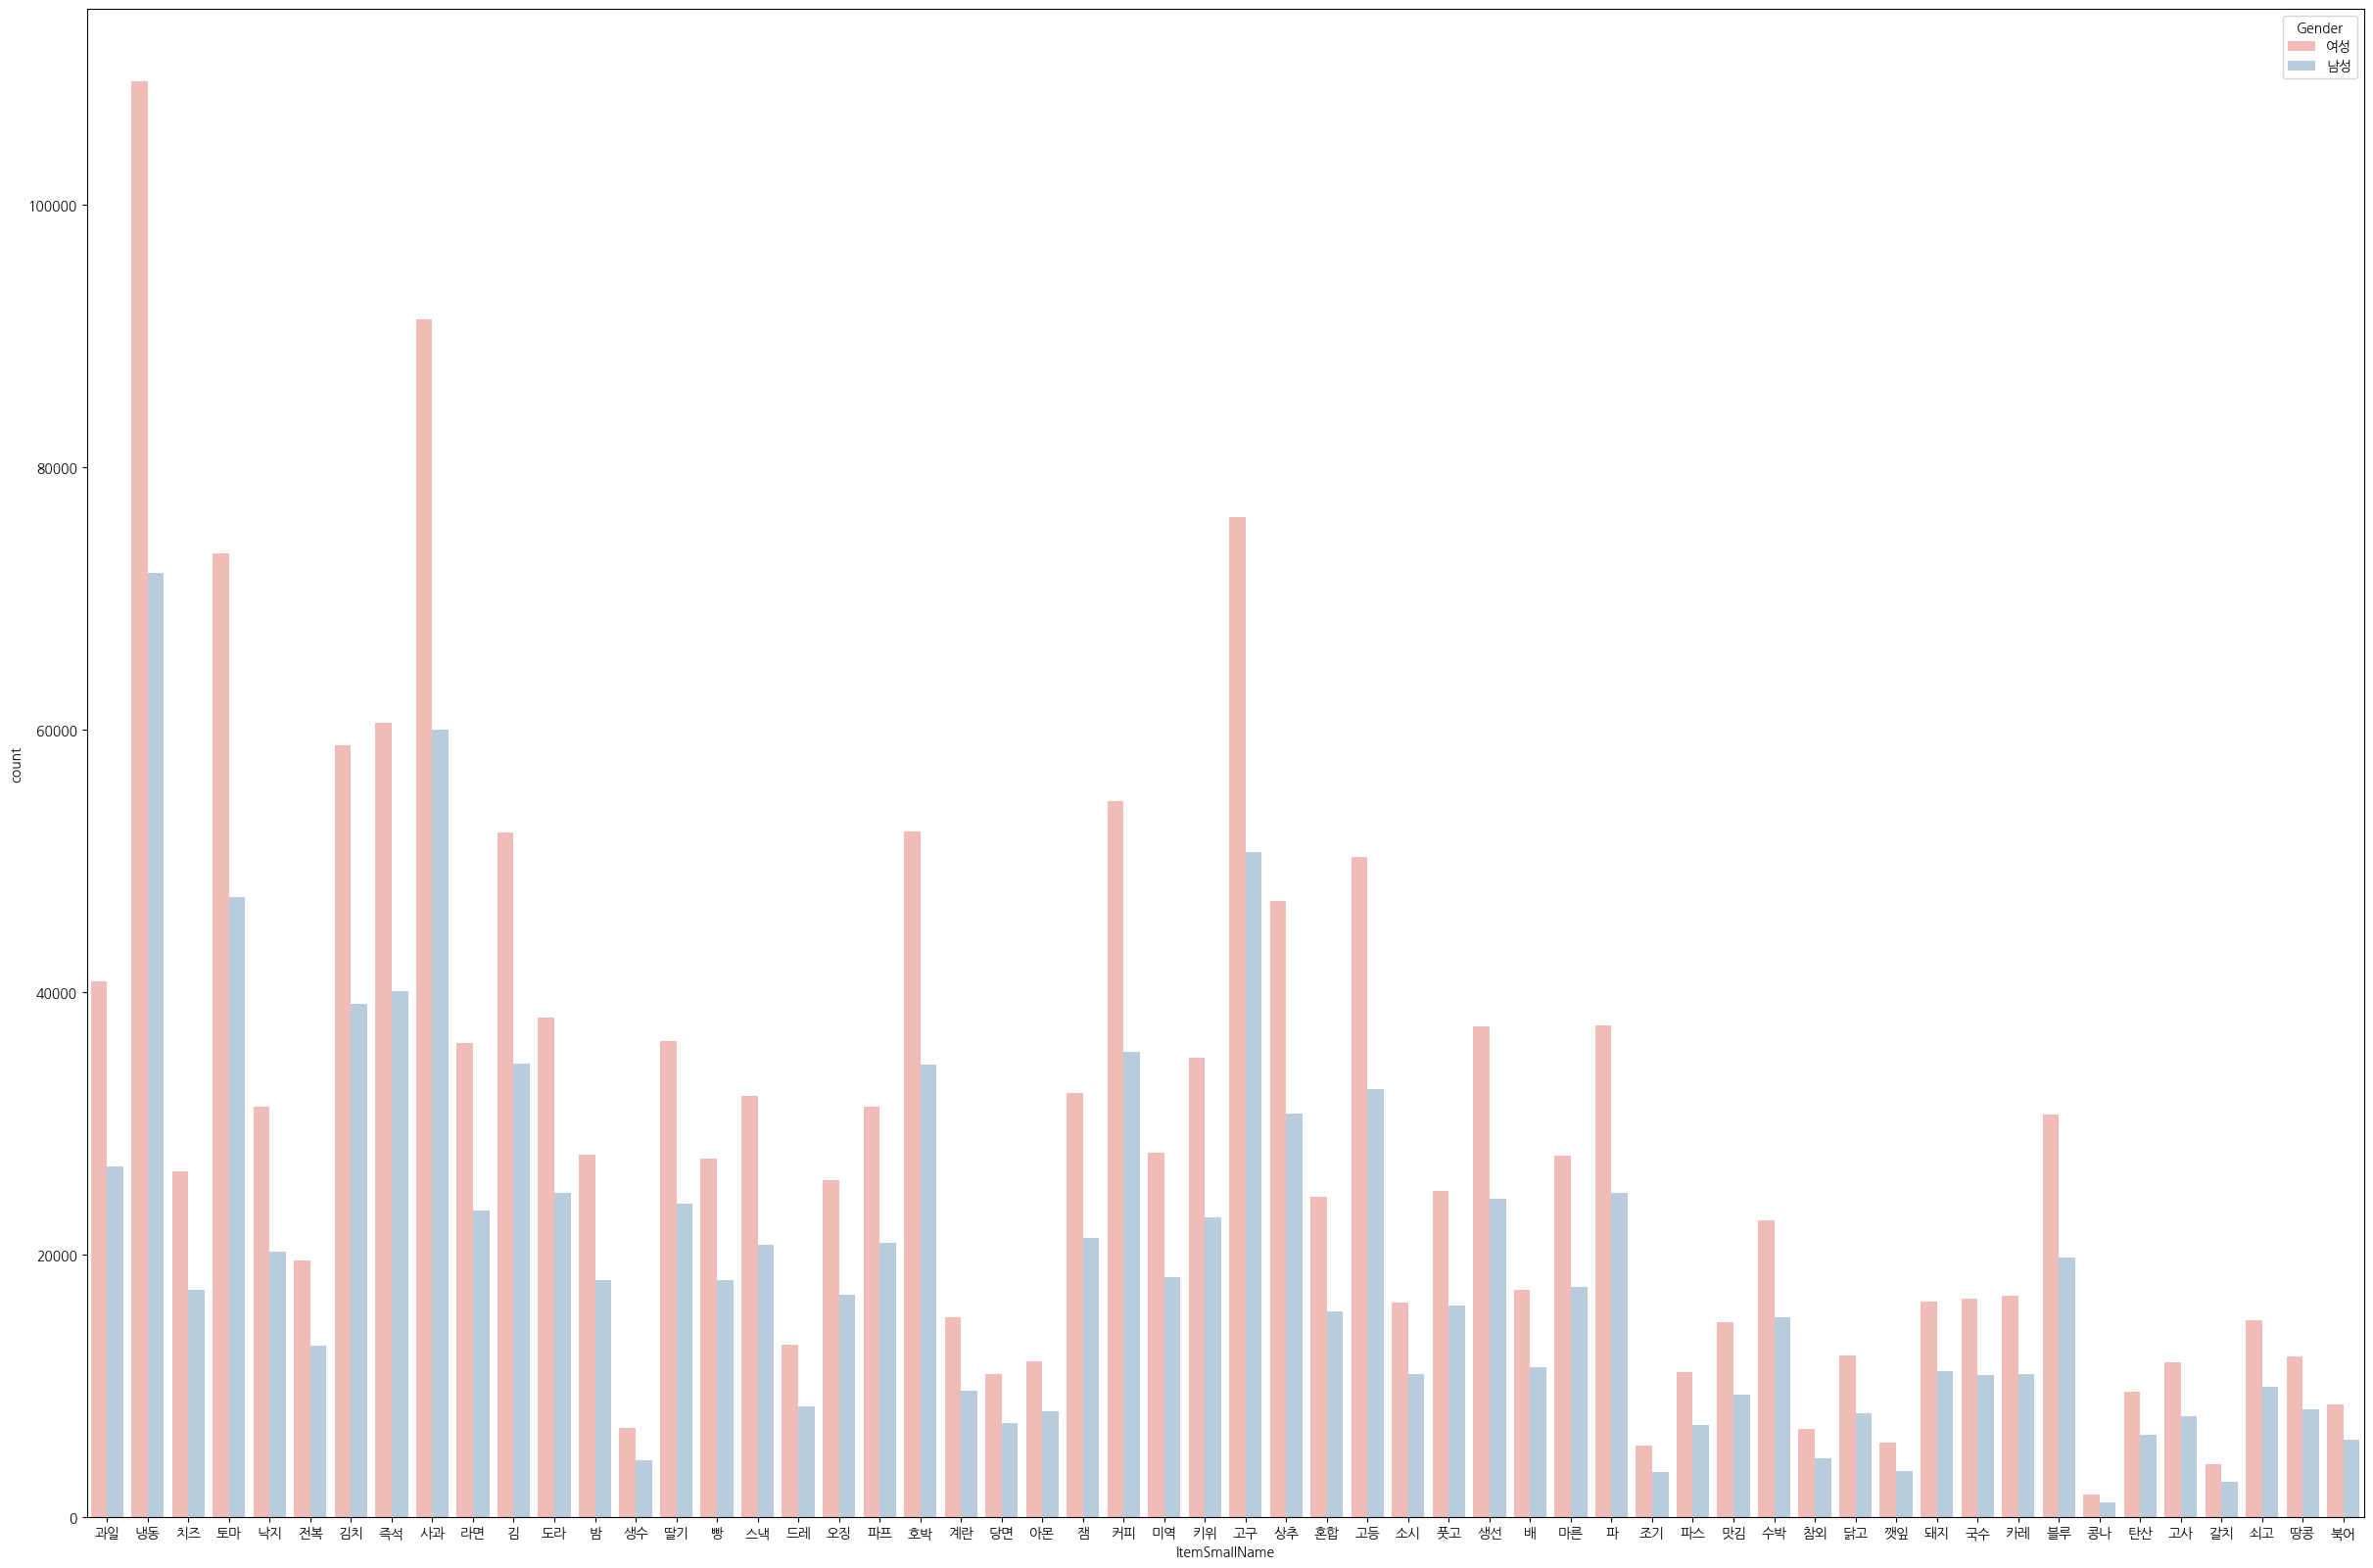

In [ ]:
plt.figure(figsize=(30, 20))
sns.countplot(data = data, x='ItemSmallName', hue = 'Gender')

<Axes: xlabel='ItemSmallName', ylabel='count'>

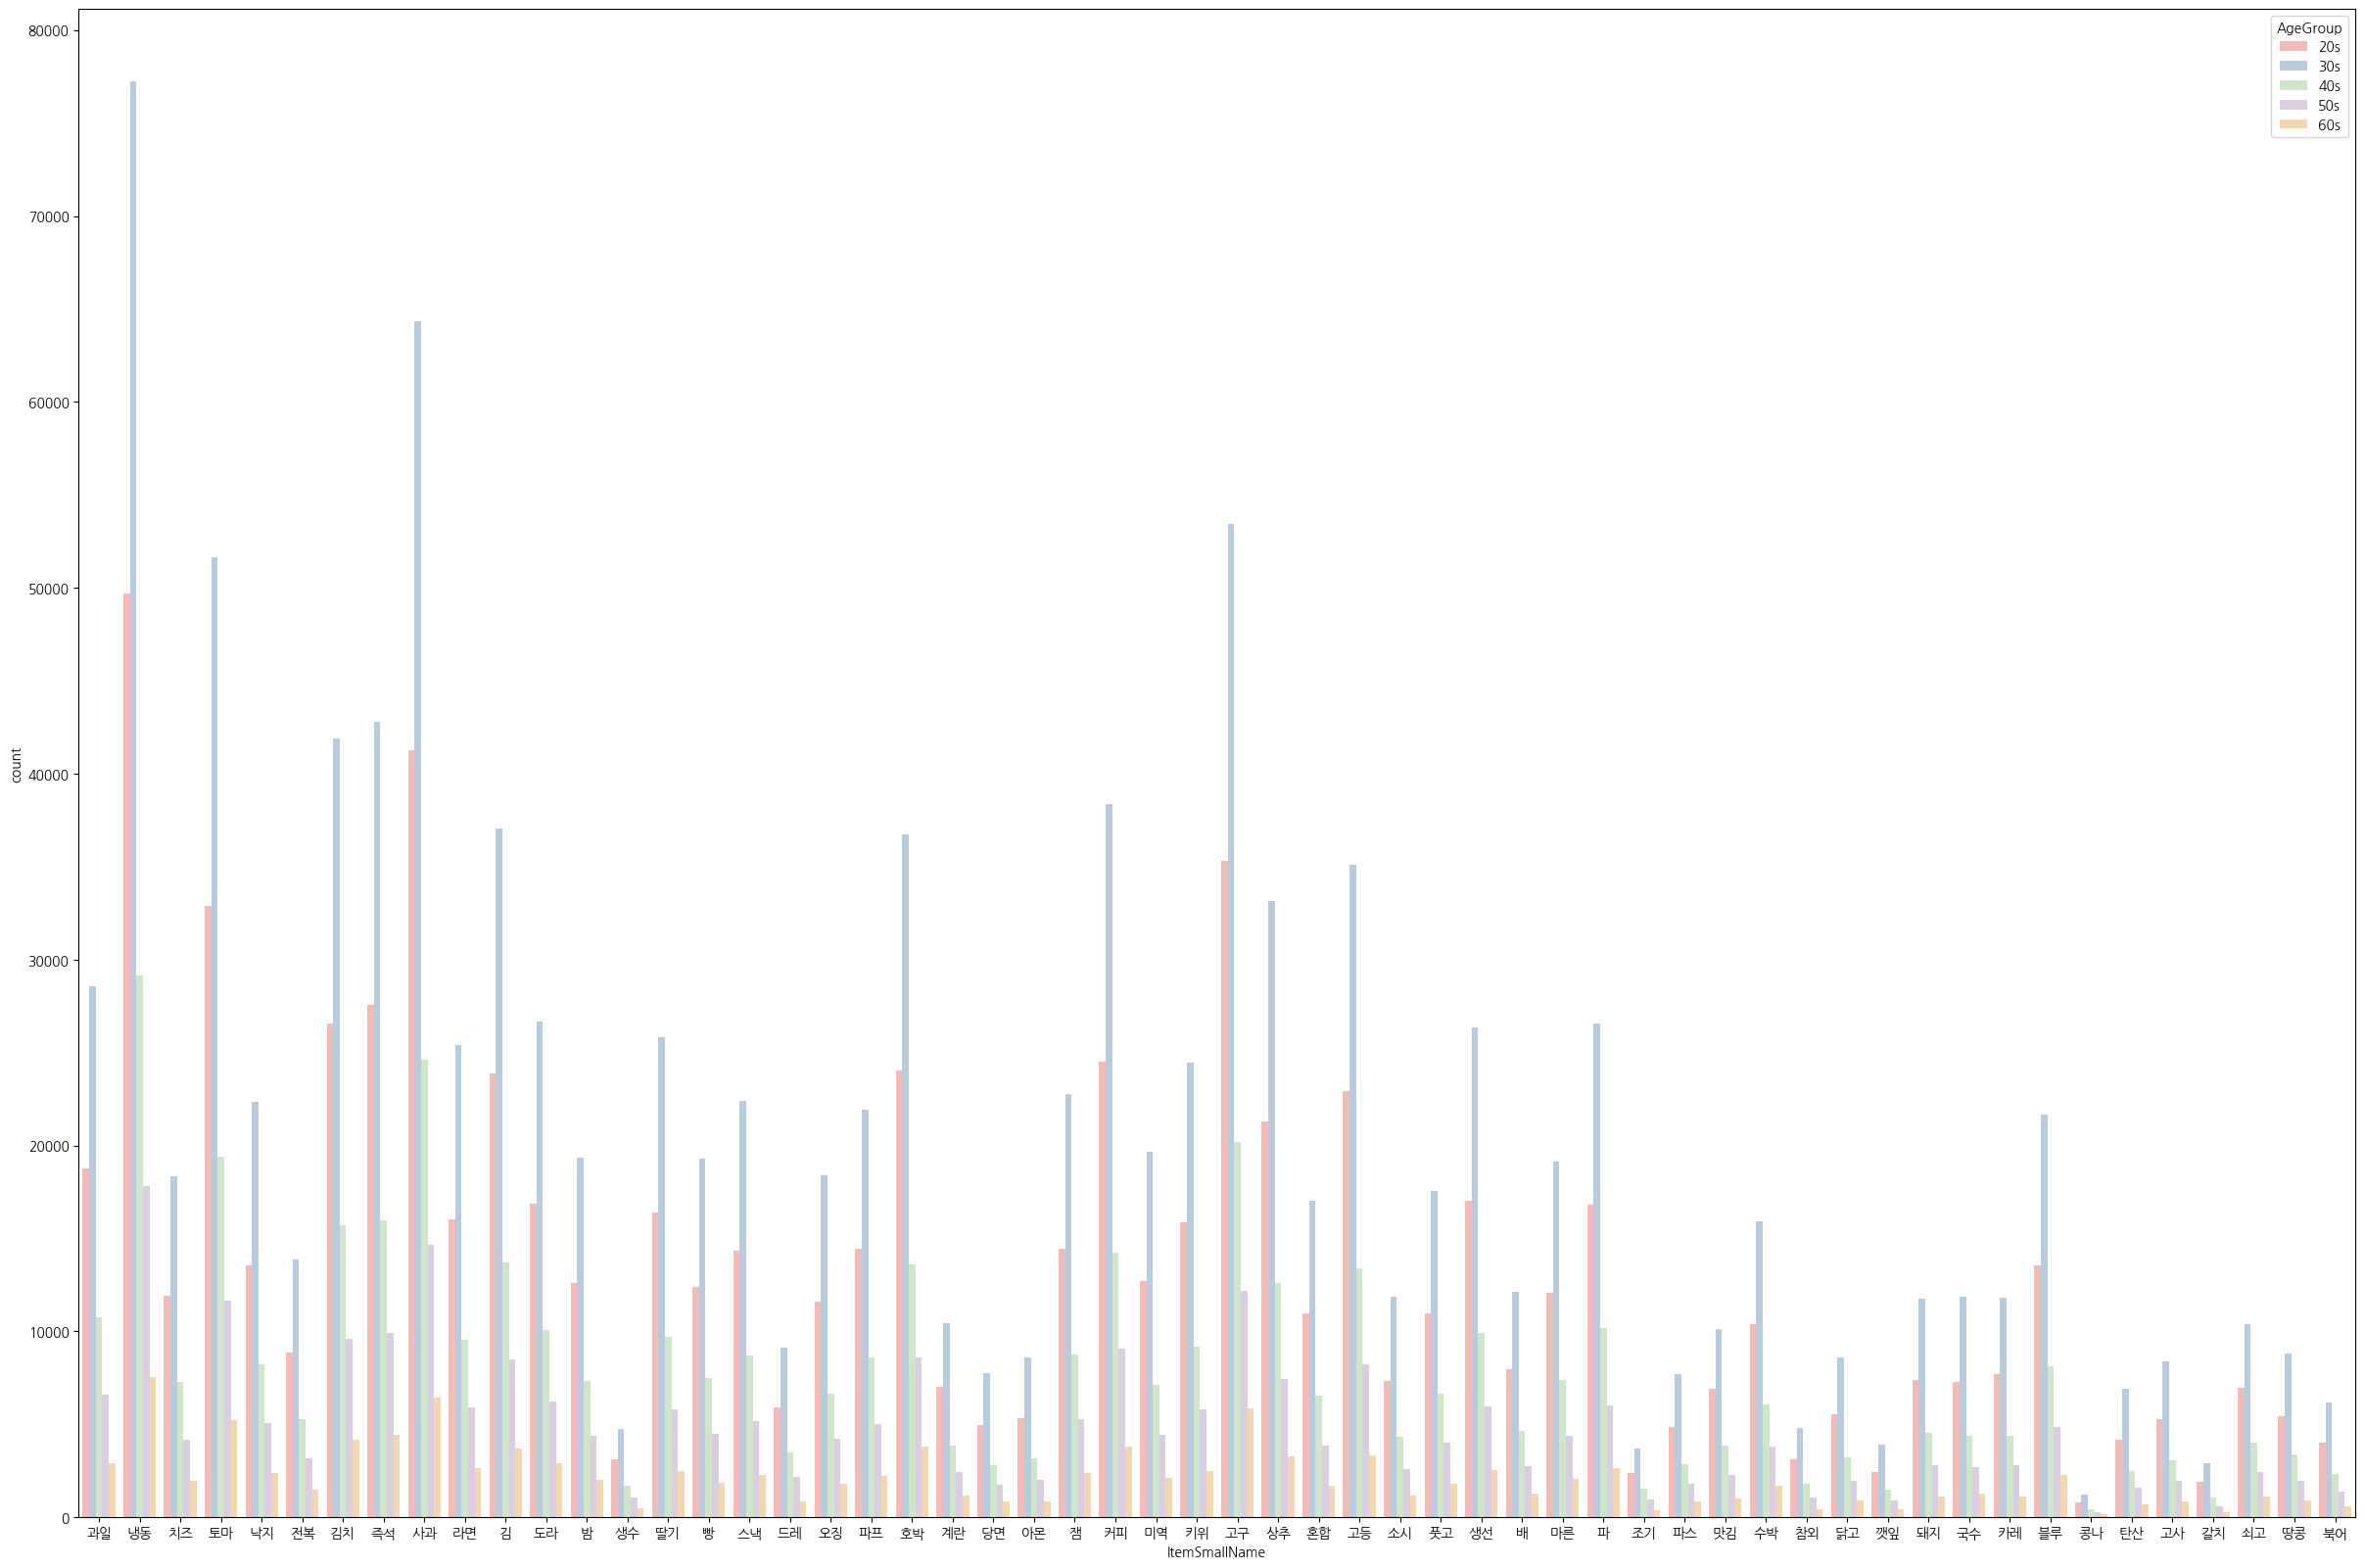

In [ ]:
plt.figure(figsize=(30, 20))
sns.countplot(data = data, x='ItemSmallName', hue = 'AgeGroup')

<Axes: xlabel='ItemSmallName', ylabel='count'>

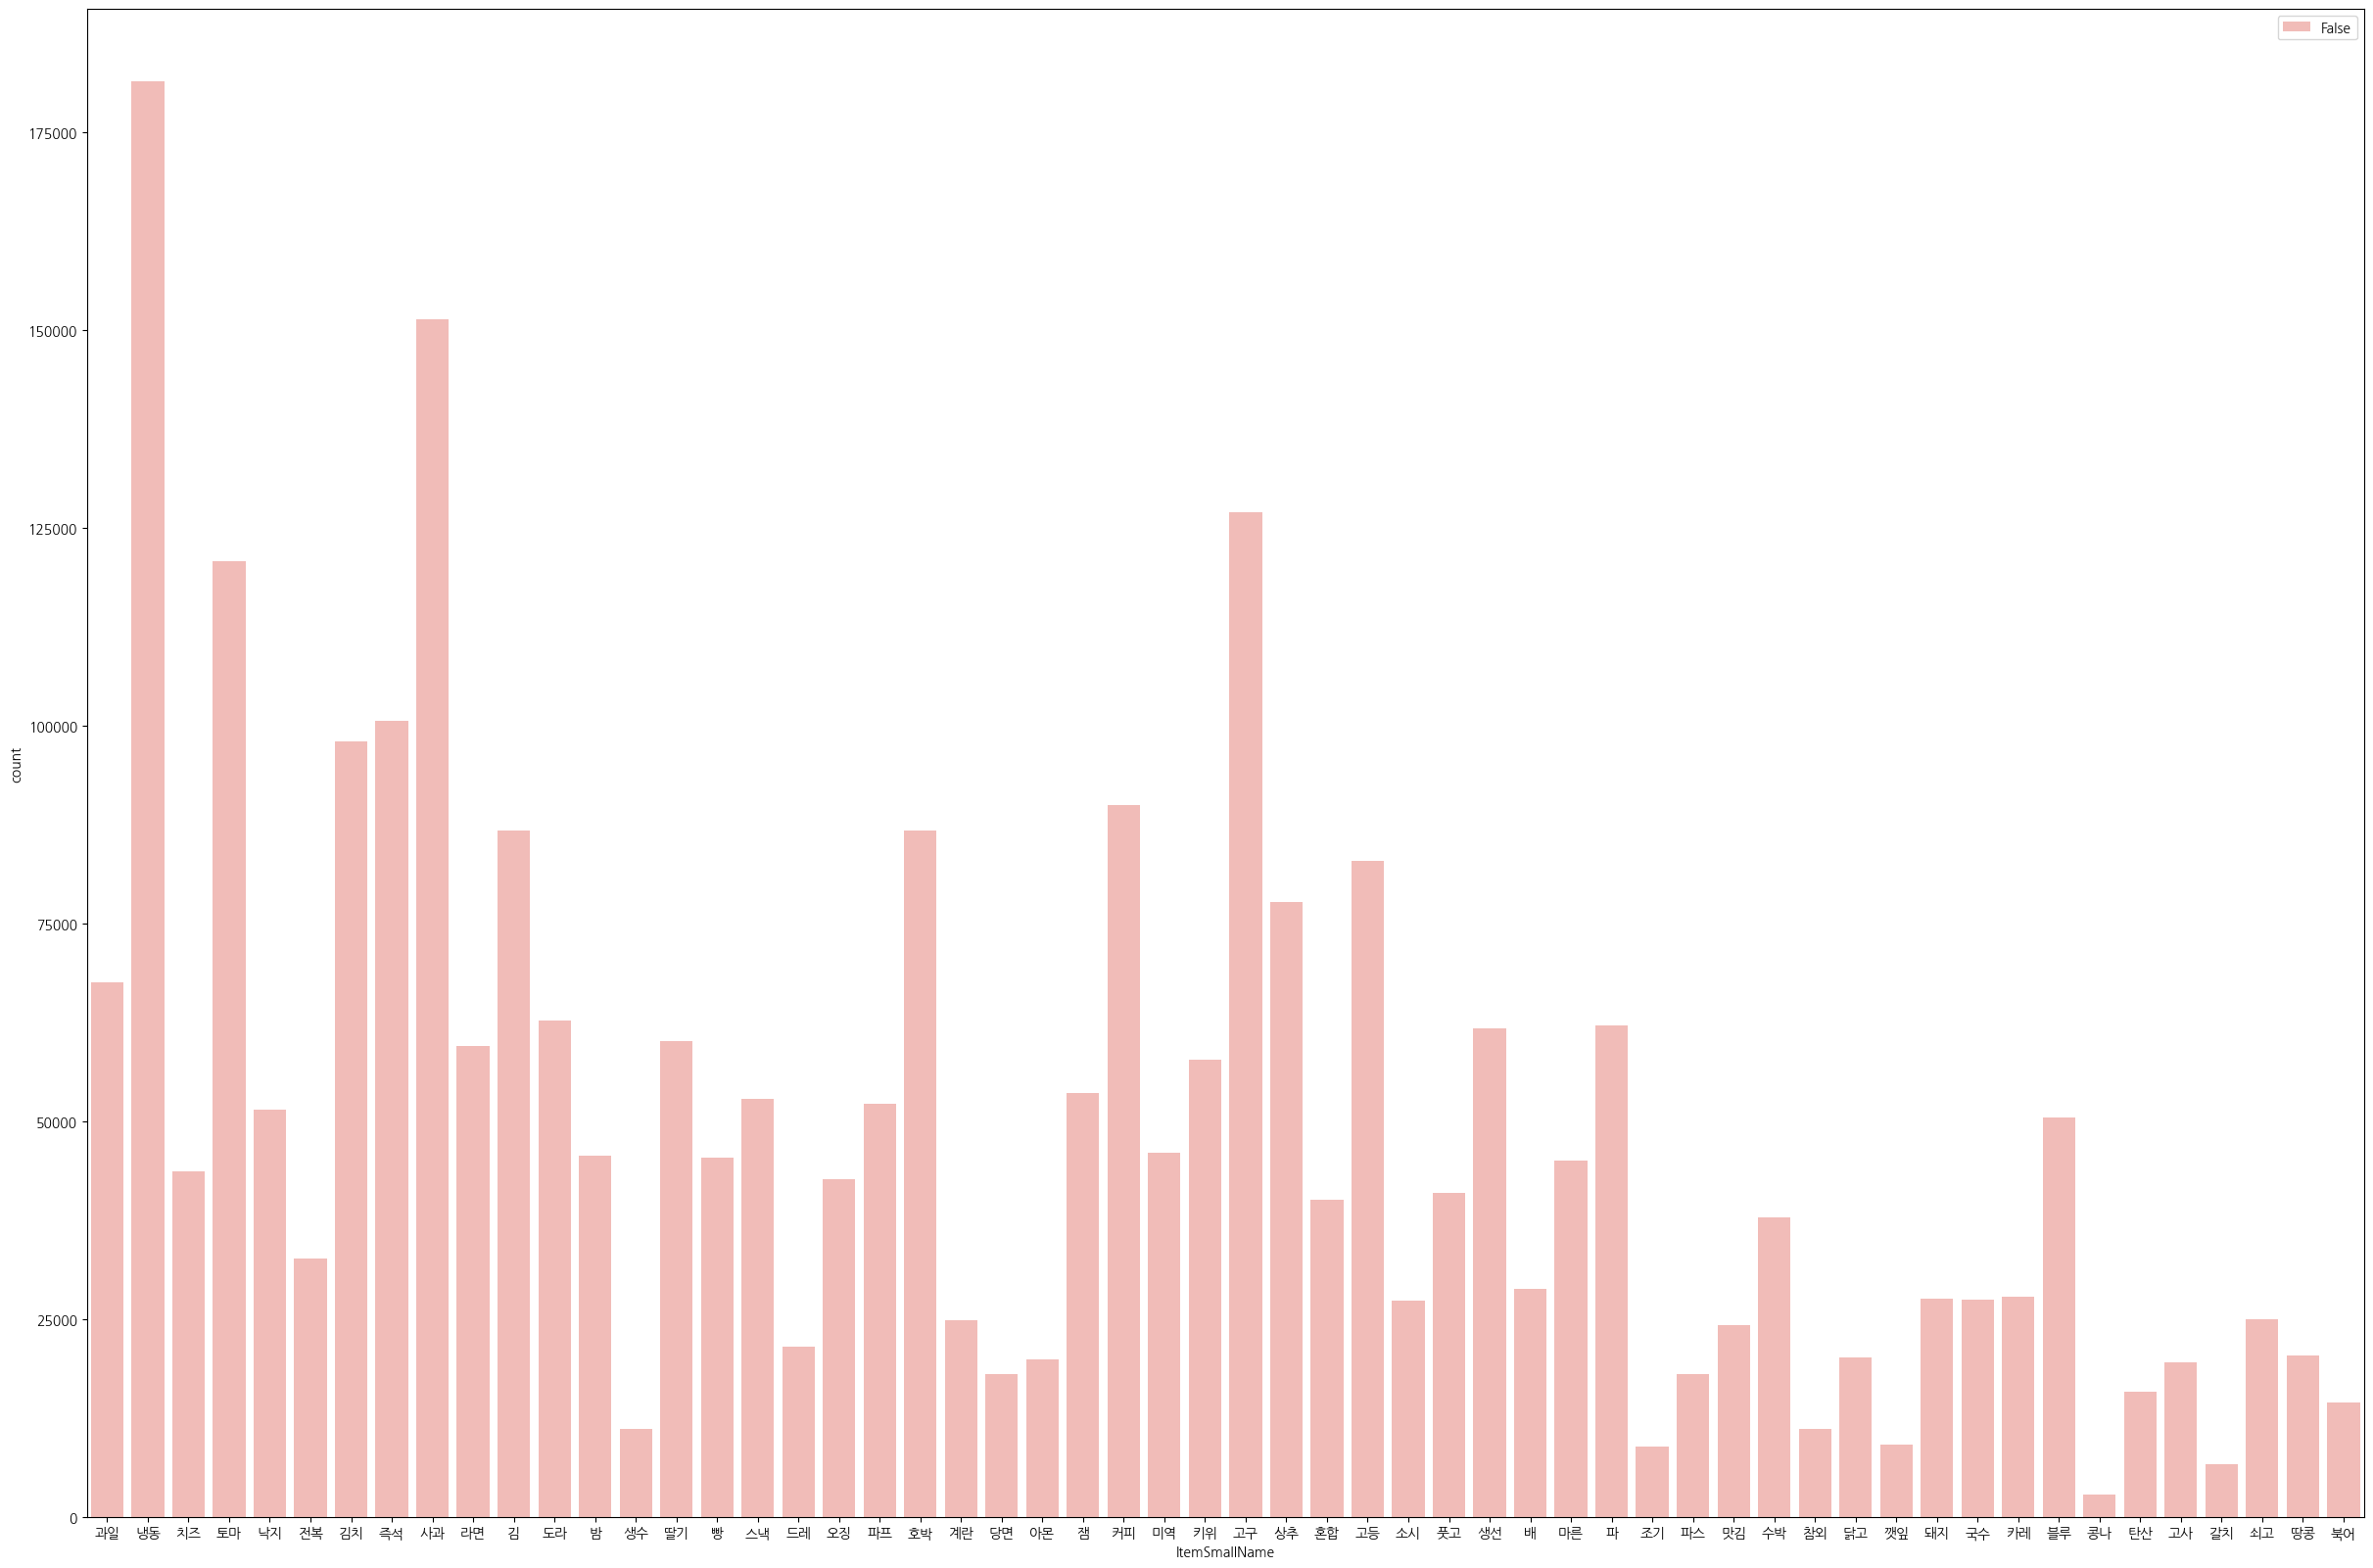

In [ ]:
plt.figure(figsize=(30, 20))
sns.countplot(data = data, x='ItemSmallName', hue = 'AgeGroup'=='[20s]')

<Axes: xlabel='ItemSmallName', ylabel='count'>

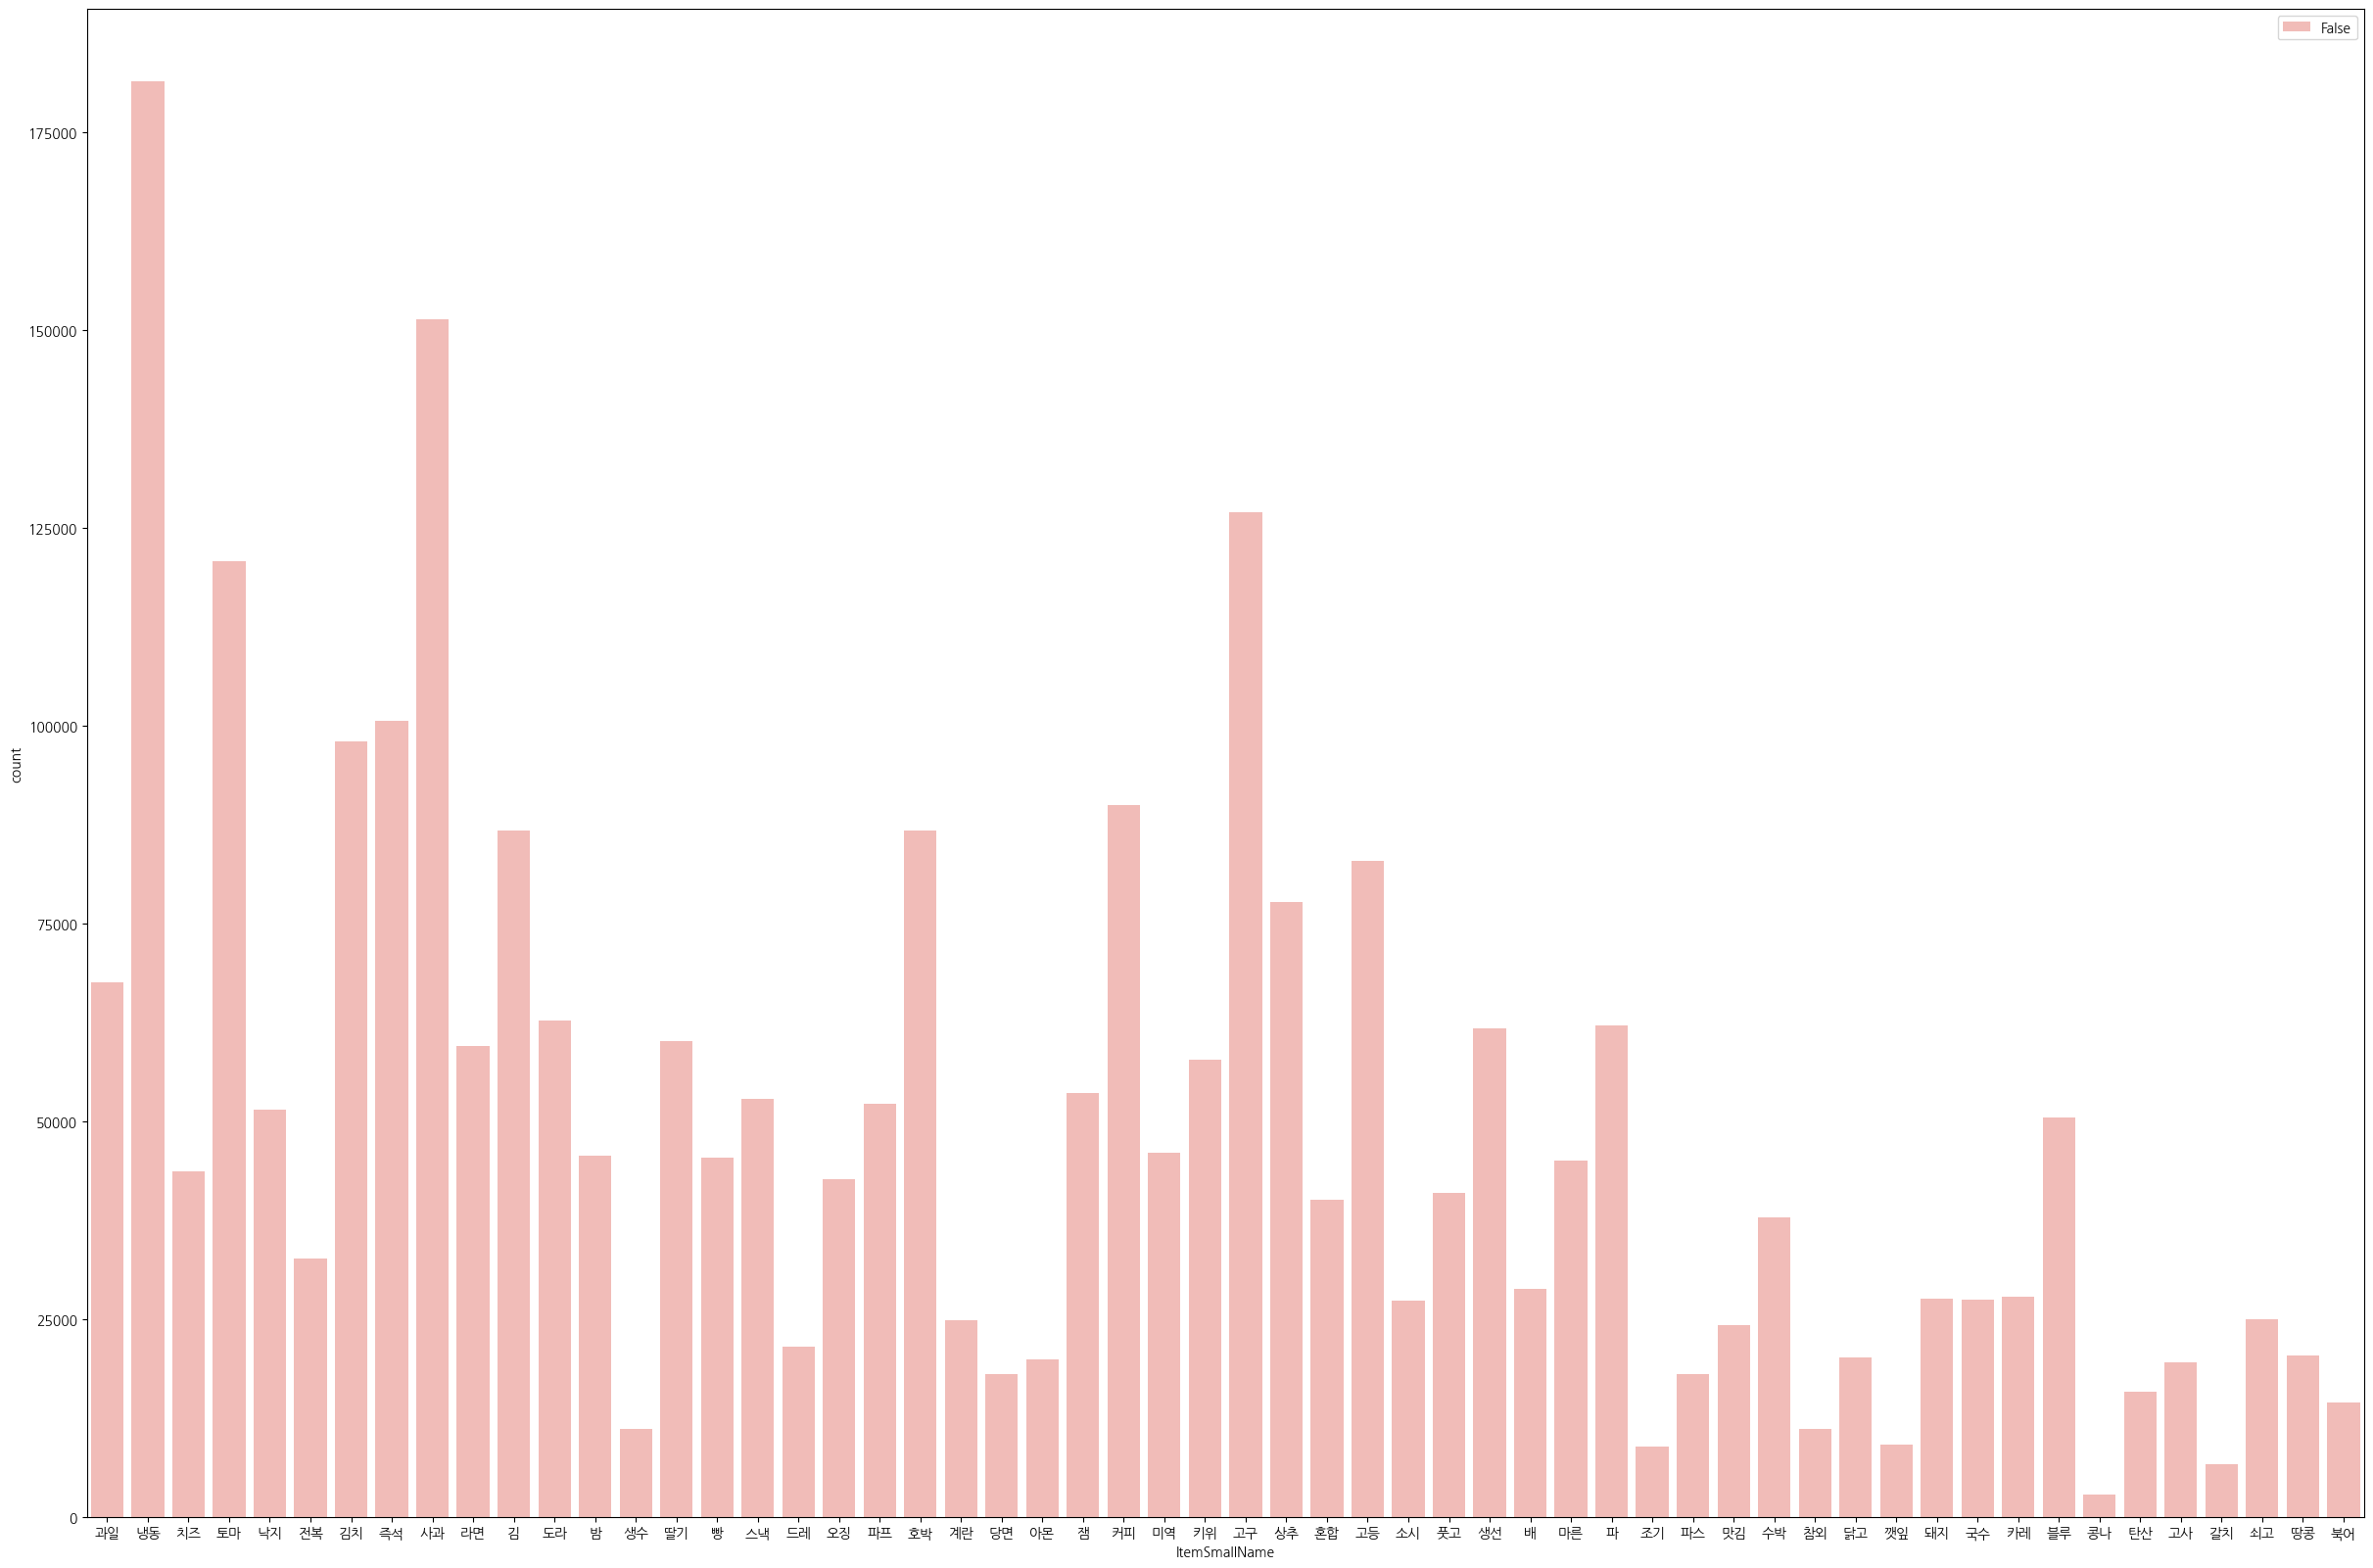

In [ ]:
plt.figure(figsize=(30, 20))
sns.countplot(data = data, x='ItemSmallName', hue = 'AgeGroup'=='[30s]')

<Axes: xlabel='ItemSmallName', ylabel='count'>

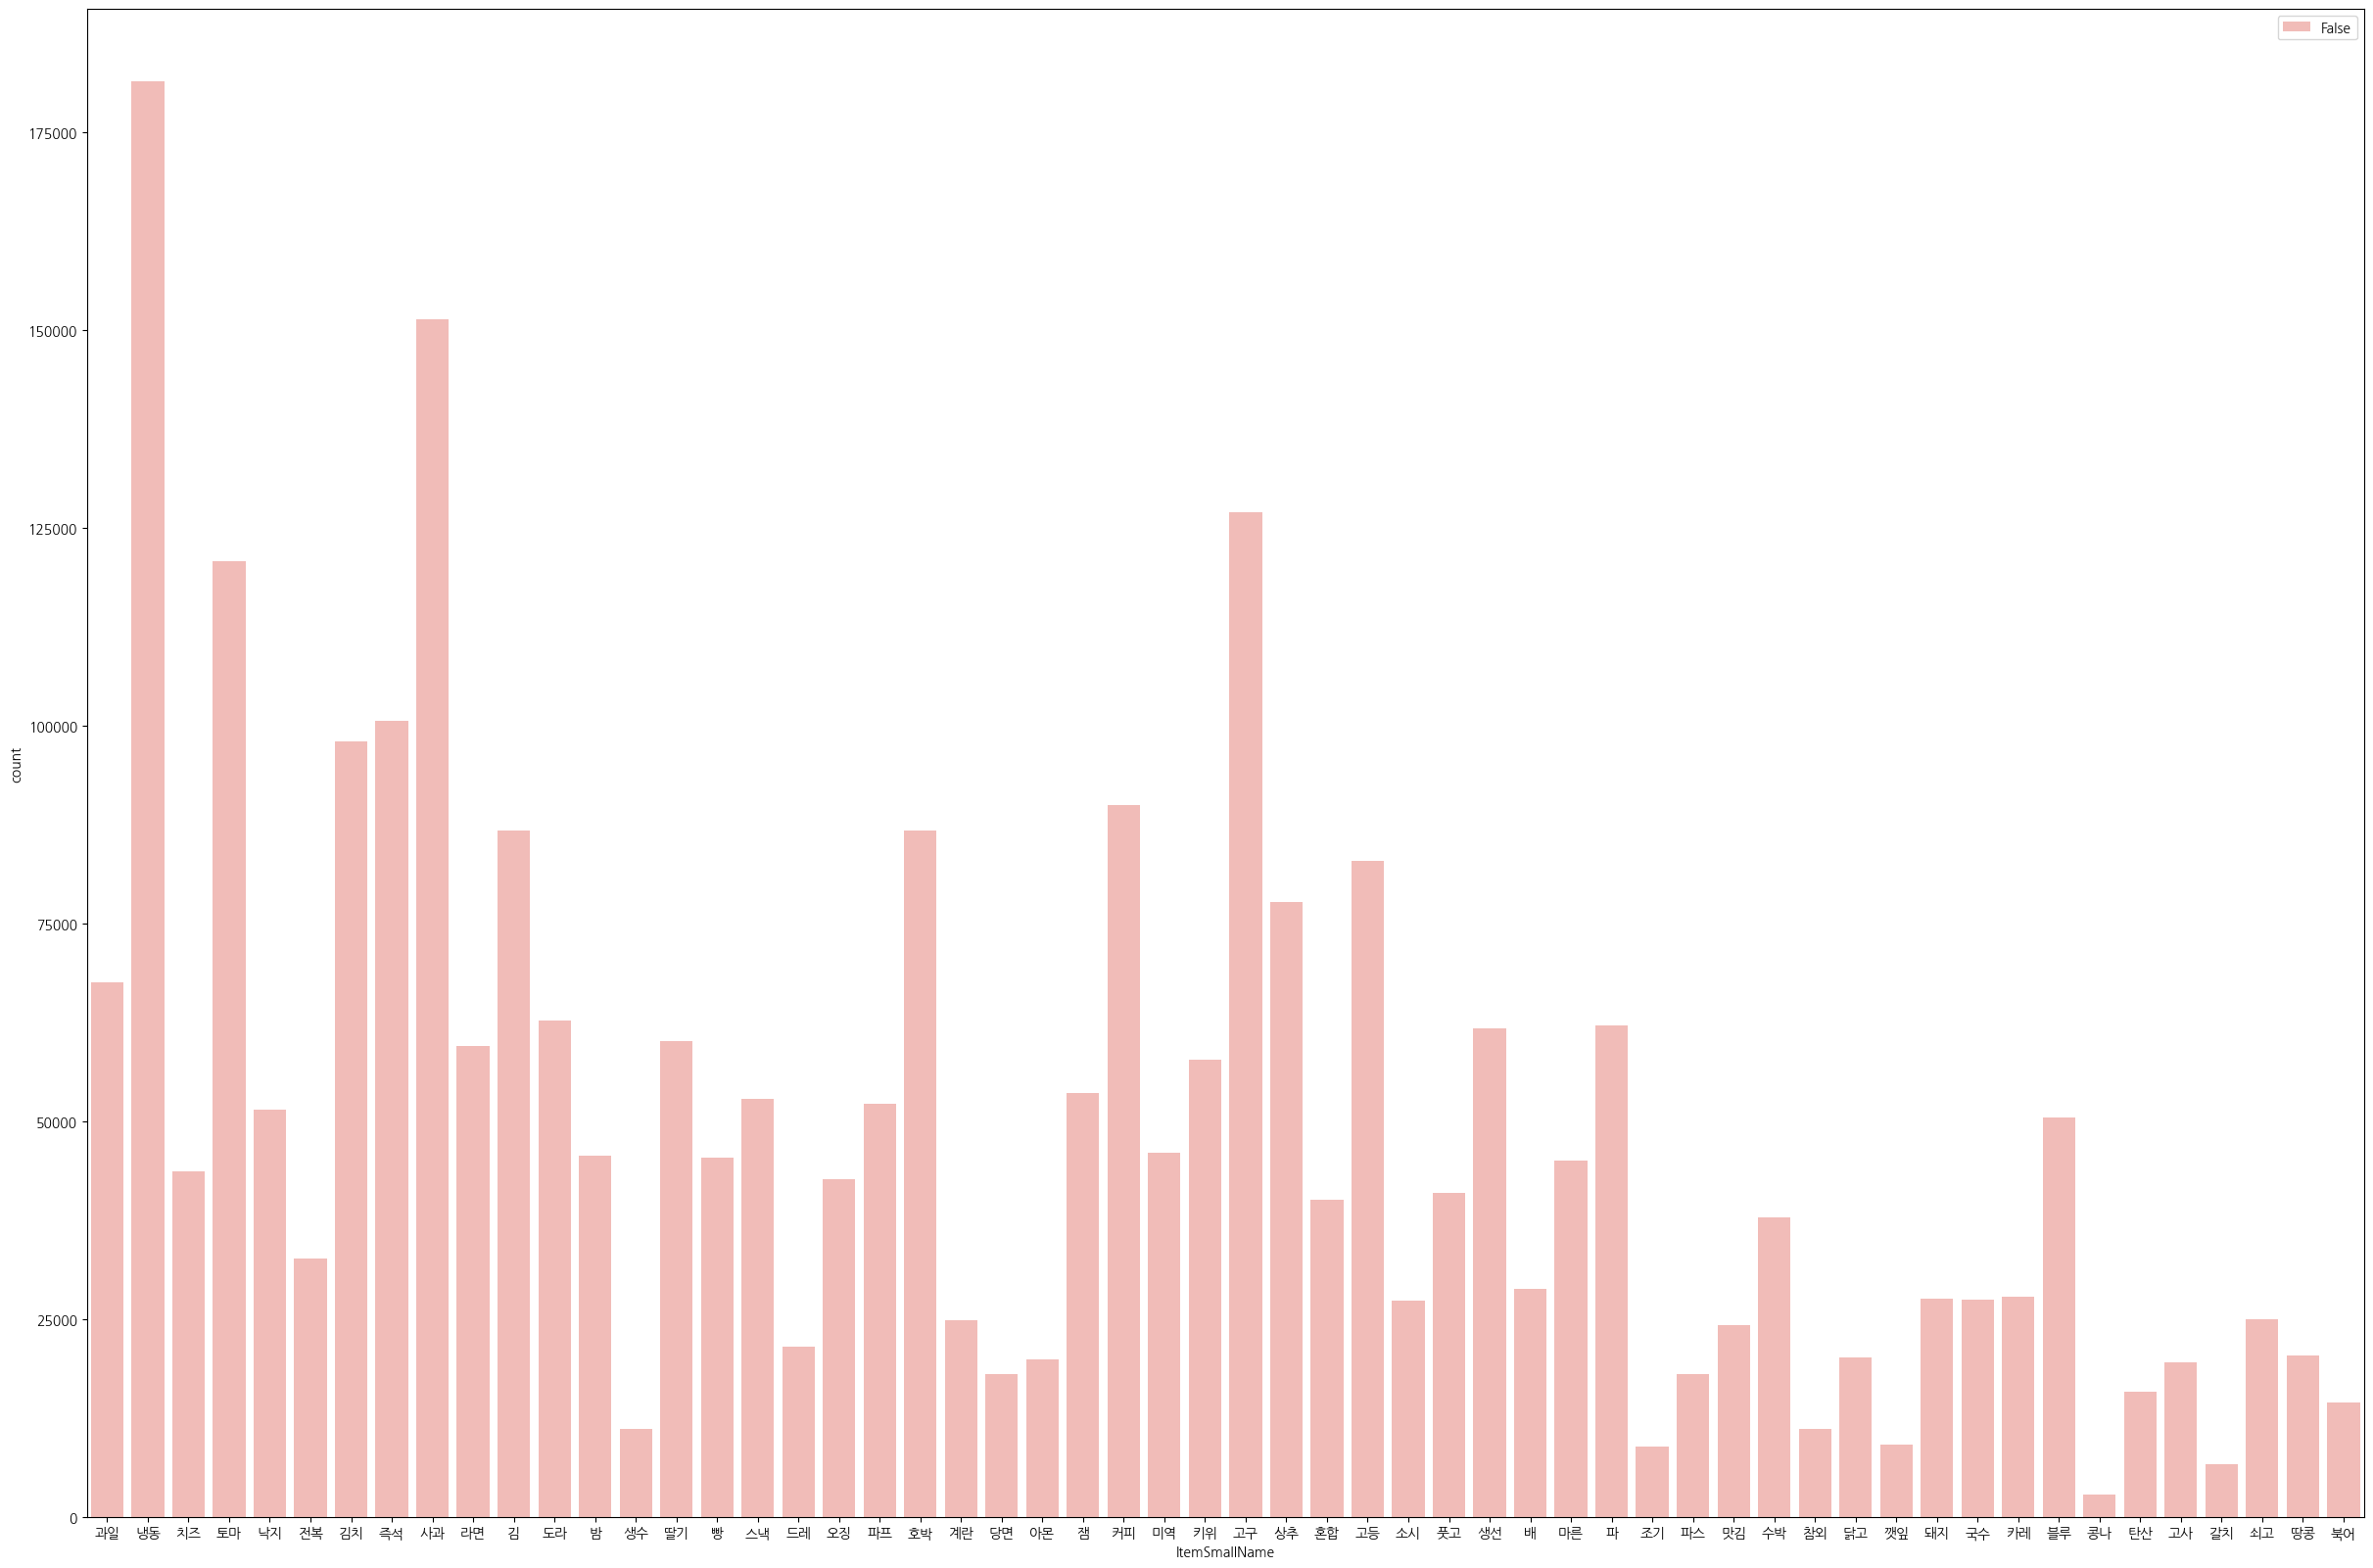

In [ ]:
plt.figure(figsize=(30, 20))
sns.countplot(data = data, x='ItemSmallName', hue = 'AgeGroup'=='[40s]')

<Axes: xlabel='ItemSmallName', ylabel='count'>

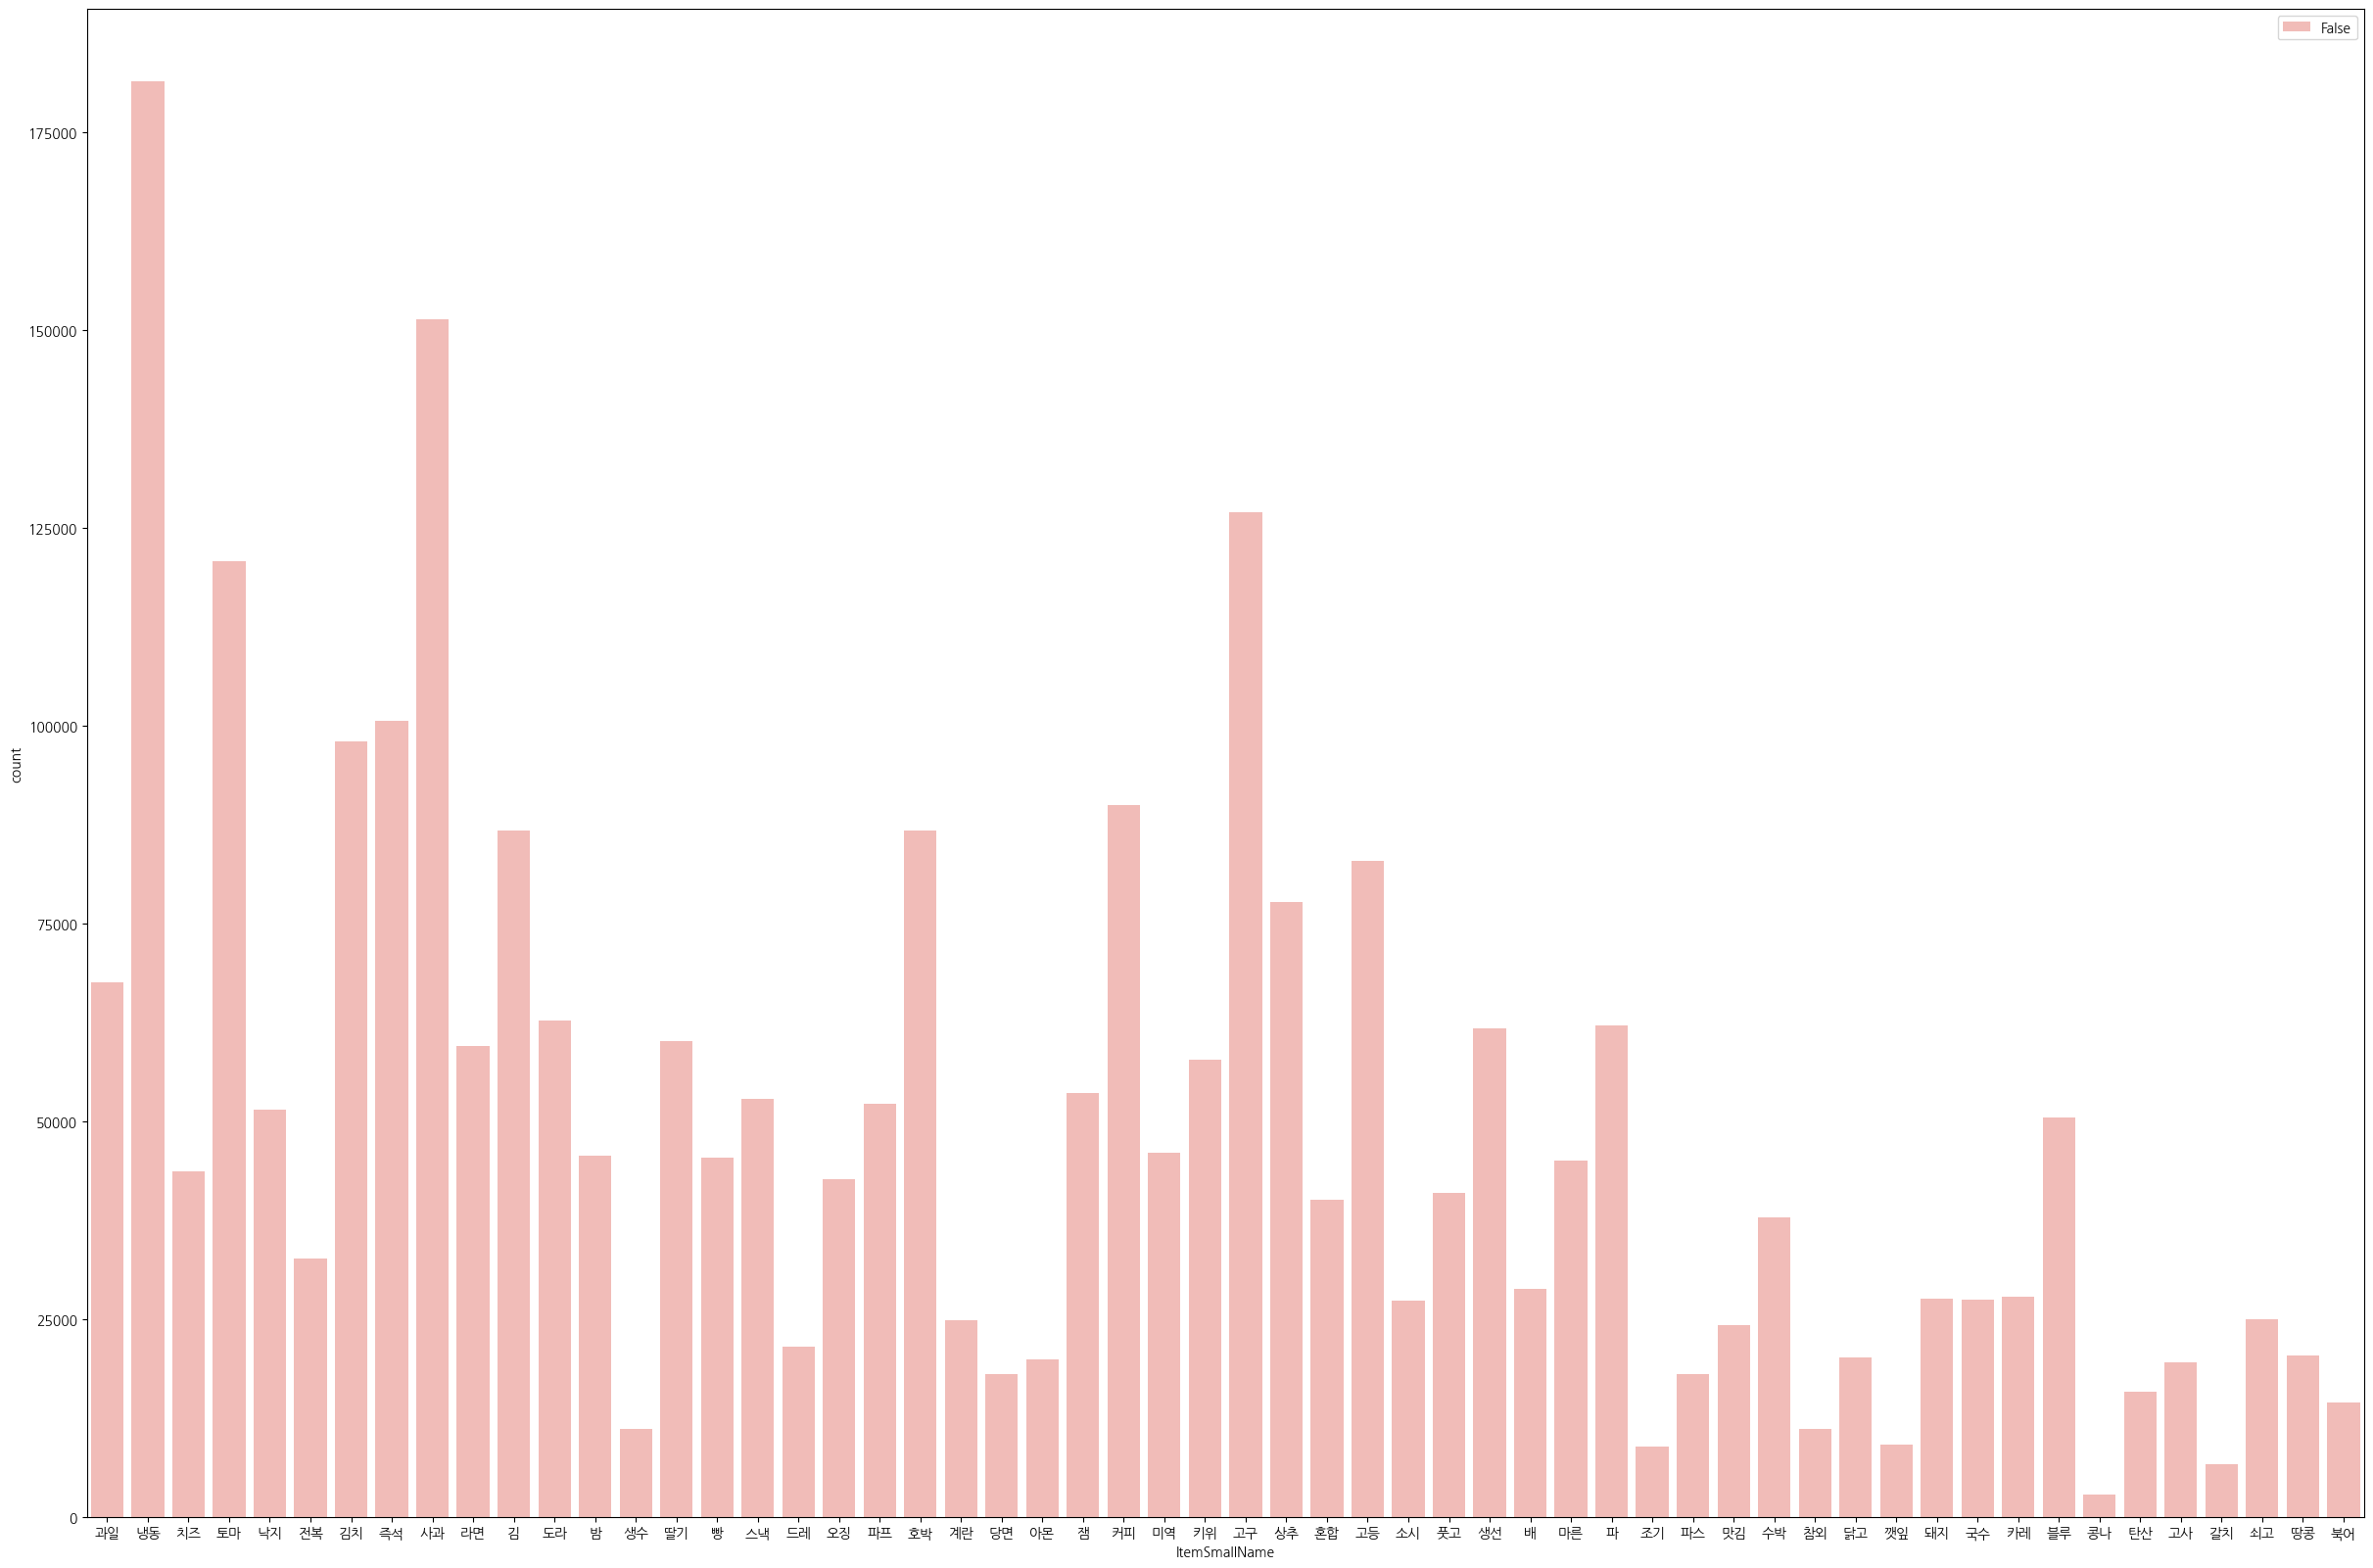

In [ ]:
plt.figure(figsize=(30, 20))
sns.countplot(data = data, x='ItemSmallName', hue = 'AgeGroup'=='[50s]')

<Axes: xlabel='ItemSmallName', ylabel='count'>

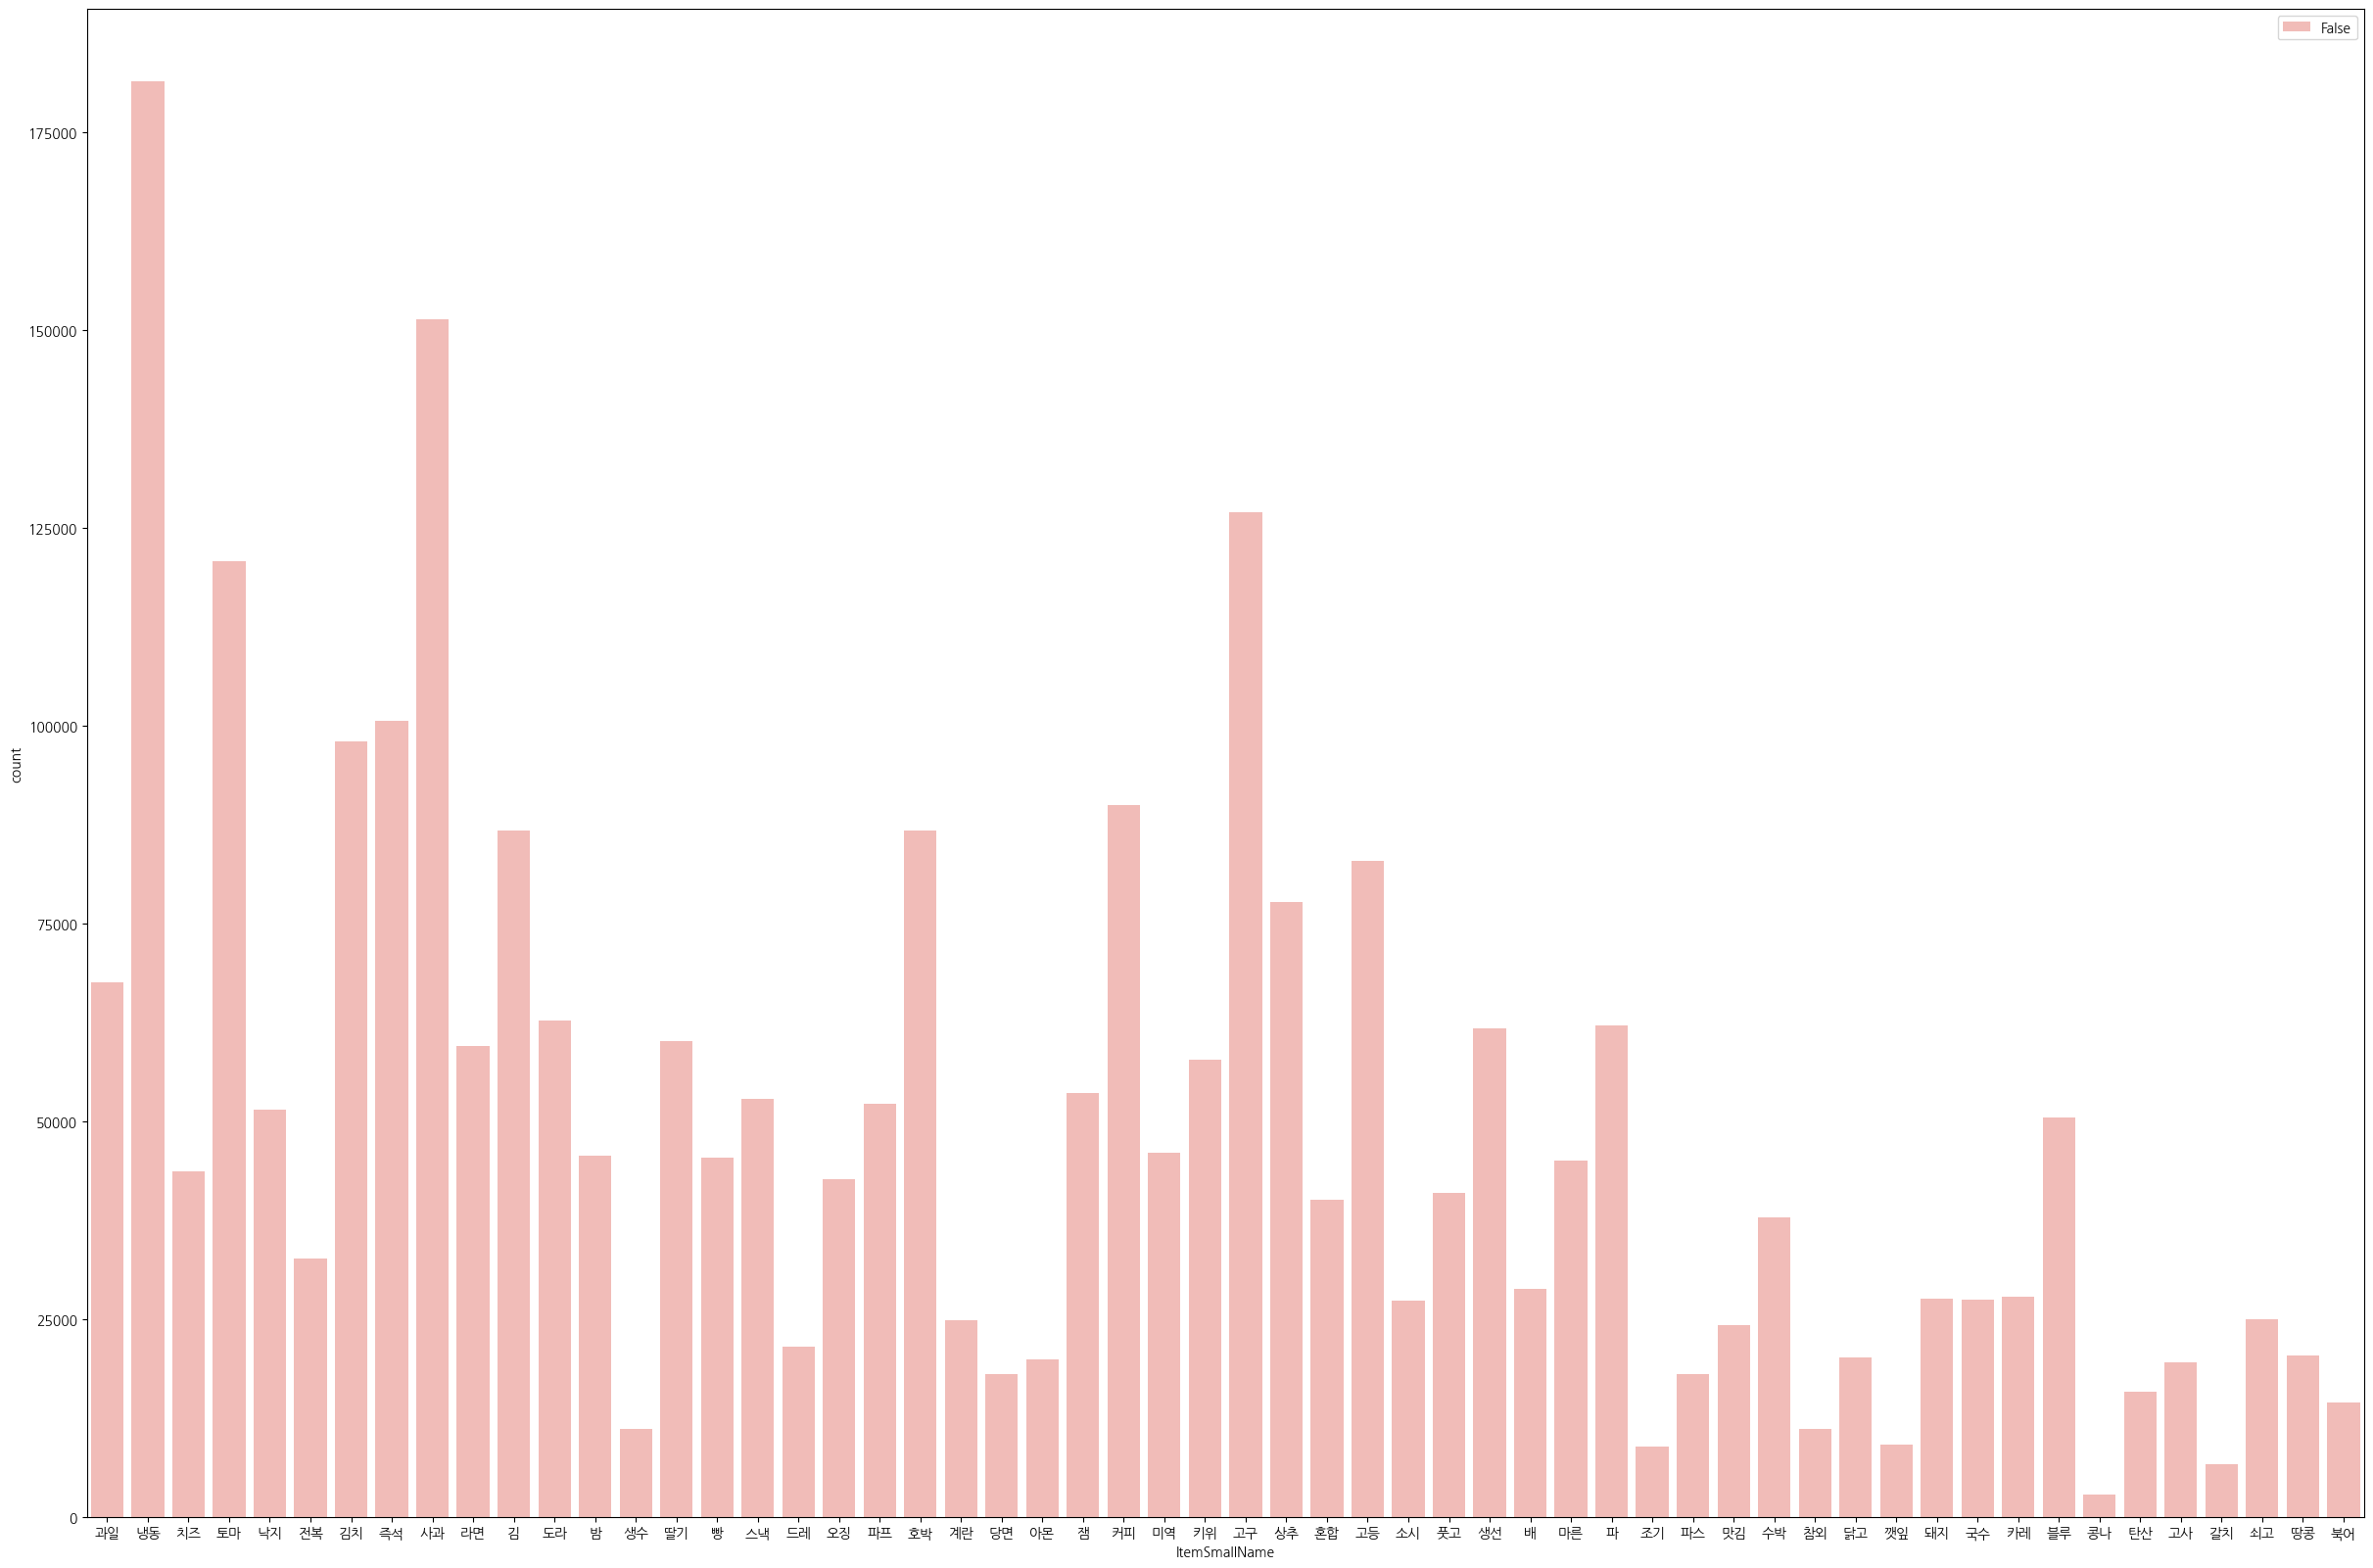

In [ ]:
plt.figure(figsize=(30, 20))
sns.countplot(data = data, x='ItemSmallName', hue = 'FamilyCount'=='[0]')

<Axes: xlabel='ItemSmallName', ylabel='count'>

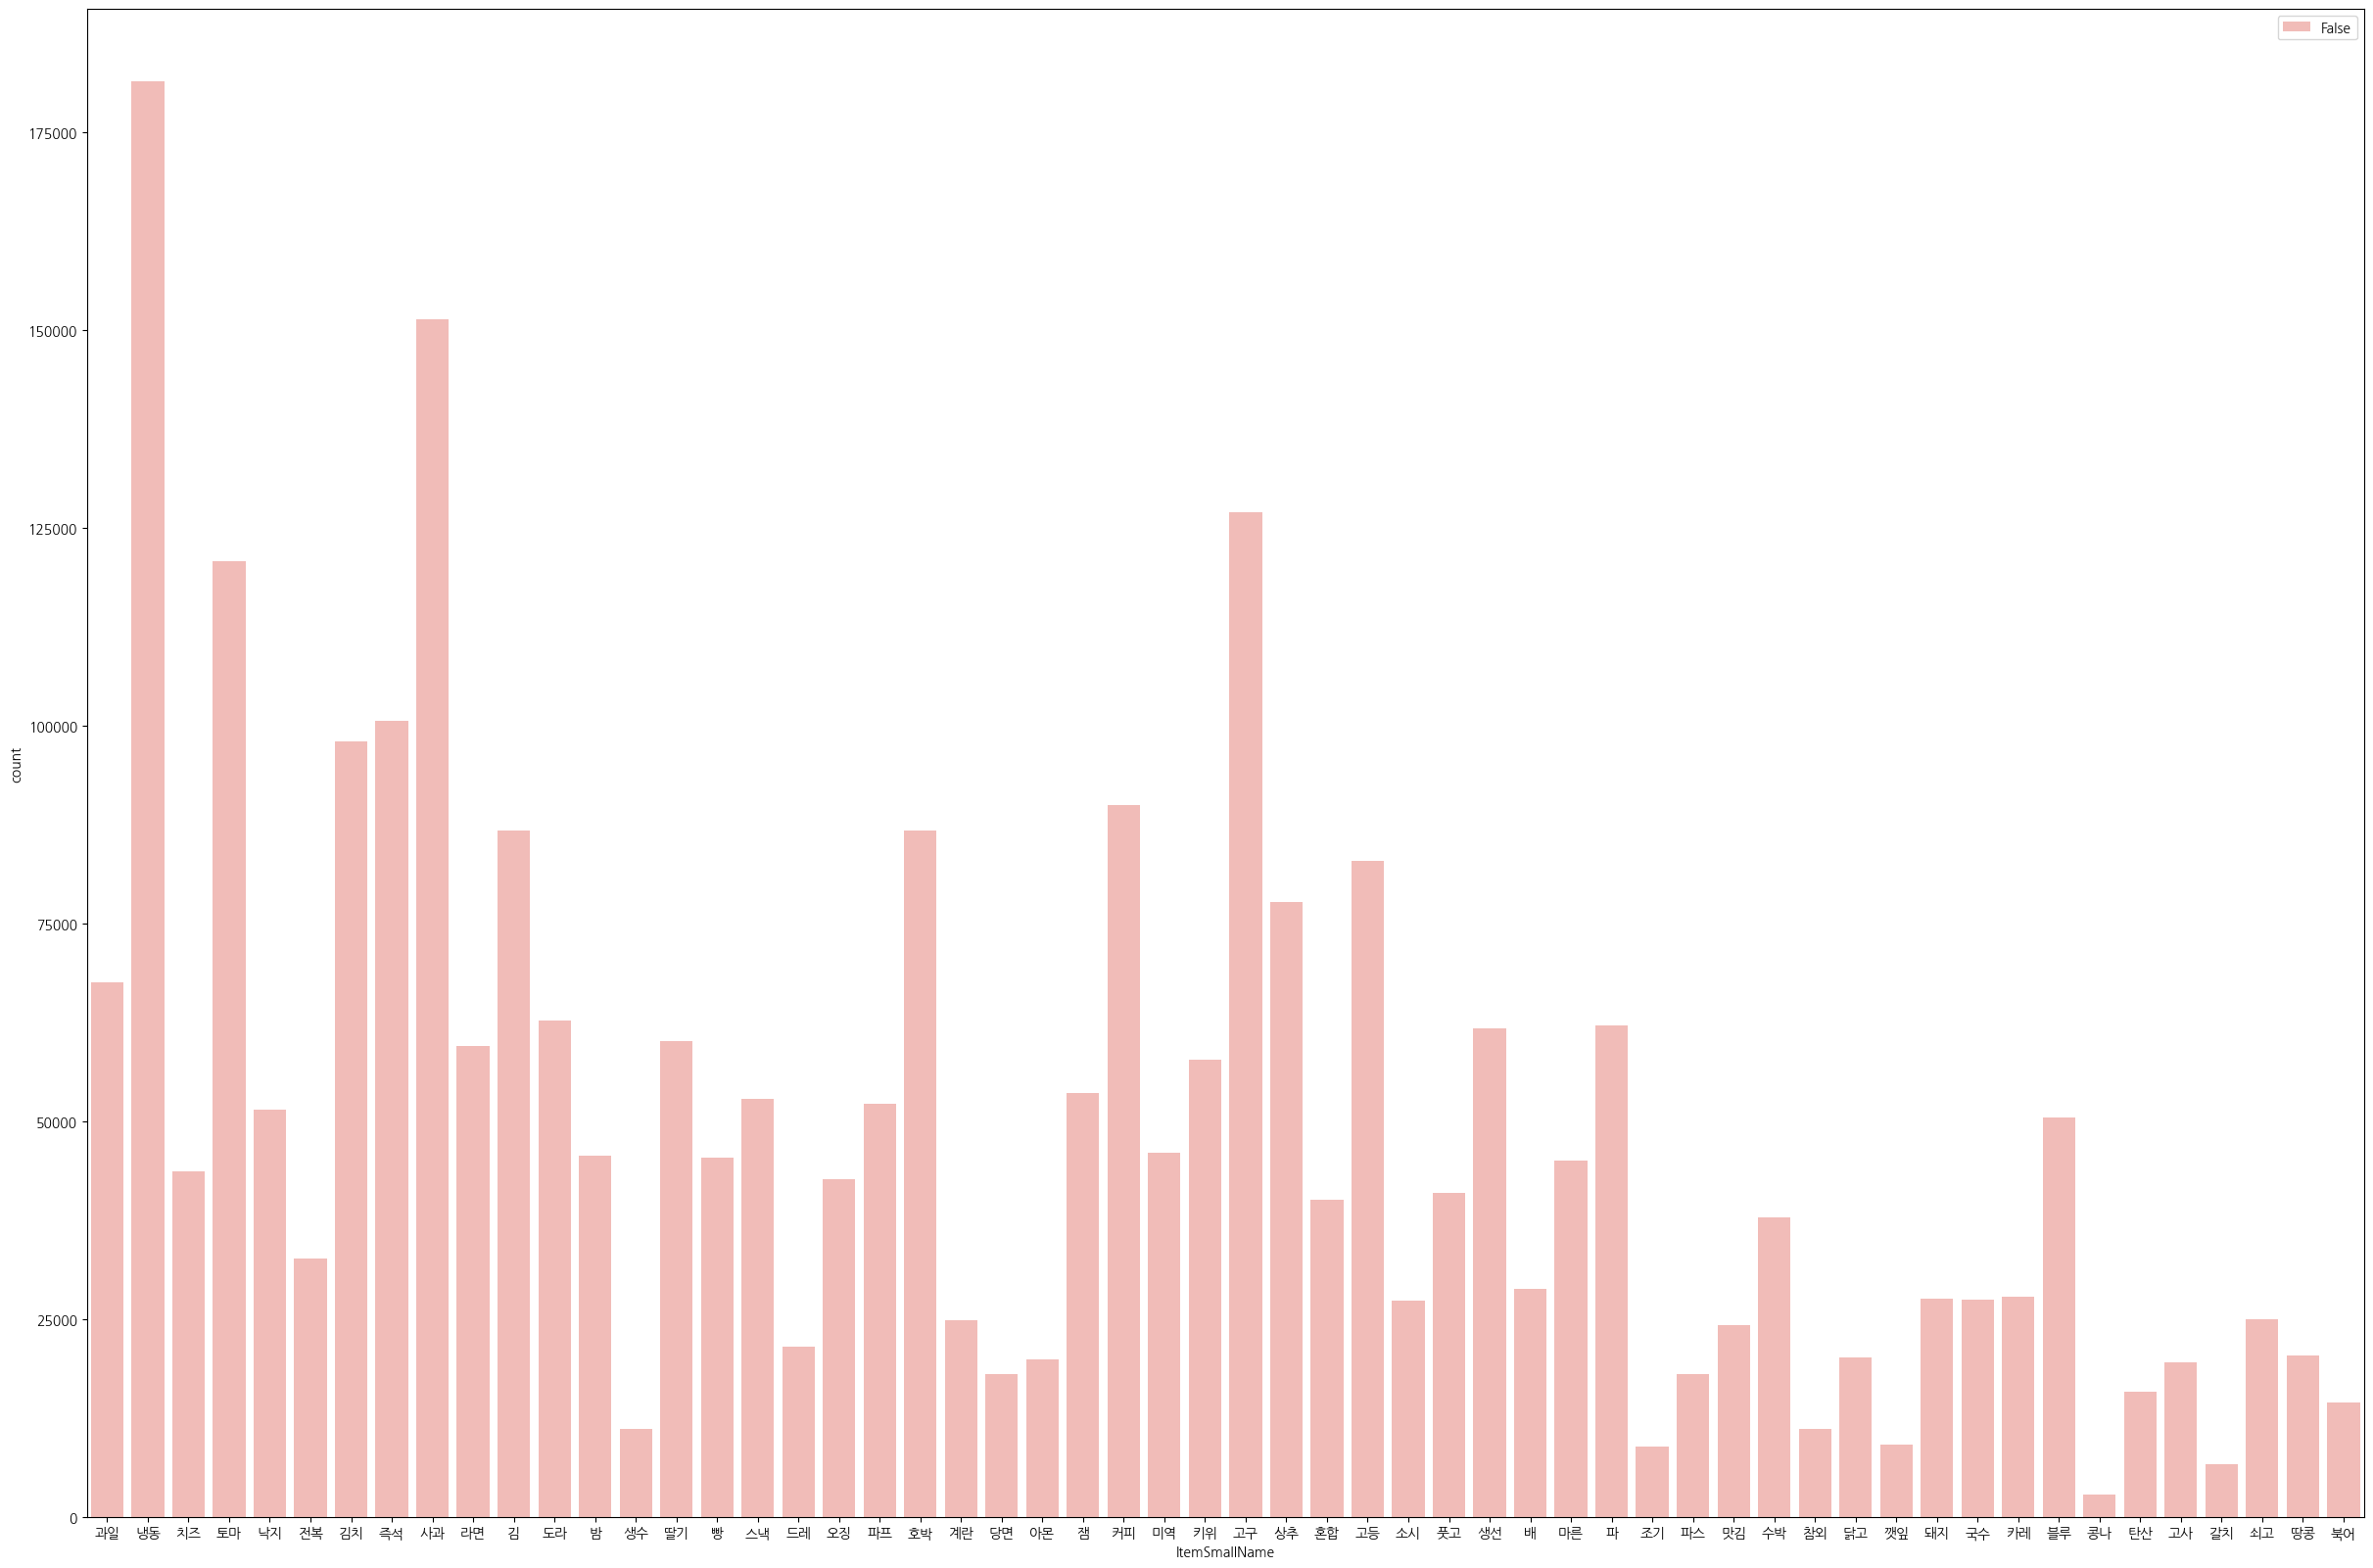

In [ ]:
plt.figure(figsize=(30, 20))
sns.countplot(data = data, x='ItemSmallName', hue = 'FamilyCount'=='[3]')

<Axes: xlabel='ItemSmallName', ylabel='count'>

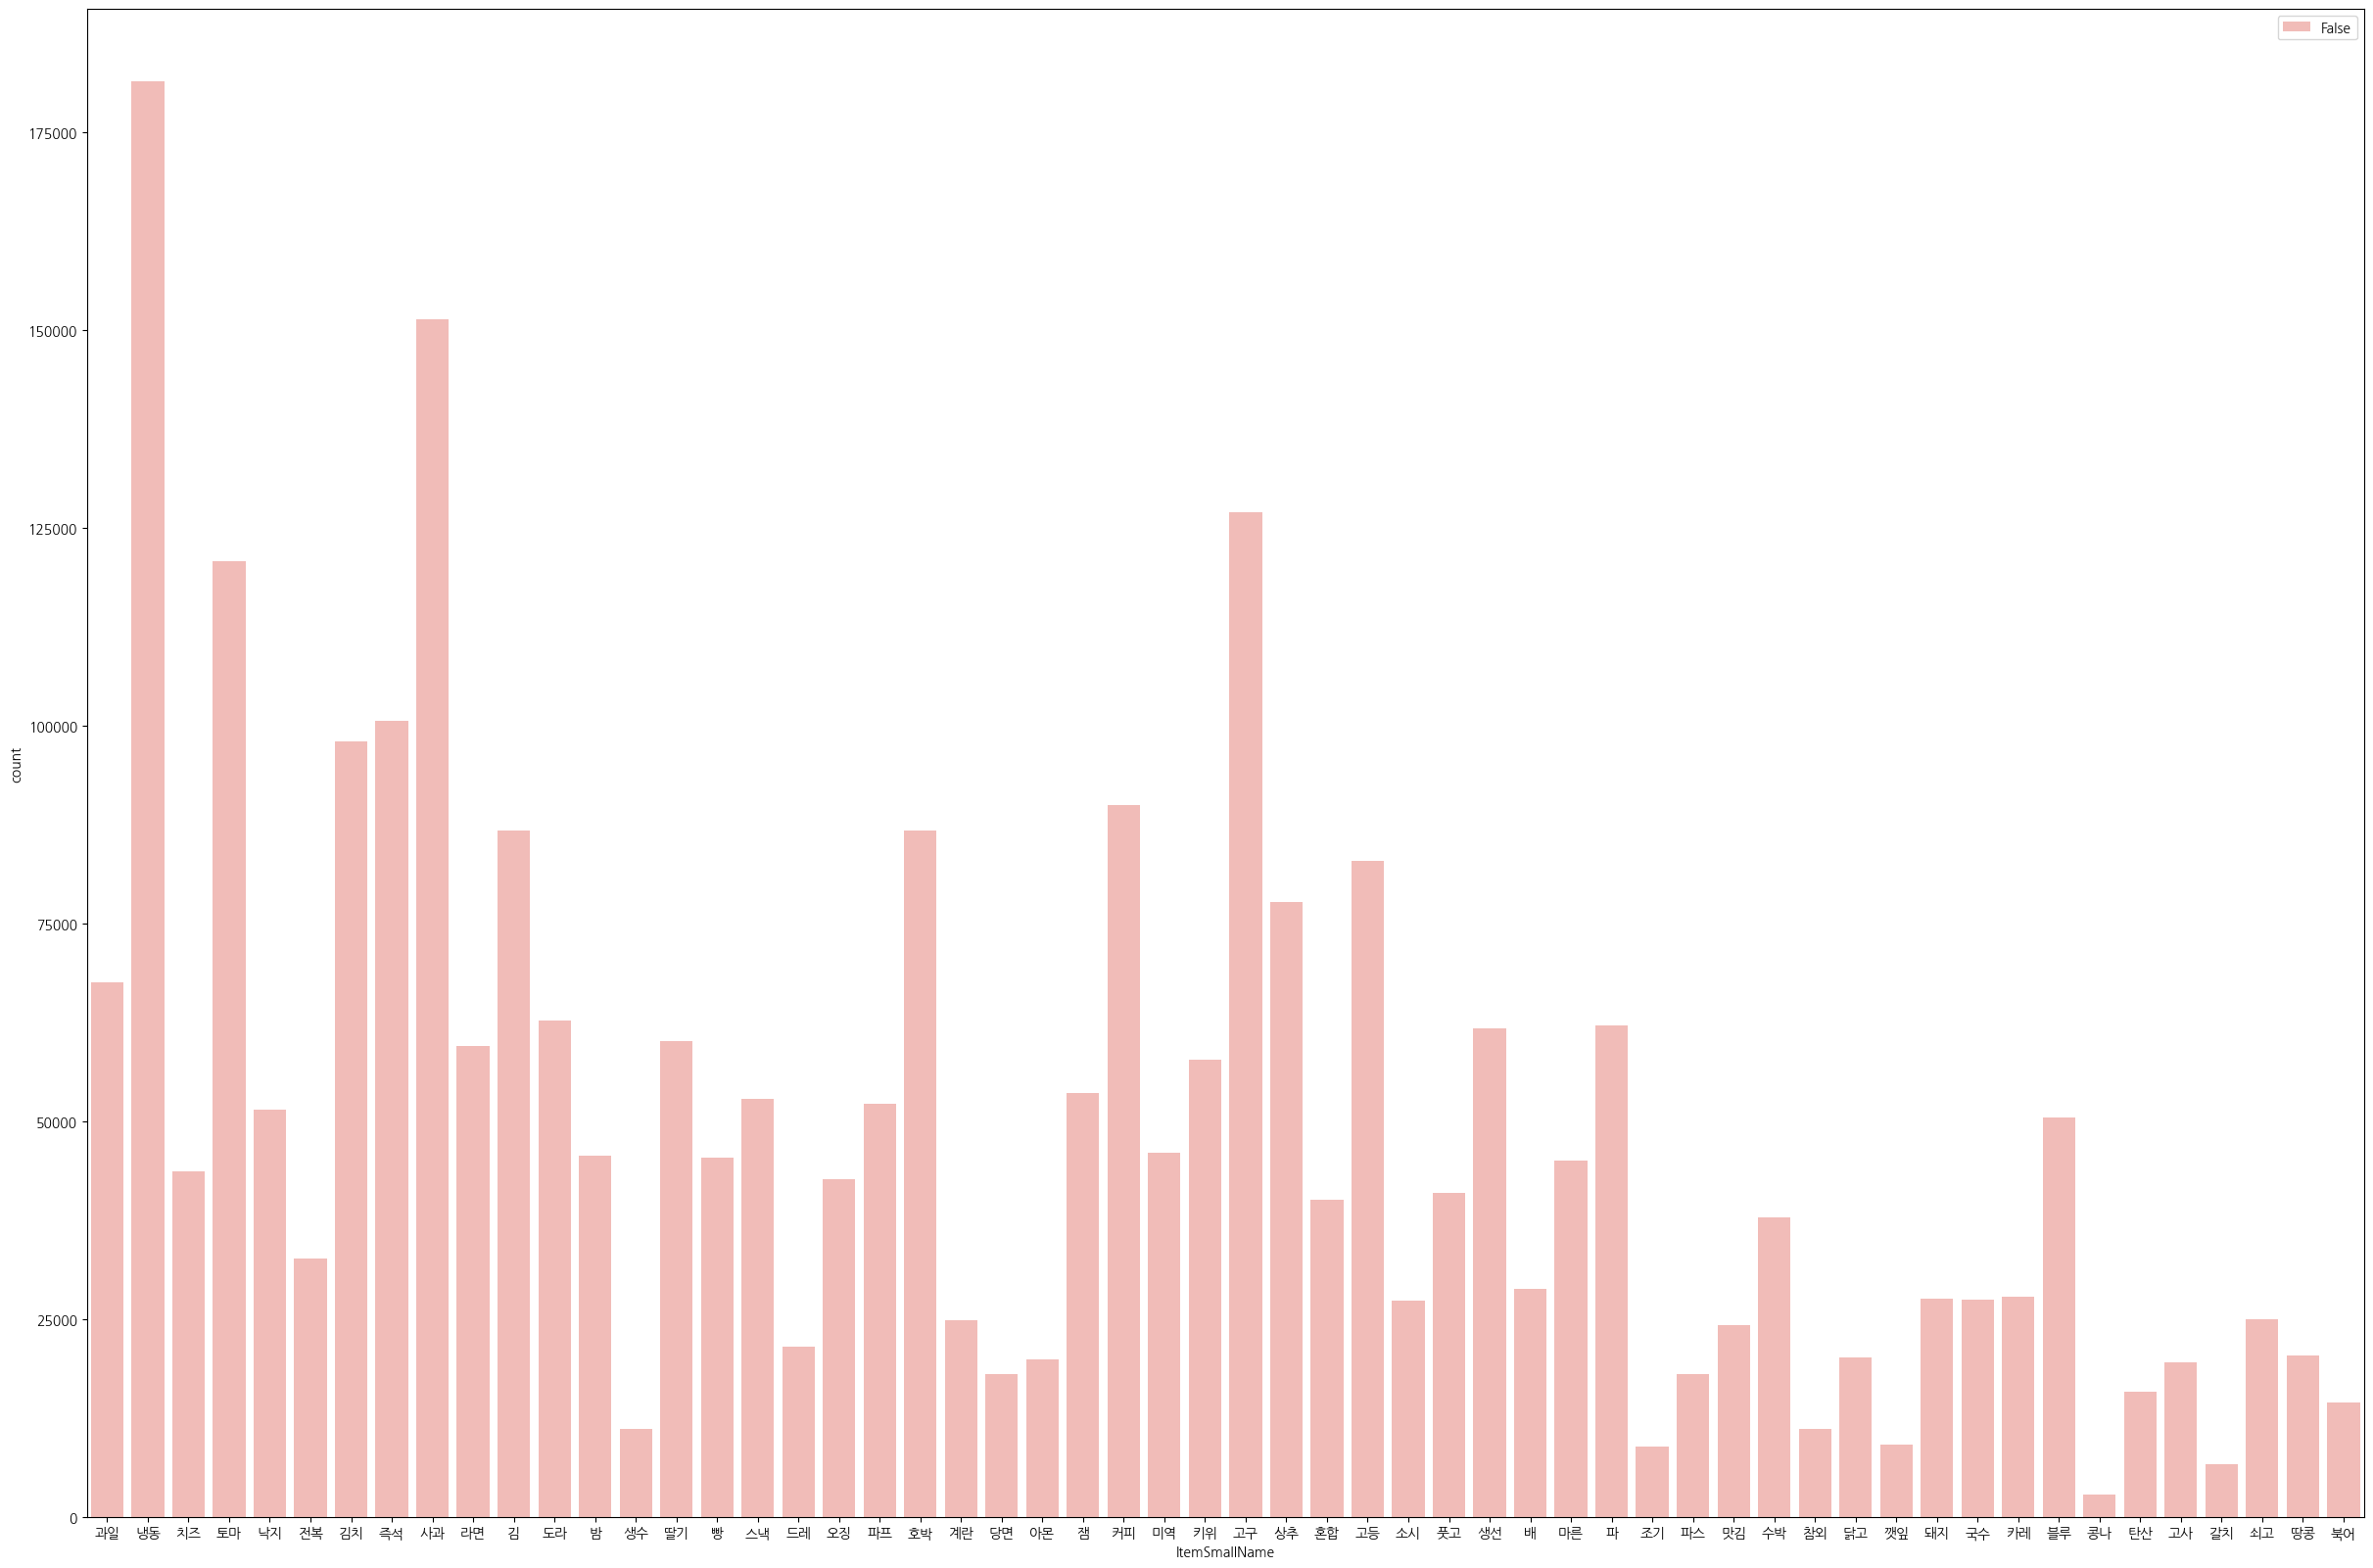

In [ ]:
plt.figure(figsize=(30, 20))
sns.countplot(data = data, x='ItemSmallName', hue = 'AgeGroup'==['여성'])

<Axes: xlabel='ItemSmallName', ylabel='count'>

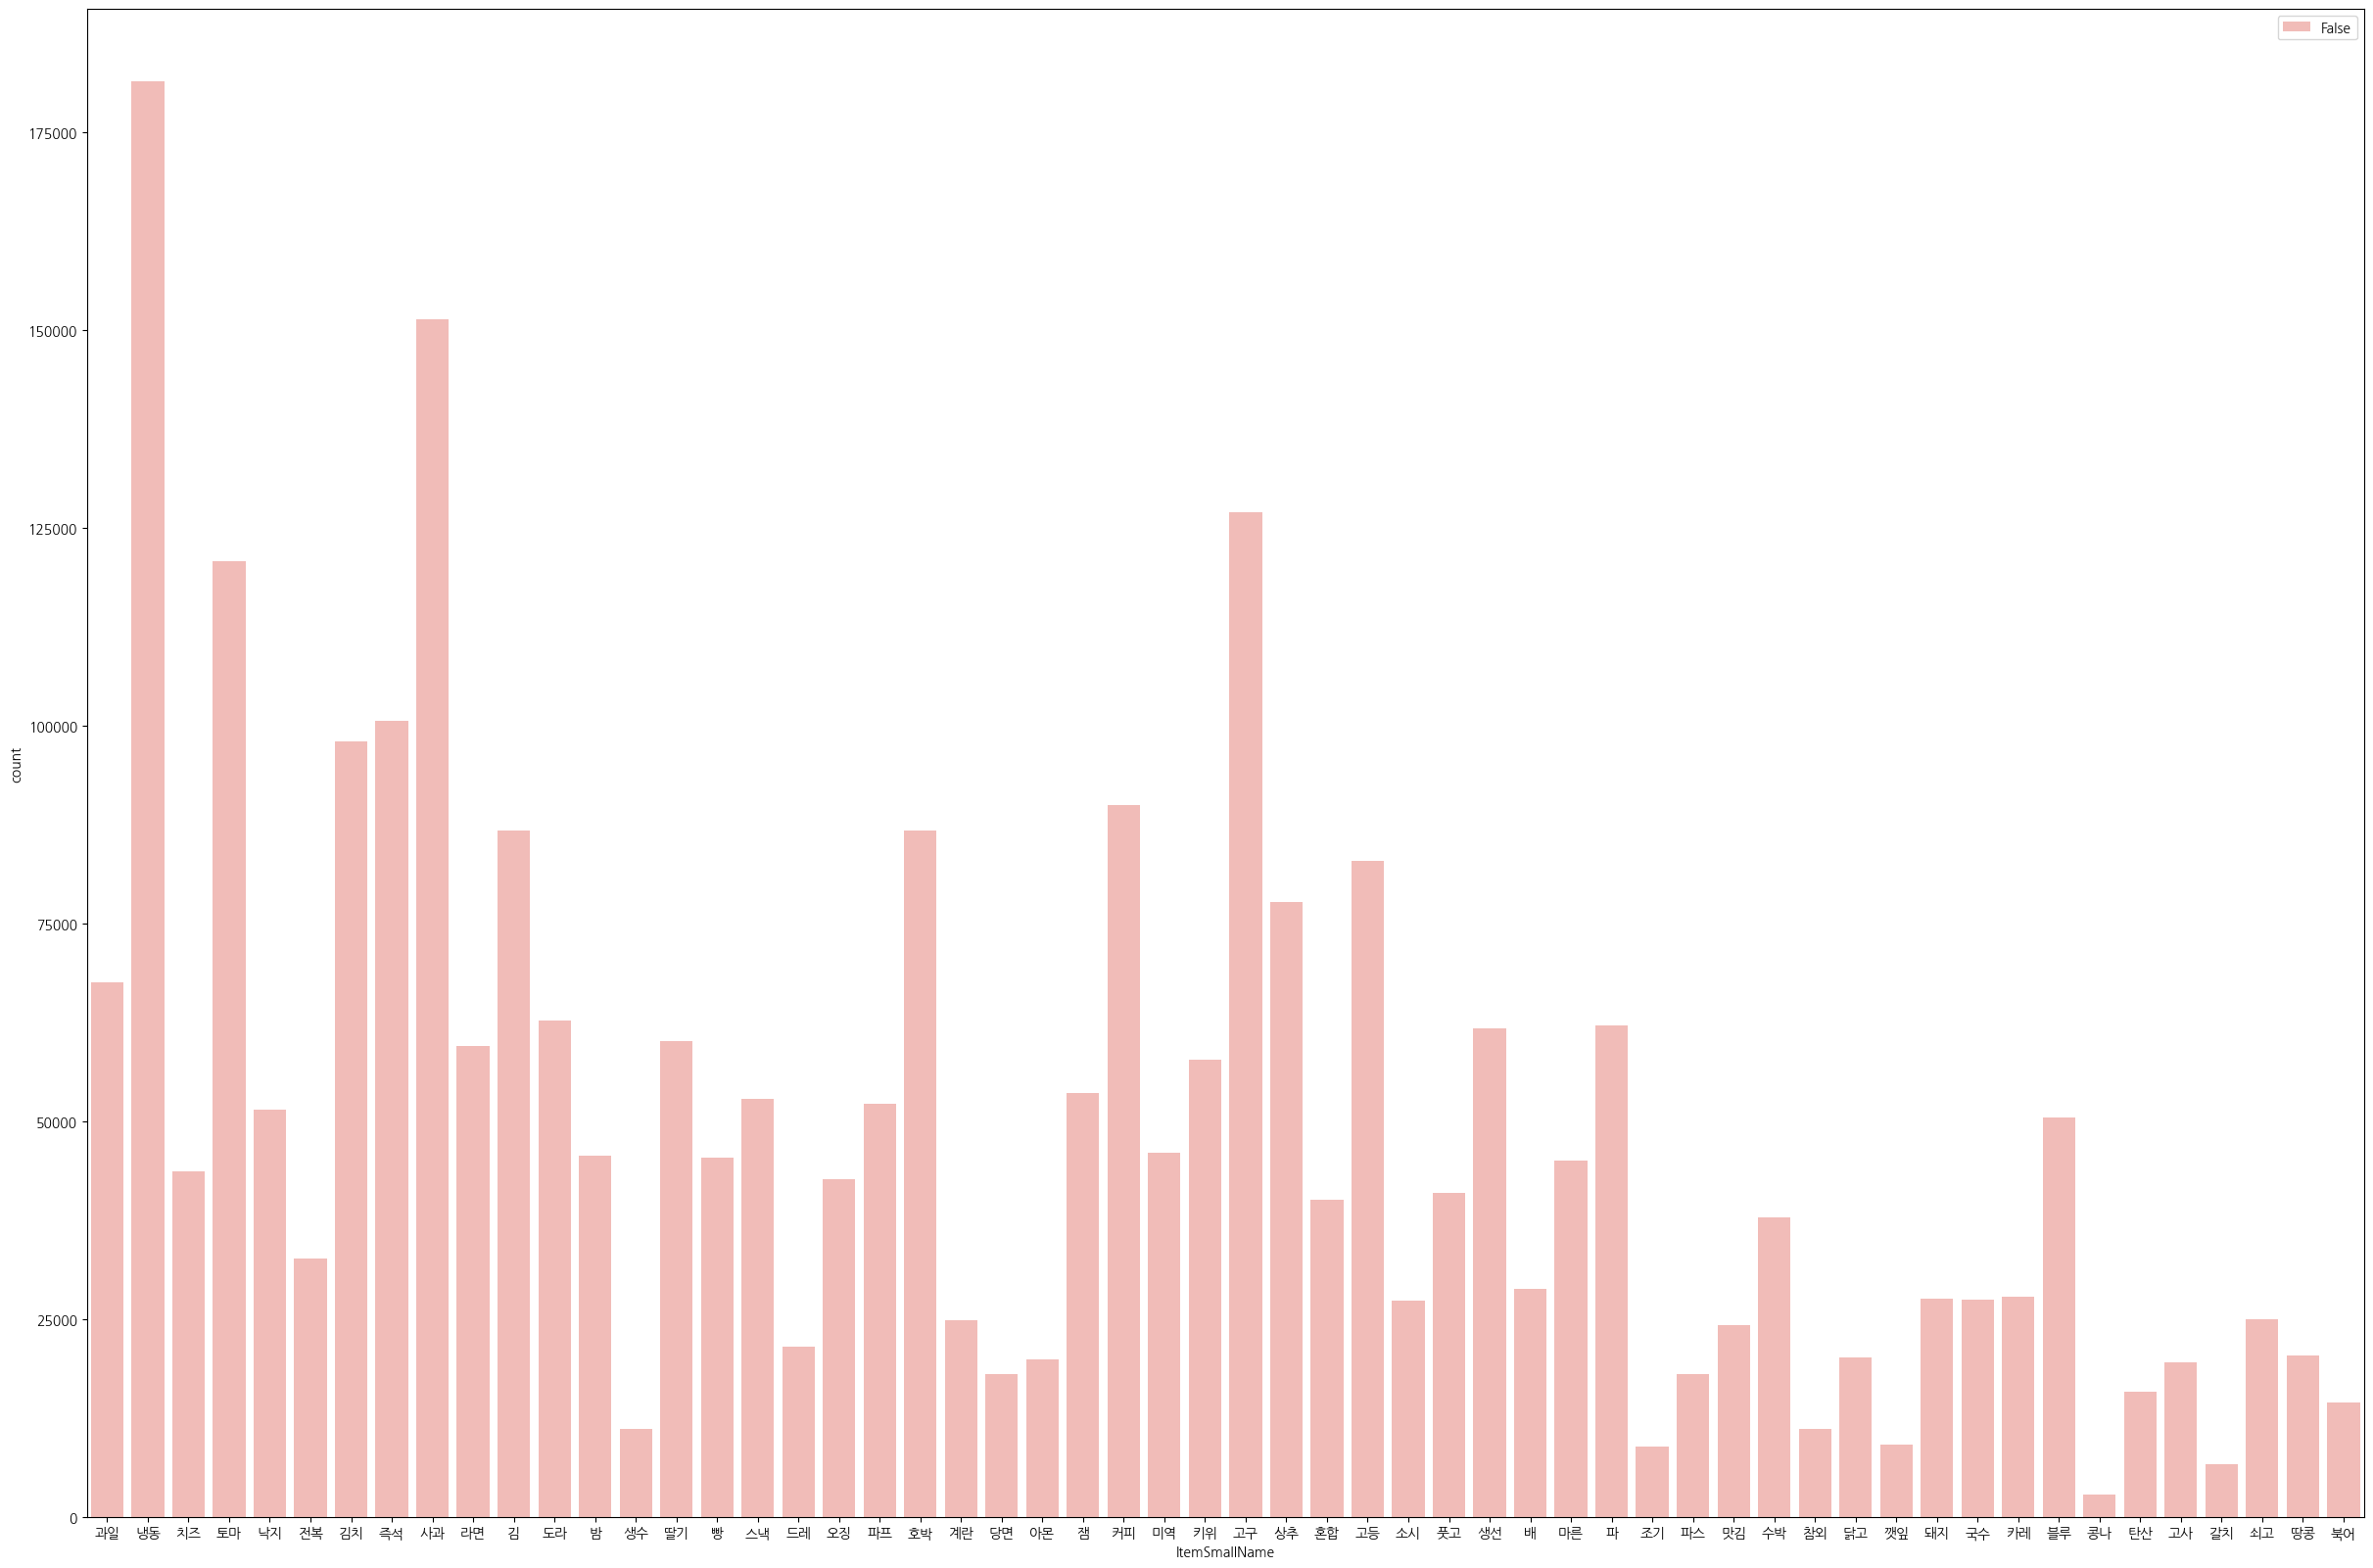

In [ ]:
plt.figure(figsize=(30, 20))
sns.countplot(data = data, x='ItemSmallName', hue = 'AgeGroup'==['남성'])

# EDA3

In [ ]:
on_items = pd.read_csv('on_items.csv')
on_orders = pd.read_csv('on_orders.csv')
on_users = pd.read_csv('on_users.csv',encoding='cp949')

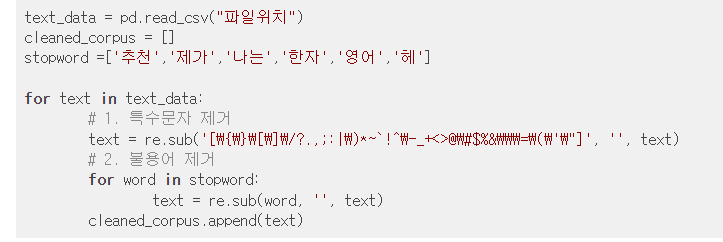

In [ ]:
on_orders.shape

(1043272, 6)

In [ ]:
# list of not food --> 시간 오래 걸렸음
not_food = ["냄비", "기계", "디스펜서", "퍼즐", "냉장고", "밀폐용기",
            "액자", "수동 반죽펴기", "채칼", "캔따기", "모자",
            "카지노","용기","케이스","만두통", "바람개비", "레깅스", "수박 나무라고요",
            "스텐 상추바구니 2호 야채 튀김 과일 바스켓 채반",
            "스테인레스 상추바구니 1호 메쉬바구니 소쿠리 채반",
            "스텐 타공상추바구니 2호","수박과도 大 (10개묶음) 0151","양상추 1cm 샌들 슬리퍼  JG6 (7157830)",
            "후르츠커버포켓크로스백(수박)", "양상추 여름 블라우스 JAP60 (7271217)", "양상추 여자 슬랙스 BF33 (7416269)",
            "양상추 여자 여름샌들 JK131 (7162818)", "MT124 A4 참외색 매직터치 두성 180g 10매입 X ( 3세트 )",
            "에이프릴래빗 양상추 스트링 빅포켓 숏야상점퍼 MA0906 (6660376)", "사랑에 빠진 과일토퍼 - 참외",
            "[총알배송] 제오닉 화채 수박통 8L 채반 믹싱볼 샐러드볼 판촉물 답례품 사은",
            "익사이팅 컬러링토이 유화물감 스포츠 스포츠 참외",
            "[하프클럽/한샘]SOK 프레시 여름 사각 수박용기 4L 2P",
            "참외 모형 1P (소)", "양상추키우기 7종", "양상추키우기 7종 채소키우기", "나 채소",
            "초 가을 계절 개성 캐쥬얼 참외 껍질 쿨링 여성", "22511712S3488857739", "타공 상추 바구니 2호 과일채소 씻어 빠른건조 주방",
            "OBSESSION 100g150g200g250g300g Kabura Bullet 금속 지그 헤드 오징어 어시", "나혼자키운다(대파)",
            "밀폐용기 42호 3L 2P세트 수박보관통 과일 대파 냉장고수납 야채 냉동실정리", "양파 대파 감자 마늘 생강 조개 과일망 메시 메쉬 그물망 일자형"
            ]
len(not_food)

# ItemName에 not_food의 값이 포함된 경우 추출
not_food_order_item = on_items[on_items['ItemName'].apply(lambda x: any(item for item in not_food if item in x))]
print(not_food_order_item.shape)
not_food_order_item.head()

# order_item_df 에서 not_food 제거
on_items = on_items.drop(index = not_food_order_item.index)

(199, 11)


In [ ]:
matplotlib.rc("font",family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False)

## 연령대 분류

In [ ]:
# Age 열을 기준으로 연령대별로 분류
bins = [19, 29, 39, 49, 59, 69]  # 연령대 경계값
labels = ['20s', '30s', '40s', '50s', '60s']  # 각 연령대에 해당하는 라벨
on_users['AgeGroup'] = pd.cut(on_users['Age'], bins=bins, labels=labels, right=True).astype(str)

on_users

,idUser,Gender,Age,FamilyCount,MemberYN,AgeGroup
0,U10001,여성,26,2,Y,20s
1,U10002,남성,61,2,Y,60s
2,U10003,여성,34,2,Y,30s
3,U10004,남성,26,1,N,20s
4,U10005,여성,33,3,Y,30s
...,...,...,...,...,...,...
2995,U12996,여성,66,2,N,60s
2996,U12997,남성,24,2,Y,20s
2997,U12998,남성,31,2,Y,30s
2998,U12999,여성,32,1,Y,30s


In [ ]:
order_user = pd.merge(on_orders, on_users, on='idUser', how='left')

order_user.head()

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Gender,Age,FamilyCount,MemberYN,AgeGroup
0,U10001,U10001-O2021-1001,03DEC2021:20:59:27,L1-M12-S0070-1113,17030,04DEC2021:03:26:00,여성,26,2,Y,20s
1,U10001,U10001-O2021-1001,03DEC2021:20:59:27,L1-M15-S0140-1247,7680,04DEC2021:03:26:00,여성,26,2,Y,20s
2,U10001,U10001-O2021-1001,03DEC2021:20:59:27,L1-M23-S0580-1047,12420,04DEC2021:03:26:00,여성,26,2,Y,20s
3,U10001,U10001-O2021-1001,03DEC2021:20:59:27,L4-M12-S0640-1010,6250,04DEC2021:03:26:00,여성,26,2,Y,20s
4,U10001,U10001-O2021-1001,03DEC2021:20:59:27,L4-M17-S0130-1018,14450,04DEC2021:03:26:00,여성,26,2,Y,20s


In [ ]:
order_user.shape

(1043272, 11)

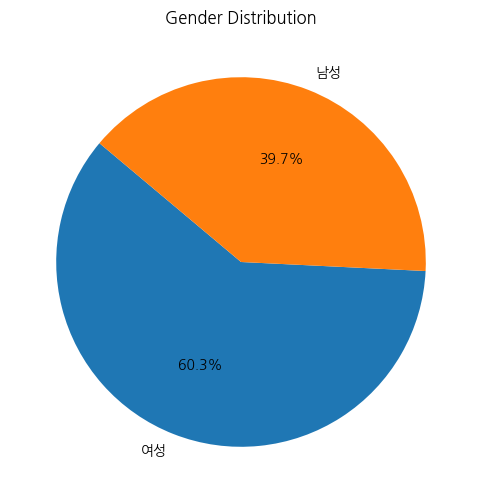

In [ ]:
gender_counts = on_users['Gender'].value_counts(normalize=True)

# 파이 차트로 성별 비율 그리기
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')  # 그래프 제목 설정
plt.show()

In [ ]:
gender_counts

여성    0.603333
남성    0.396667
Name: Gender, dtype: float64

## 날짜/시간 추출

In [ ]:
# OrderDT 열을 datetime 객체로 변환
order_user['OrderDT'] = pd.to_datetime(order_user['OrderDT'], format='%d%b%Y:%H:%M:%S')
order_user['DeliveryDT'] = pd.to_datetime(order_user['DeliveryDT'], format='%d%b%Y:%H:%M:%S')

# datetime 객체에서 년을 추출하여 새로운 컬럼 Month에 저장
order_user['Year'] = order_user['OrderDT'].dt.year
# datetime 객체에서 월을 추출하여 새로운 컬럼 Month에 저장
order_user['Month'] = order_user['OrderDT'].dt.month
# datetime 객체에서 일을 추출하여 새로운 컬럼 Month에 저장
order_user['Day'] = order_user['OrderDT'].dt.day
# datetime 객체에서 시를 추출하여 새로운 컬럼 Month에 저장
order_user['Hour'] = order_user['OrderDT'].dt.hour
# 요일 추출 (월요일=0, 일요일=6)
order_user['Weekday'] = order_user['OrderDT'].dt.weekday

# 숫자 요일을 문자열 요일로 매핑
weekday_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
order_user['WeekdayName'] = order_user['Weekday'].map(weekday_map)

order_user.head()

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Gender,Age,FamilyCount,MemberYN,AgeGroup,Year,Month,Day,Hour,Weekday,WeekdayName
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00,여성,26,2,Y,20s,2021,12,3,20,4,Friday
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00,여성,26,2,Y,20s,2021,12,3,20,4,Friday
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00,여성,26,2,Y,20s,2021,12,3,20,4,Friday
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00,여성,26,2,Y,20s,2021,12,3,20,4,Friday
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00,여성,26,2,Y,20s,2021,12,3,20,4,Friday


In [ ]:
order_user['smallcode'] = order_user['ItemCode'].str[7:12]
order_user

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Gender,Age,FamilyCount,MemberYN,AgeGroup,Year,Month,Day,Hour,Weekday,WeekdayName,smallcode
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00,여성,26,2,Y,20s,2021,12,3,20,4,Friday,S0070
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00,여성,26,2,Y,20s,2021,12,3,20,4,Friday,S0140
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00,여성,26,2,Y,20s,2021,12,3,20,4,Friday,S0580
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00,여성,26,2,Y,20s,2021,12,3,20,4,Friday,S0640
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00,여성,26,2,Y,20s,2021,12,3,20,4,Friday,S0130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043267,U13000,U13000-O2023-1020,2023-04-11 08:54:48,L1-M21-S0540-1079,19680,2023-04-12 04:36:00,여성,30,1,N,30s,2023,4,11,8,1,Tuesday,S0540
1043268,U13000,U13000-O2023-1020,2023-04-11 08:54:48,L4-M12-S0330-1011,18890,2023-04-12 04:36:00,여성,30,1,N,30s,2023,4,11,8,1,Tuesday,S0330
1043269,U13000,U13000-O2023-1020,2023-04-11 08:54:48,L4-M22-S0020-1032,13160,2023-04-12 04:36:00,여성,30,1,N,30s,2023,4,11,8,1,Tuesday,S0020
1043270,U13000,U13000-O2023-1020,2023-04-11 08:54:48,L4-M22-S0670-1011,17770,2023-04-12 04:36:00,여성,30,1,N,30s,2023,4,11,8,1,Tuesday,S0670


In [ ]:
# OrderDT 열을 datetime 객체로 변환
on_orders['OrderDT'] = pd.to_datetime(order_user['OrderDT'], format='%d%b%Y:%H:%M:%S')
on_orders['DeliveryDT'] = pd.to_datetime(order_user['DeliveryDT'], format='%d%b%Y:%H:%M:%S')

## 나이대별 비율

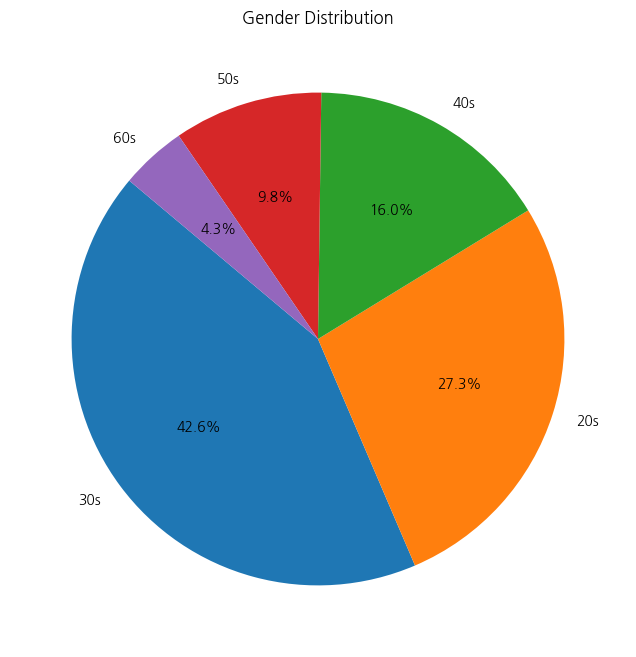

In [ ]:
# Gender 카운 계산
gender_counts = order_user['AgeGroup'].value_counts(normalize=True)

# 파이 차트로 시각화
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()

In [ ]:
gender_counts

30s    0.425510
20s    0.273012
40s    0.160467
50s    0.097754
60s    0.043256
Name: AgeGroup, dtype: float64

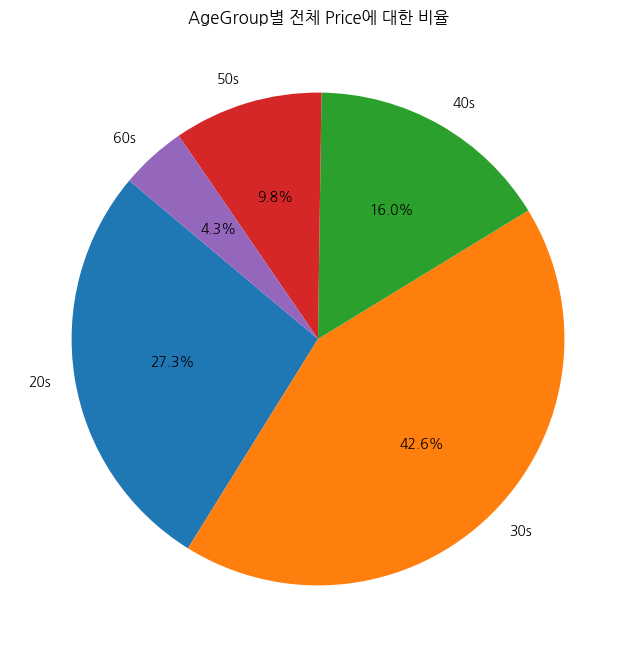

In [ ]:
# AgeGroup별 Price의 합계 계산
agegroup_price_sum = order_user.groupby('AgeGroup')['Price'].sum()

# 전체 합계로 나누어 비율 계산
total_price_sum = agegroup_price_sum.sum()
agegroup_price_ratio = agegroup_price_sum / total_price_sum

# 비율을 시각화하기 위해 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(agegroup_price_ratio, labels=agegroup_price_ratio.index, autopct='%1.1f%%', startangle=140)
plt.title('AgeGroup별 전체 Price에 대한 비율')
plt.show()

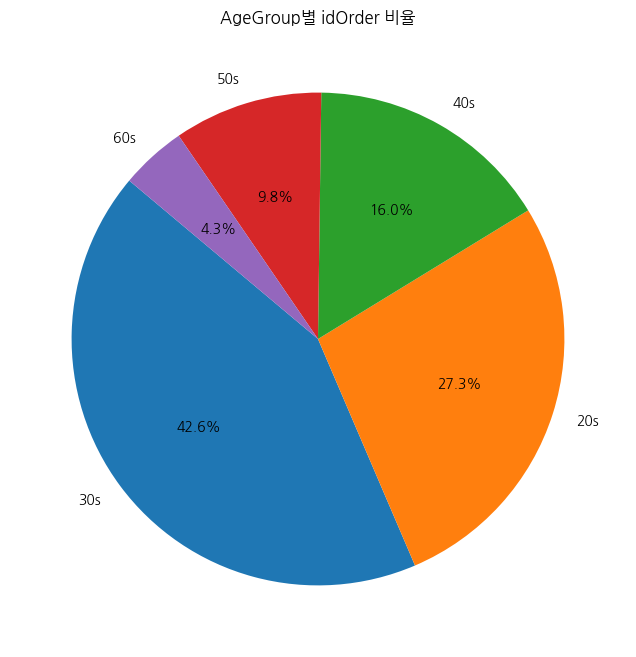

In [ ]:
# AgeGroup별 idOrder의 빈도수(개수)를 비율로 계산
agegroup_order_counts = order_user['AgeGroup'].value_counts(normalize=True)

# 파이 차트로 시각화
plt.figure(figsize=(8, 8))
plt.pie(agegroup_order_counts, labels=agegroup_order_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('AgeGroup별 idOrder 비율')
plt.show()

In [ ]:
order_price_sum  = order_user.groupby('idOrder')['Price'].sum().reset_index()
order_price_sum

,idOrder,Price
0,U10001-O2021-1001,92900
1,U10001-O2021-1002,81240
2,U10001-O2021-1003,91980
3,U10001-O2021-1004,91430
4,U10001-O2021-1005,166930
...,...,...
176897,U13000-O2023-1016,100720
176898,U13000-O2023-1017,77550
176899,U13000-O2023-1018,23110
176900,U13000-O2023-1019,122630


In [ ]:
# order_price_sum 데이터프레임에 order_user의 idUser와 Gender를 병합합니다.
# 이 때, order_user에서 idOrder, idUser, Gender만을 먼저 선택한 후 중복을 제거해야 합니다.
order_user_reduced = order_user[['idOrder', 'idUser', 'Gender','AgeGroup']].drop_duplicates()

# 이제 order_price_sum과 order_user_reduced를 idOrder를 기준으로 병합합니다.
merged_df = pd.merge(order_price_sum, order_user_reduced, on='idOrder', how='left')

merged_df

,idOrder,Price,idUser,Gender,AgeGroup
0,U10001-O2021-1001,92900,U10001,여성,20s
1,U10001-O2021-1002,81240,U10001,여성,20s
2,U10001-O2021-1003,91980,U10001,여성,20s
3,U10001-O2021-1004,91430,U10001,여성,20s
4,U10001-O2021-1005,166930,U10001,여성,20s
...,...,...,...,...,...
176897,U13000-O2023-1016,100720,U13000,여성,30s
176898,U13000-O2023-1017,77550,U13000,여성,30s
176899,U13000-O2023-1018,23110,U13000,여성,30s
176900,U13000-O2023-1019,122630,U13000,여성,30s


In [ ]:
order_user

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Gender,Age,FamilyCount,MemberYN,AgeGroup,Year,Month,Day,Hour,Weekday,WeekdayName,smallcode
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00,여성,26,2,Y,20s,2021,12,3,20,4,Friday,S0070
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00,여성,26,2,Y,20s,2021,12,3,20,4,Friday,S0140
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00,여성,26,2,Y,20s,2021,12,3,20,4,Friday,S0580
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00,여성,26,2,Y,20s,2021,12,3,20,4,Friday,S0640
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00,여성,26,2,Y,20s,2021,12,3,20,4,Friday,S0130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043267,U13000,U13000-O2023-1020,2023-04-11 08:54:48,L1-M21-S0540-1079,19680,2023-04-12 04:36:00,여성,30,1,N,30s,2023,4,11,8,1,Tuesday,S0540
1043268,U13000,U13000-O2023-1020,2023-04-11 08:54:48,L4-M12-S0330-1011,18890,2023-04-12 04:36:00,여성,30,1,N,30s,2023,4,11,8,1,Tuesday,S0330
1043269,U13000,U13000-O2023-1020,2023-04-11 08:54:48,L4-M22-S0020-1032,13160,2023-04-12 04:36:00,여성,30,1,N,30s,2023,4,11,8,1,Tuesday,S0020
1043270,U13000,U13000-O2023-1020,2023-04-11 08:54:48,L4-M22-S0670-1011,17770,2023-04-12 04:36:00,여성,30,1,N,30s,2023,4,11,8,1,Tuesday,S0670


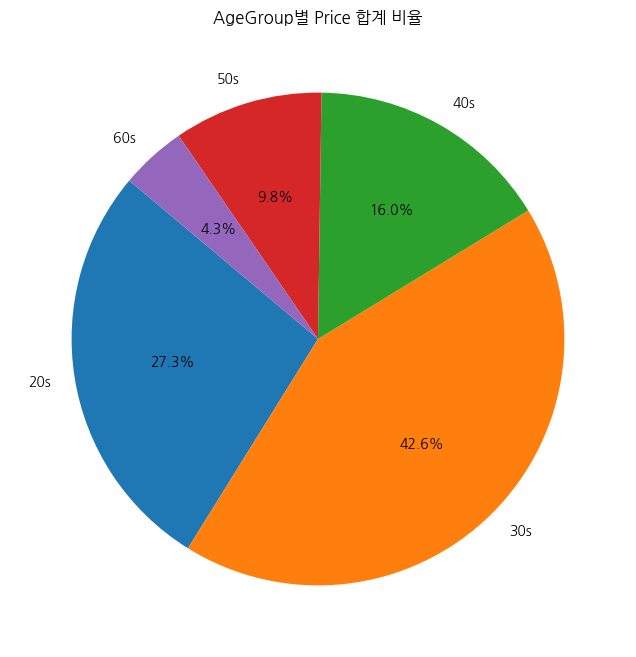

In [ ]:
# AgeGroup별 Price의 합계 계산
agegroup_price_sum = order_user.groupby('AgeGroup')['Price'].sum()

# 전체 합계로 나누어 비율 계산
total_price_sum = agegroup_price_sum.sum()
agegroup_price_ratio = agegroup_price_sum / total_price_sum

# 비율을 시각화하기 위해 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(agegroup_price_ratio, labels=agegroup_price_ratio.index, autopct='%1.1f%%', startangle=140)
plt.title('AgeGroup별 Price 합계 비율')
plt.show()

## 가장 비싼 것 & 가장 많이 산 사람

In [ ]:
on_items[on_items['PriceMax']==on_items['PriceMax'].max()]

,ItemLargeCode,ItemLargeName,ItemMiddleCode,ItemMiddleName,ItemSmallCode,ItemSmallName,ItemCode,ItemName,PriceYear,PriceMin,PriceMax
4886,L1,가공식품,M17,수산,S0380,생선,L1-M17-S0380-1127,펭귄 꽁치통조림 400g x 12캔 / 꽁치캔 통조림,2023,38590,41390


In [ ]:
on_orders[on_orders['Price']==on_orders['Price'].max()]

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT
993888,U12858,U12858-O2023-1011,2023-11-13 20:18:19,L1-M17-S0100-1103,41310,2023-11-14 05:57:00


In [ ]:
on_items[on_items['ItemCode']=='L1-M17-S0100-1103']

,ItemLargeCode,ItemLargeName,ItemMiddleCode,ItemMiddleName,ItemSmallCode,ItemSmallName,ItemCode,ItemName,PriceYear,PriceMin,PriceMax
3585,L1,가공식품,M17,수산,S0100,김,L1-M17-S0100-1103,동원 양반 구운김밥김 전장김 10매*30봉,2022,35820,38010
3586,L1,가공식품,M17,수산,S0100,김,L1-M17-S0100-1103,동원 양반 구운김밥김 전장김 10매*30봉,2023,38520,41320


In [ ]:
on_items[on_items['PriceMax']==on_items['PriceMax'].max()]

,ItemLargeCode,ItemLargeName,ItemMiddleCode,ItemMiddleName,ItemSmallCode,ItemSmallName,ItemCode,ItemName,PriceYear,PriceMin,PriceMax
4886,L1,가공식품,M17,수산,S0380,생선,L1-M17-S0380-1127,펭귄 꽁치통조림 400g x 12캔 / 꽁치캔 통조림,2023,38590,41390


In [ ]:
on_orders[on_orders['ItemCode']=='L1-M17-S0380-1127']

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT
2434,U10007,U10007-O2023-1015,2023-05-07 07:03:39,L1-M17-S0380-1127,38900,2023-05-08 05:15:00
4141,U10013,U10013-O2022-1025,2022-07-26 21:58:57,L1-M17-S0380-1127,37400,2022-07-28 05:19:00
7226,U10022,U10022-O2023-1005,2023-09-28 14:18:38,L1-M17-S0380-1127,38720,2023-09-29 06:53:00
7635,U10023,U10023-O2023-1011,2023-04-09 16:57:19,L1-M17-S0380-1127,39270,2023-04-10 06:55:00
13422,U10040,U10040-O2023-1011,2023-12-22 16:23:38,L1-M17-S0380-1127,38930,2023-12-23 04:59:00
...,...,...,...,...,...,...
1015445,U12920,U12920-O2023-1007,2023-11-02 14:38:55,L1-M17-S0380-1127,39670,2023-11-03 03:14:00
1023039,U12942,U12942-O2022-1011,2022-08-24 16:23:34,L1-M17-S0380-1127,38840,2022-08-25 05:21:00
1024657,U12946,U12946-O2023-1016,2023-01-31 17:04:55,L1-M17-S0380-1127,38630,2023-02-01 06:24:00
1027339,U12954,U12954-O2023-1020,2023-04-11 13:21:12,L1-M17-S0380-1127,39270,2023-04-12 05:36:00


In [ ]:
unique_orders_per_user = on_orders.groupby('idUser')['idOrder'].nunique()
unique_orders_per_user=pd.DataFrame(unique_orders_per_user)

In [ ]:
# r가장많이주문
unique_orders_per_user[unique_orders_per_user['idOrder']==unique_orders_per_user['idOrder'].max()]

,idOrder
idUser,
U10164,90
U10167,90


In [ ]:
# r가장많이주문
unique_orders_per_user[unique_orders_per_user['idOrder']==unique_orders_per_user['idOrder'].min()]

,idOrder
idUser,
U10251,9


In [ ]:
id_U10251 = on_orders[on_orders['idUser']=='U10251']
id_U10251

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT
87687,U10251,U10251-O2023-1001,2023-03-31 15:03:30,L1-M11-S0280-1013,20170,2023-04-01 05:37:00
87688,U10251,U10251-O2023-1001,2023-03-31 15:03:30,L1-M19-S0520-1073,21880,2023-04-01 05:37:00
87689,U10251,U10251-O2023-1001,2023-03-31 15:03:30,L1-M21-S0540-1088,23330,2023-04-01 05:37:00
87690,U10251,U10251-O2023-1001,2023-03-31 15:03:30,L4-M12-S0330-1004,31700,2023-04-01 05:37:00
87691,U10251,U10251-O2023-1001,2023-03-31 15:03:30,L4-M22-S0360-1072,32440,2023-04-01 05:37:00
87692,U10251,U10251-O2023-1001,2023-03-31 15:03:30,L4-M22-S0700-1016,12580,2023-04-01 05:37:00
87693,U10251,U10251-O2023-1001,2023-03-31 15:03:30,L4-M23-S0900-1017,8190,2023-04-01 05:37:00
87694,U10251,U10251-O2023-1002,2023-04-28 10:29:02,L1-M12-S0070-1020,15630,2023-04-29 04:54:00
87695,U10251,U10251-O2023-1002,2023-04-28 10:29:02,L1-M17-S0230-1040,9200,2023-04-29 04:54:00
87696,U10251,U10251-O2023-1002,2023-04-28 10:29:02,L1-M19-S0190-1040,10220,2023-04-29 04:54:00


## 날짜 EDA

In [ ]:
order_user['Date'] = order_user['OrderDT'].dt.strftime('%Y-%m-%d')

In [ ]:
order_user

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Gender,Age,FamilyCount,MemberYN,AgeGroup,Year,Month,Day,Hour,Weekday,WeekdayName,smallcode,Date
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00,여성,26,2,Y,20s,2021,12,3,20,4,Friday,S0070,2021-12-03
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00,여성,26,2,Y,20s,2021,12,3,20,4,Friday,S0140,2021-12-03
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00,여성,26,2,Y,20s,2021,12,3,20,4,Friday,S0580,2021-12-03
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00,여성,26,2,Y,20s,2021,12,3,20,4,Friday,S0640,2021-12-03
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00,여성,26,2,Y,20s,2021,12,3,20,4,Friday,S0130,2021-12-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043267,U13000,U13000-O2023-1020,2023-04-11 08:54:48,L1-M21-S0540-1079,19680,2023-04-12 04:36:00,여성,30,1,N,30s,2023,4,11,8,1,Tuesday,S0540,2023-04-11
1043268,U13000,U13000-O2023-1020,2023-04-11 08:54:48,L4-M12-S0330-1011,18890,2023-04-12 04:36:00,여성,30,1,N,30s,2023,4,11,8,1,Tuesday,S0330,2023-04-11
1043269,U13000,U13000-O2023-1020,2023-04-11 08:54:48,L4-M22-S0020-1032,13160,2023-04-12 04:36:00,여성,30,1,N,30s,2023,4,11,8,1,Tuesday,S0020,2023-04-11
1043270,U13000,U13000-O2023-1020,2023-04-11 08:54:48,L4-M22-S0670-1011,17770,2023-04-12 04:36:00,여성,30,1,N,30s,2023,4,11,8,1,Tuesday,S0670,2023-04-11


<Axes: xlabel='Date'>

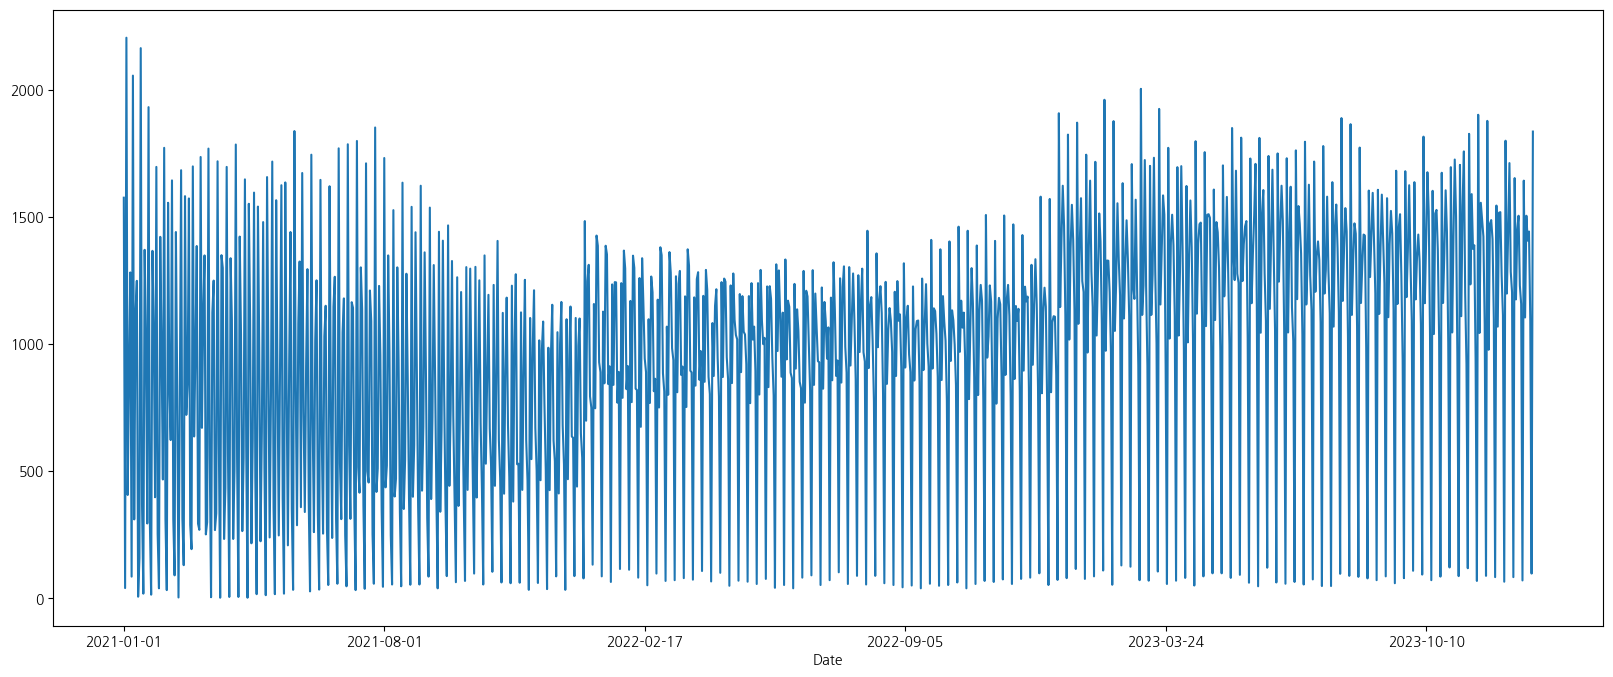

In [ ]:
# 일자별 총 거래 수량을 탐색한다
plt.figure(figsize=(20,8))
date_quantity_series = order_user.groupby('Date')['idOrder'].count()
date_quantity_series.plot()

<Axes: xlabel='Date'>

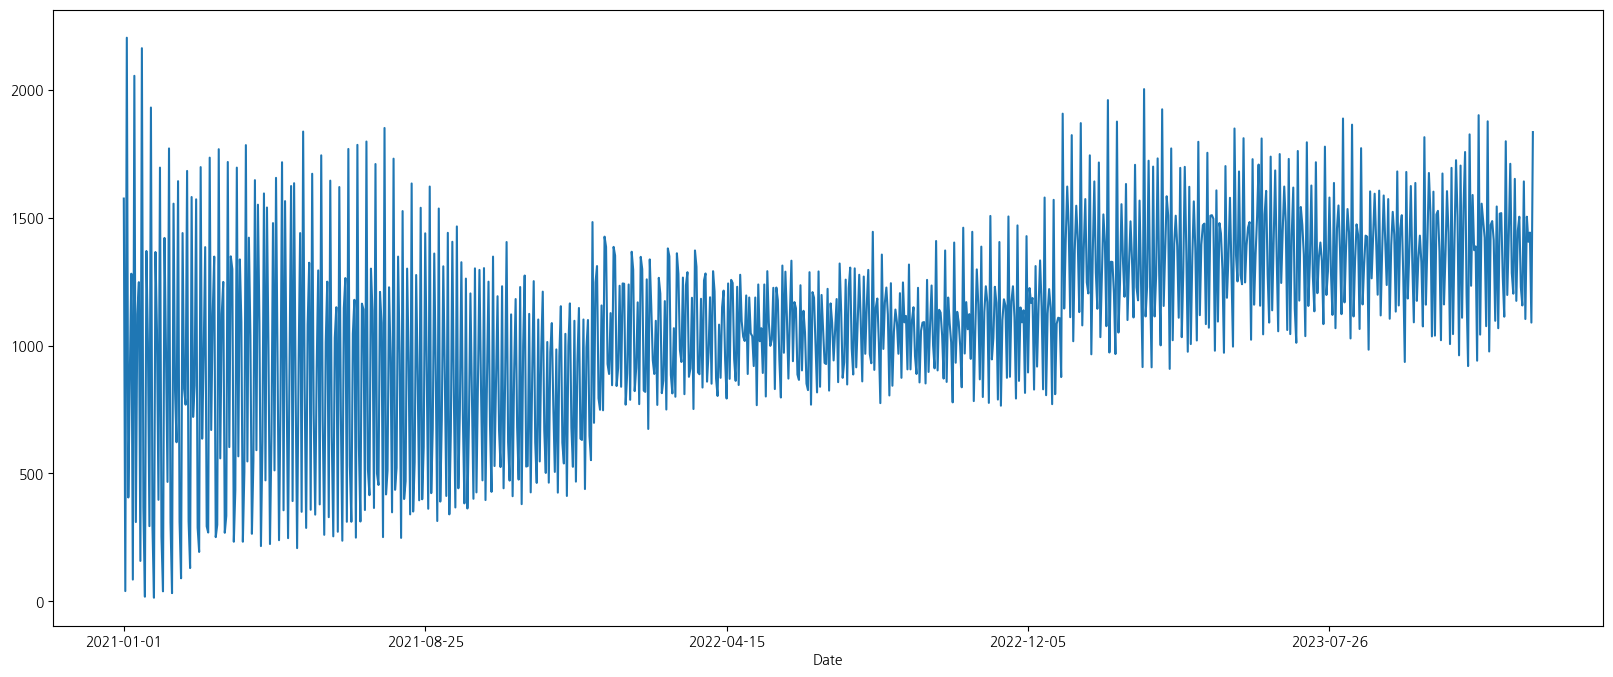

In [ ]:
Saturday_minus = order_user[order_user['WeekdayName'] != 'Saturday']
# 토요일 제거한
# 일자별 총 거래 수량을 탐색한다
plt.figure(figsize=(20,8))
date_quantity_series = Saturday_minus.groupby('Date')['idOrder'].count()
date_quantity_series.plot()

<Axes: xlabel='Date'>

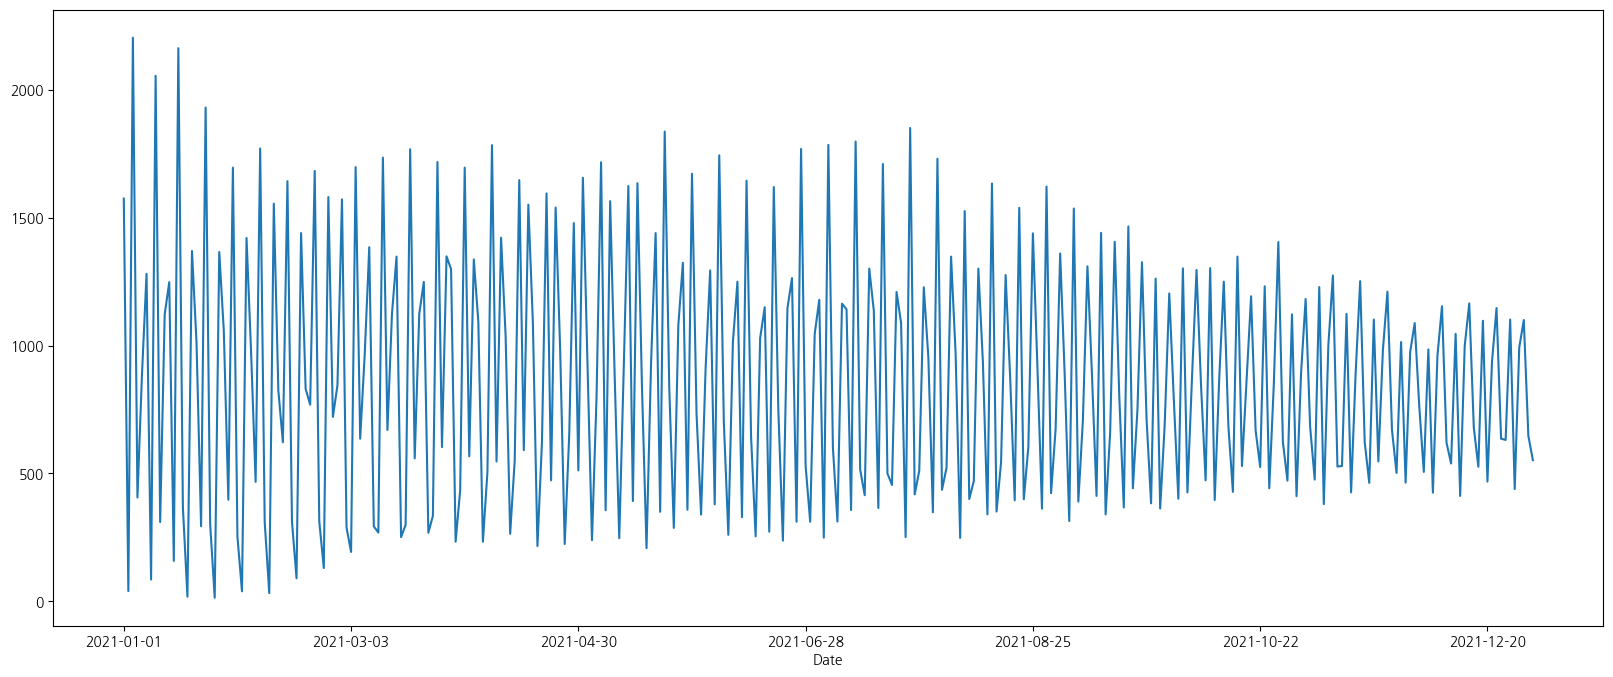

In [ ]:
order_user['Year'] = order_user['OrderDT'].dt.year
Saturday_minus_2021 = order_user[(order_user['WeekdayName'] != 'Saturday')&(order_user['Year']==2021)]
# 토요일 제거한 2021년
# 일자별 총 거래 수량을 탐색한다
plt.figure(figsize=(20,8))
date_quantity_series = Saturday_minus_2021.groupby('Date')['idOrder'].count()
date_quantity_series.plot()

<Axes: xlabel='Month'>

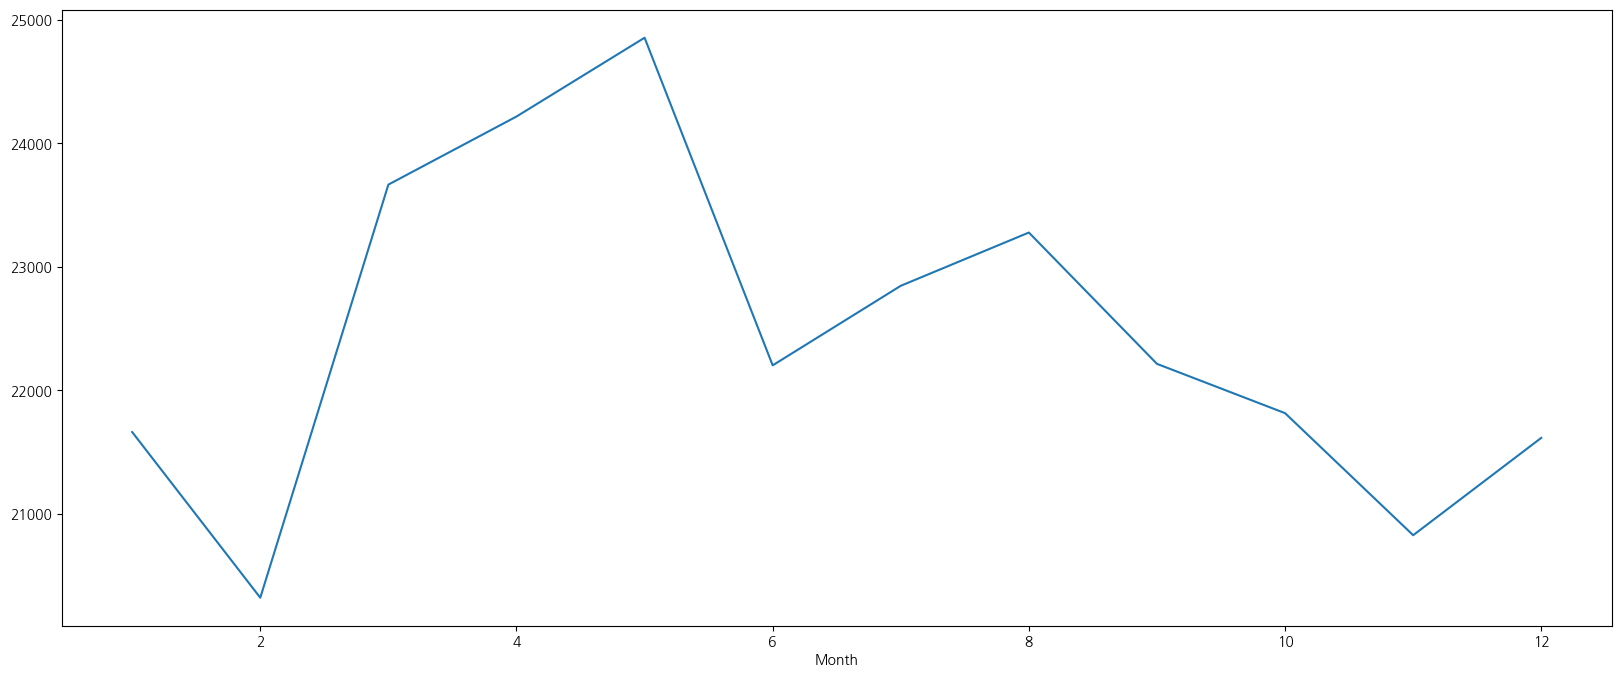

In [ ]:
order_user['Year'] = order_user['OrderDT'].dt.year
Saturday_minus_2021 = order_user[(order_user['WeekdayName'] != 'Saturday')&(order_user['Year']==2021)]
# 토요일 제거한 2021년
# 일자별 총 거래 수량을 탐색한다
plt.figure(figsize=(20,8))
date_quantity_series = Saturday_minus_2021.groupby('Month')['idOrder'].count()
date_quantity_series.plot()

<Axes: xlabel='WeekdayName'>

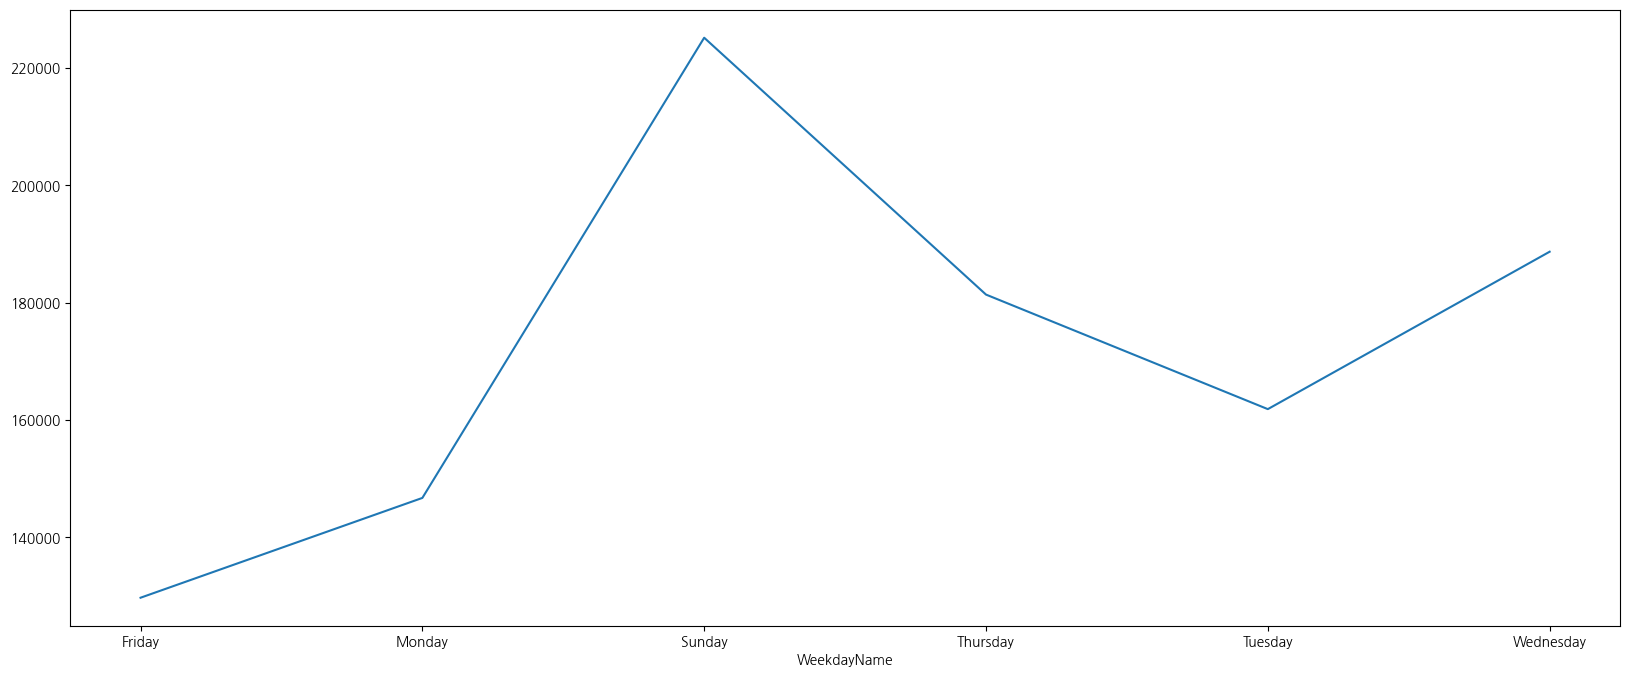

In [ ]:
plt.figure(figsize=(20,8))
date_quantity_series = Saturday_minus.groupby('WeekdayName')['idOrder'].count()
date_quantity_series.plot()

## 시간대별 주문건수

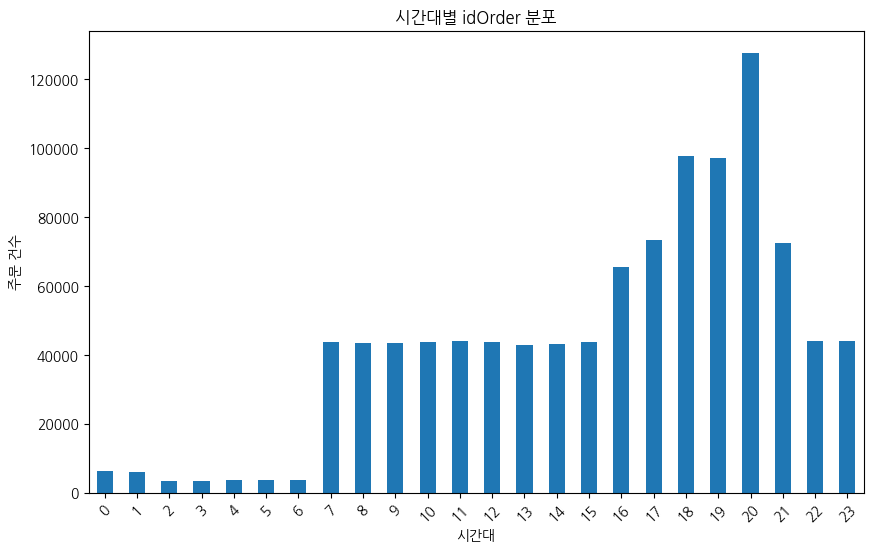

In [ ]:
# 시간대별 주문 건수를 계산
hourly_order_counts = order_user.groupby('Hour').count()

# 시각화
plt.figure(figsize=(10, 6))
hourly_order_counts['idOrder'].plot(kind='bar')
plt.title('시간대별 idOrder 분포')
plt.xlabel('시간대')
plt.ylabel('주문 건수')
plt.xticks(rotation=45)
plt.show()